# Research Question 1: River extent of influence

What is the spatial extent of influence of the river contribution to surface waters in the CAA?
- Does the RCD span full straits in the CAA? If so, which and during all seasons or only for a portion of the year?
- How long does it take for river contributions in the central CAA to reach Baffin Bay?

If proportion of Mn concentration at the particular point in space that is due to the contribution from rivers is greater than x, then the point is defined as in the river domain. Check on 5-day output time scale and on monthly average timescales.

In [8]:
import os
os.environ['PROJ_LIB'] = '/home/brogalla/anaconda3/share/proj'

In [9]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# from mpl_toolkits.basemap import Basemap, cm
import cmocean
import netCDF4 as nc
import os
from itertools import compress
import datetime as dt

%matplotlib notebook

In [10]:
import sys
sys.path.insert(0, '/ocean/brogalla/GEOTRACES/analysis-brogalla/modules')
import ariane as ar

##### Load domain dimensions for reference:

In [11]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
cond = (tmask[0,:,:,:] > 0.1) 
land_mask = np.ma.masked_where(cond, tmask[0,:,:,:]) 
tmask = tmask[0,:,1480:2050,160:800]

In [12]:
tmask_full = np.empty((12,50,570,640))
tmask_full[:] = tmask

In [13]:
ref   = nc.Dataset('/data/brogalla/run_storage/trial4/ref-2002/ANHA12_EXH006_2002_monthly.nc',  'r')
tlons = np.array(ref.variables['nav_lon'])
tlats = np.array(ref.variables['nav_lat'])
lons  = np.array(ref.variables['nav_lon'])#[1480:2050,160:800]
lats  = np.array(ref.variables['nav_lat'])#[1480:2050,160:800]
depth = np.array(ref.variables['deptht'])

##### Load Mn model run results:

In [34]:
folder  = '/data/brogalla/run_storage/riv-2a/'
folder1 = '/data/brogalla/run_storage/riv-2b/'
folder2 = '/data/brogalla/run_storage/reference/'
# file1   = 'ANHA12_EXH006_2002_monthly.nc'
# file2   = 'ANHA12_EXH006_2003_monthly.nc'
# file3   = 'ANHA12_EXH006_2004_monthly.nc'
# file4   = 'ANHA12_EXH006_2005_monthly.nc'
# file5   = 'ANHA12_EXH006_2006_monthly.nc'
# file6   = 'ANHA12_EXH006_2007_monthly.nc'
# file7   = 'ANHA12_EXH006_2008_monthly.nc'
# file8   = 'ANHA12_EXH006_2009_monthly.nc'
# file9   = 'ANHA12_EXH006_2010_monthly.nc'
# file10  = 'ANHA12_EXH006_2011_monthly.nc'
# file11  = 'ANHA12_EXH006_2012_monthly.nc'
# file12  = 'ANHA12_EXH006_2013_monthly.nc'
# file13  = 'ANHA12_EXH006_2014_monthly.nc'
file14  = 'ANHA12_EXH006_2015_monthly.nc'
file15  = 'ANHA12_EXH006_2016_monthly.nc'
file16  = 'ANHA12_EXH006_2017_monthly.nc'
file17  = 'ANHA12_EXH006_2018_monthly.nc'

In [35]:
# cont_monthly1  = nc.Dataset(folder1+file1)
# cont_monthly2  = nc.Dataset(folder1+file2)
# cont_monthly3  = nc.Dataset(folder1+file3)
# cont_monthly4  = nc.Dataset(folder1+file4)
# cont_monthly5  = nc.Dataset(folder1+file5)
# cont_monthly6  = nc.Dataset(folder1+file6)
# cont_monthly7  = nc.Dataset(folder1+file7)
# cont_monthly8  = nc.Dataset(folder1+file8)
# cont_monthly9  = nc.Dataset(folder1+file9)
# cont_monthly10 = nc.Dataset(folder1+file10)
# cont_monthly11 = nc.Dataset(folder1+file11)
# cont_monthly12 = nc.Dataset(folder1+file12)
# cont_monthly13 = nc.Dataset(folder1+file13)
cont_monthly14 = nc.Dataset(folder1+file14)
cont_monthly15 = nc.Dataset(folder1+file15)
cont_monthly16 = nc.Dataset(folder1+file16)
cont_monthly17 = nc.Dataset(folder1+file17)

In [36]:
# glac_monthly1  = nc.Dataset(folder+file1)
# glac_monthly2  = nc.Dataset(folder+file2)
# glac_monthly3  = nc.Dataset(folder+file3)
# glac_monthly4  = nc.Dataset(folder+file4)
# glac_monthly5  = nc.Dataset(folder+file5)
# glac_monthly6  = nc.Dataset(folder+file6)
# glac_monthly7  = nc.Dataset(folder+file7)
# glac_monthly8  = nc.Dataset(folder+file8)
# glac_monthly9  = nc.Dataset(folder+file9)
# glac_monthly10 = nc.Dataset(folder+file10)
# glac_monthly11 = nc.Dataset(folder+file11)
# glac_monthly12 = nc.Dataset(folder+file12)
# glac_monthly13 = nc.Dataset(folder+file13)
glac_monthly14 = nc.Dataset(folder+file14)
glac_monthly15 = nc.Dataset(folder+file15)
glac_monthly16 = nc.Dataset(folder+file16)
glac_monthly17 = nc.Dataset(folder+file17)

In [37]:
# base_monthly1  = nc.Dataset(folder2+file1)
# base_monthly2  = nc.Dataset(folder2+file2)
# base_monthly3  = nc.Dataset(folder2+file3)
# base_monthly4  = nc.Dataset(folder2+file4)
# base_monthly5  = nc.Dataset(folder2+file5)
# base_monthly6  = nc.Dataset(folder2+file6)
# base_monthly7  = nc.Dataset(folder2+file7)
# base_monthly8  = nc.Dataset(folder2+file8)
# base_monthly9  = nc.Dataset(folder2+file9)
# base_monthly10 = nc.Dataset(folder2+file10)
# base_monthly11 = nc.Dataset(folder2+file11)
# base_monthly12 = nc.Dataset(folder2+file12)
# base_monthly13 = nc.Dataset(folder2+file13)
base_monthly14 = nc.Dataset(folder2+file14)
base_monthly15 = nc.Dataset(folder2+file15)
base_monthly16 = nc.Dataset(folder2+file16)
base_monthly17 = nc.Dataset(folder2+file17)

In [38]:
# dmn_cont_2002 = np.array(cont_monthly1.variables['dissolmn'])[:,0,:,:,:]
# dmn_cont_2003 = np.array(cont_monthly2.variables['dissolmn'])[:,0,:,:,:]
# dmn_cont_2004 = np.array(cont_monthly3.variables['dissolmn'])[:,0,:,:,:]
# dmn_cont_2005 = np.array(cont_monthly4.variables['dissolmn'])[:,0,:,:,:]
# dmn_cont_2006 = np.array(cont_monthly5.variables['dissolmn'])[:,0,:,:,:]
# dmn_cont_2007 = np.array(cont_monthly6.variables['dissolmn'])[:,0,:,:,:]
# dmn_cont_2008 = np.array(cont_monthly7.variables['dissolmn'])[:,0,:,:,:]
# dmn_cont_2009 = np.array(cont_monthly8.variables['dissolmn'])[:,0,:,:,:]
# dmn_cont_2010 = np.array(cont_monthly9.variables['dissolmn'])[:,0,:,:,:]
# dmn_cont_2011 = np.array(cont_monthly10.variables['dissolmn'])[:,0,:,:,:]
# dmn_cont_2012 = np.array(cont_monthly11.variables['dissolmn'])[:,0,:,:,:]
# dmn_cont_2013 = np.array(cont_monthly12.variables['dissolmn'])[:,0,:,:,:]
# dmn_cont_2014 = np.array(cont_monthly13.variables['dissolmn'])[:,0,:,:,:]
dmn_cont_2015 = np.array(cont_monthly14.variables['dissolmn'])[:,0,:,:,:]
dmn_cont_2016 = np.array(cont_monthly15.variables['dissolmn'])[:,0,:,:,:]
dmn_cont_2017 = np.array(cont_monthly16.variables['dissolmn'])[:,0,:,:,:]
dmn_cont_2018 = np.array(cont_monthly17.variables['dissolmn'])[:,0,:,:,:]

In [39]:
# dmn_glac_2002 = np.array(glac_monthly1.variables['dissolmn'])[:,0,:,:,:]
# dmn_glac_2003 = np.array(glac_monthly2.variables['dissolmn'])[:,0,:,:,:]
# dmn_glac_2004 = np.array(glac_monthly3.variables['dissolmn'])[:,0,:,:,:]
# dmn_glac_2005 = np.array(glac_monthly4.variables['dissolmn'])[:,0,:,:,:]
# dmn_glac_2006 = np.array(glac_monthly5.variables['dissolmn'])[:,0,:,:,:]
# dmn_glac_2007 = np.array(glac_monthly6.variables['dissolmn'])[:,0,:,:,:]
# dmn_glac_2008 = np.array(glac_monthly7.variables['dissolmn'])[:,0,:,:,:]
# dmn_glac_2009 = np.array(glac_monthly8.variables['dissolmn'])[:,0,:,:,:]
# dmn_glac_2010 = np.array(glac_monthly9.variables['dissolmn'])[:,0,:,:,:]
# dmn_glac_2011 = np.array(glac_monthly10.variables['dissolmn'])[:,0,:,:,:]
# dmn_glac_2012 = np.array(glac_monthly11.variables['dissolmn'])[:,0,:,:,:]
# dmn_glac_2013 = np.array(glac_monthly12.variables['dissolmn'])[:,0,:,:,:]
# dmn_glac_2014 = np.array(glac_monthly13.variables['dissolmn'])[:,0,:,:,:]
dmn_glac_2015 = np.array(glac_monthly14.variables['dissolmn'])[:,0,:,:,:]
dmn_glac_2016 = np.array(glac_monthly15.variables['dissolmn'])[:,0,:,:,:]
dmn_glac_2017 = np.array(glac_monthly16.variables['dissolmn'])[:,0,:,:,:]
dmn_glac_2018 = np.array(glac_monthly17.variables['dissolmn'])[:,0,:,:,:]

In [40]:
# dmn_base_2002 = np.array(base_monthly1.variables['dissolmn'])[:,0,:,:,:]
# dmn_base_2003 = np.array(base_monthly2.variables['dissolmn'])[:,0,:,:,:]
# dmn_base_2004 = np.array(base_monthly3.variables['dissolmn'])[:,0,:,:,:]
# dmn_base_2005 = np.array(base_monthly4.variables['dissolmn'])[:,0,:,:,:]
# dmn_base_2006 = np.array(base_monthly5.variables['dissolmn'])[:,0,:,:,:]
# dmn_base_2007 = np.array(base_monthly6.variables['dissolmn'])[:,0,:,:,:]
# dmn_base_2008 = np.array(base_monthly7.variables['dissolmn'])[:,0,:,:,:]
# dmn_base_2009 = np.array(base_monthly8.variables['dissolmn'])[:,0,:,:,:]
# dmn_base_2010 = np.array(base_monthly9.variables['dissolmn'])[:,0,:,:,:]
# dmn_base_2011 = np.array(base_monthly10.variables['dissolmn'])[:,0,:,:,:]
# dmn_base_2012 = np.array(base_monthly11.variables['dissolmn'])[:,0,:,:,:]
# dmn_base_2013 = np.array(base_monthly12.variables['dissolmn'])[:,0,:,:,:]
# dmn_base_2014 = np.array(base_monthly13.variables['dissolmn'])[:,0,:,:,:]
dmn_base_2015 = np.array(base_monthly14.variables['dissolmn'])[:,0,:,:,:]
dmn_base_2016 = np.array(base_monthly15.variables['dissolmn'])[:,0,:,:,:]
dmn_base_2017 = np.array(base_monthly16.variables['dissolmn'])[:,0,:,:,:]
dmn_base_2018 = np.array(base_monthly17.variables['dissolmn'])[:,0,:,:,:]

In [41]:
dmn_PML_2015 = np.divide(np.sum(dmn_base_2015[:,0:17,:,:],axis=1), np.ones(dmn_base_2015[:,0,:,:].shape)*17.0)
dmn_PW_2015  = np.divide(np.sum(dmn_base_2015[:,17:29,:,:],axis=1), np.ones(dmn_base_2015[:,0,:,:].shape)*12.0)
dmn_AW_2015  = np.divide(np.sum(dmn_base_2015[:,29:35,:,:],axis=1), np.ones(dmn_base_2015[:,0,:,:].shape)*6.0)
dmn_DW_2015  = np.divide(np.sum(dmn_base_2015[:,35:50,:,:],axis=1), np.ones(dmn_base_2015[:,0,:,:].shape)*15.0)

<IPython.core.display.Javascript object>


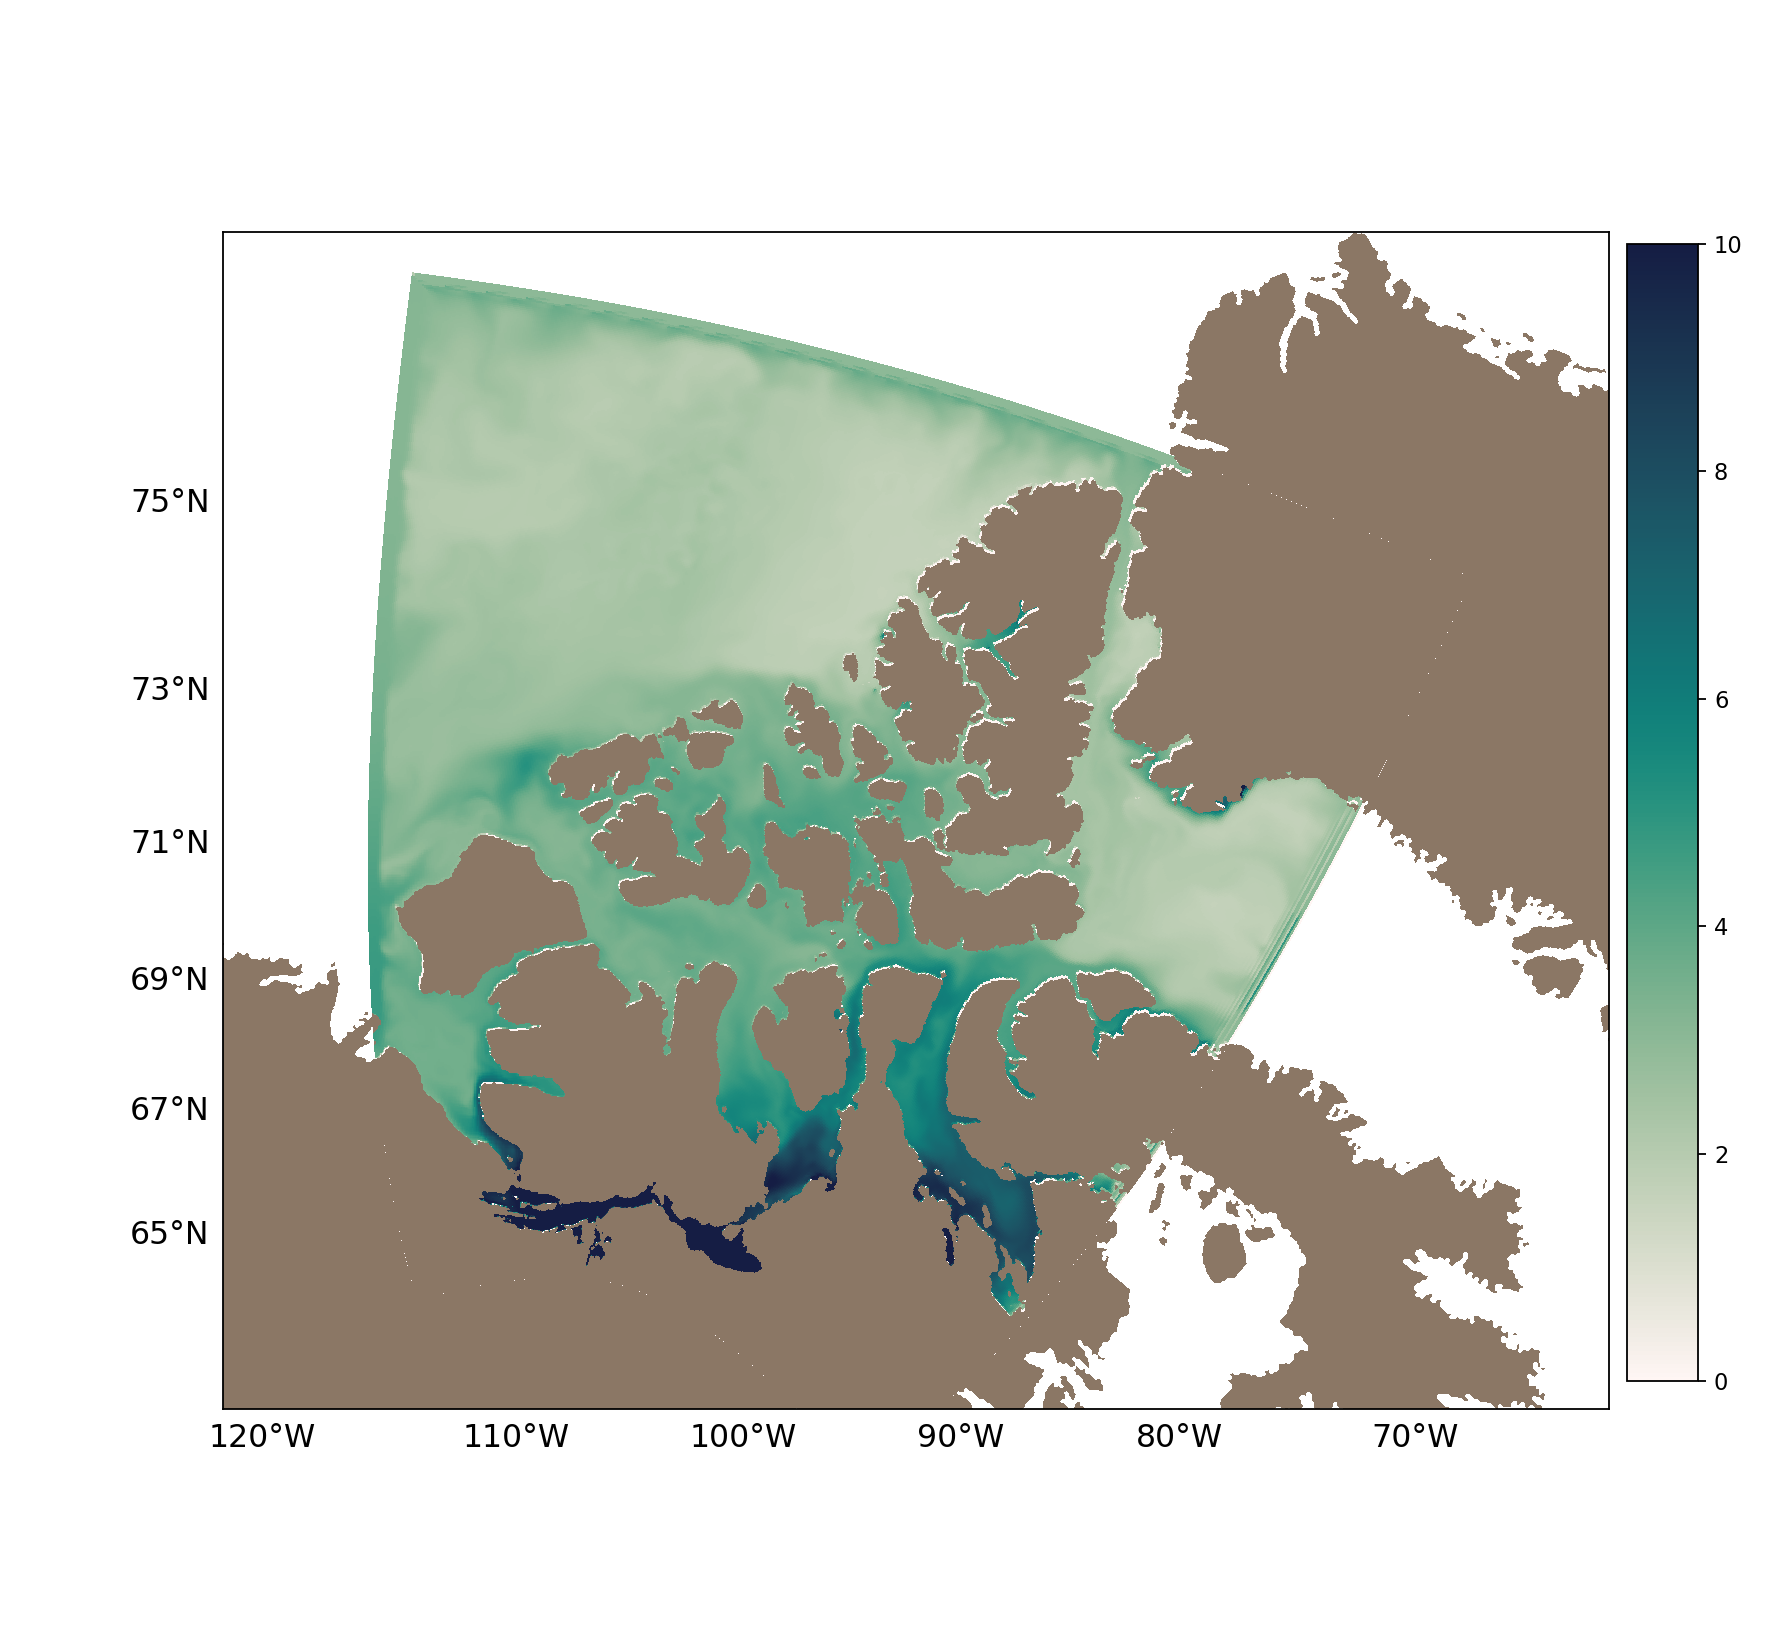

In [14]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y    = proj(lons, lats)
colour  = cmocean.cm.tempo

cbar    = proj.pcolor(x, y, dmn_PML_2015[8,:,:]*1e9, vmin=0, vmax=10, cmap=colour)

proj.contourf(x,y,land_mask[16,1480:2050,160:800], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
    
fig     = plt.gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

In [16]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y    = proj(lons, lats)
colour  = cmocean.cm.tempo

cbar    = proj.pcolor(x, y, dmn_PW_2015[8,:,:]*1e9, vmin=0, vmax=10, cmap=colour)
    
proj.contourf(x,y,land_mask[28,1480:2050,160:800], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
    
fig     = plt.gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

<IPython.core.display.Javascript object>

In [17]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y    = proj(lons, lats)
colour  = cmocean.cm.tempo

cbar    = proj.pcolor(x, y, dmn_AW_2015[8,:,:]*1e9, vmin=0, vmax=10, cmap=colour)

proj.contourf(x,y,land_mask[34,1480:2050,160:800], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
    
fig     = plt.gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

<IPython.core.display.Javascript object>

In [18]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y    = proj(lons, lats)
colour  = cmocean.cm.tempo

cbar    = proj.pcolor(x, y, dmn_DW_2015[8,:,:]*1e9, vmin=0, vmax=10, cmap=colour)
proj.contourf(x,y,land_mask[40,1480:2050,160:800], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
    
fig     = plt.gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

<IPython.core.display.Javascript object>

Calculate the proportional contribution of glacial rivers to each grid cell:

$$ prop = \frac{Mn_{glacier}-Mn_{base}}{Mn_{base}} = \frac{Mn_{glacier}}{Mn_{base}} - 1 $$

In [42]:
def calculate_prop(dmn_riv_off, dmn_riv_on):
    # Input arguments:
    # - dmn_riv_on (t,z,y,x) --- concentration of dMn with riverine contribution on
    # - dmn_riv_off(t,z,y,x) --- concentration of dMn with rivers off
    
    diff_rivers = dmn_riv_on - dmn_riv_off
    
    # Contribution of rivers / total concentration (with rivers on):
    # should be an elementwise operation
    prop_river  = np.divide(diff_rivers, dmn_riv_off)
    
    # Output:
    # - prop_river(t,z,y,x)  --- proportional contribution of river to observed [dMn]
    return prop_river

In [43]:
# glacier_prop_2002   = calculate_prop(dmn_base_2002, dmn_glac_2002) 
# glacier_prop_2003   = calculate_prop(dmn_base_2003, dmn_glac_2003)
# glacier_prop_2004   = calculate_prop(dmn_base_2004, dmn_glac_2004)
# glacier_prop_2005   = calculate_prop(dmn_base_2005, dmn_glac_2005)
# glacier_prop_2006   = calculate_prop(dmn_base_2006, dmn_glac_2006)
# glacier_prop_2007   = calculate_prop(dmn_base_2007, dmn_glac_2007)
# glacier_prop_2008   = calculate_prop(dmn_base_2008, dmn_glac_2008) 
# glacier_prop_2009   = calculate_prop(dmn_base_2009, dmn_glac_2009)
# glacier_prop_2010   = calculate_prop(dmn_base_2010, dmn_glac_2010)
# glacier_prop_2011   = calculate_prop(dmn_base_2011, dmn_glac_2011)
# glacier_prop_2012   = calculate_prop(dmn_base_2012, dmn_glac_2012)
# glacier_prop_2013   = calculate_prop(dmn_base_2013, dmn_glac_2013)
# glacier_prop_2014   = calculate_prop(dmn_base_2014, dmn_glac_2014)
glacier_prop_2015   = calculate_prop(dmn_base_2015, dmn_glac_2015)
glacier_prop_2016   = calculate_prop(dmn_base_2016, dmn_glac_2016)
glacier_prop_2017   = calculate_prop(dmn_base_2017, dmn_glac_2017)
glacier_prop_2018   = calculate_prop(dmn_base_2018, dmn_glac_2018)

cont_prop_2015   = calculate_prop(dmn_base_2015, dmn_cont_2015)
cont_prop_2016   = calculate_prop(dmn_base_2016, dmn_cont_2016)
cont_prop_2017   = calculate_prop(dmn_base_2017, dmn_cont_2017)
cont_prop_2018   = calculate_prop(dmn_base_2018, dmn_cont_2018)

/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


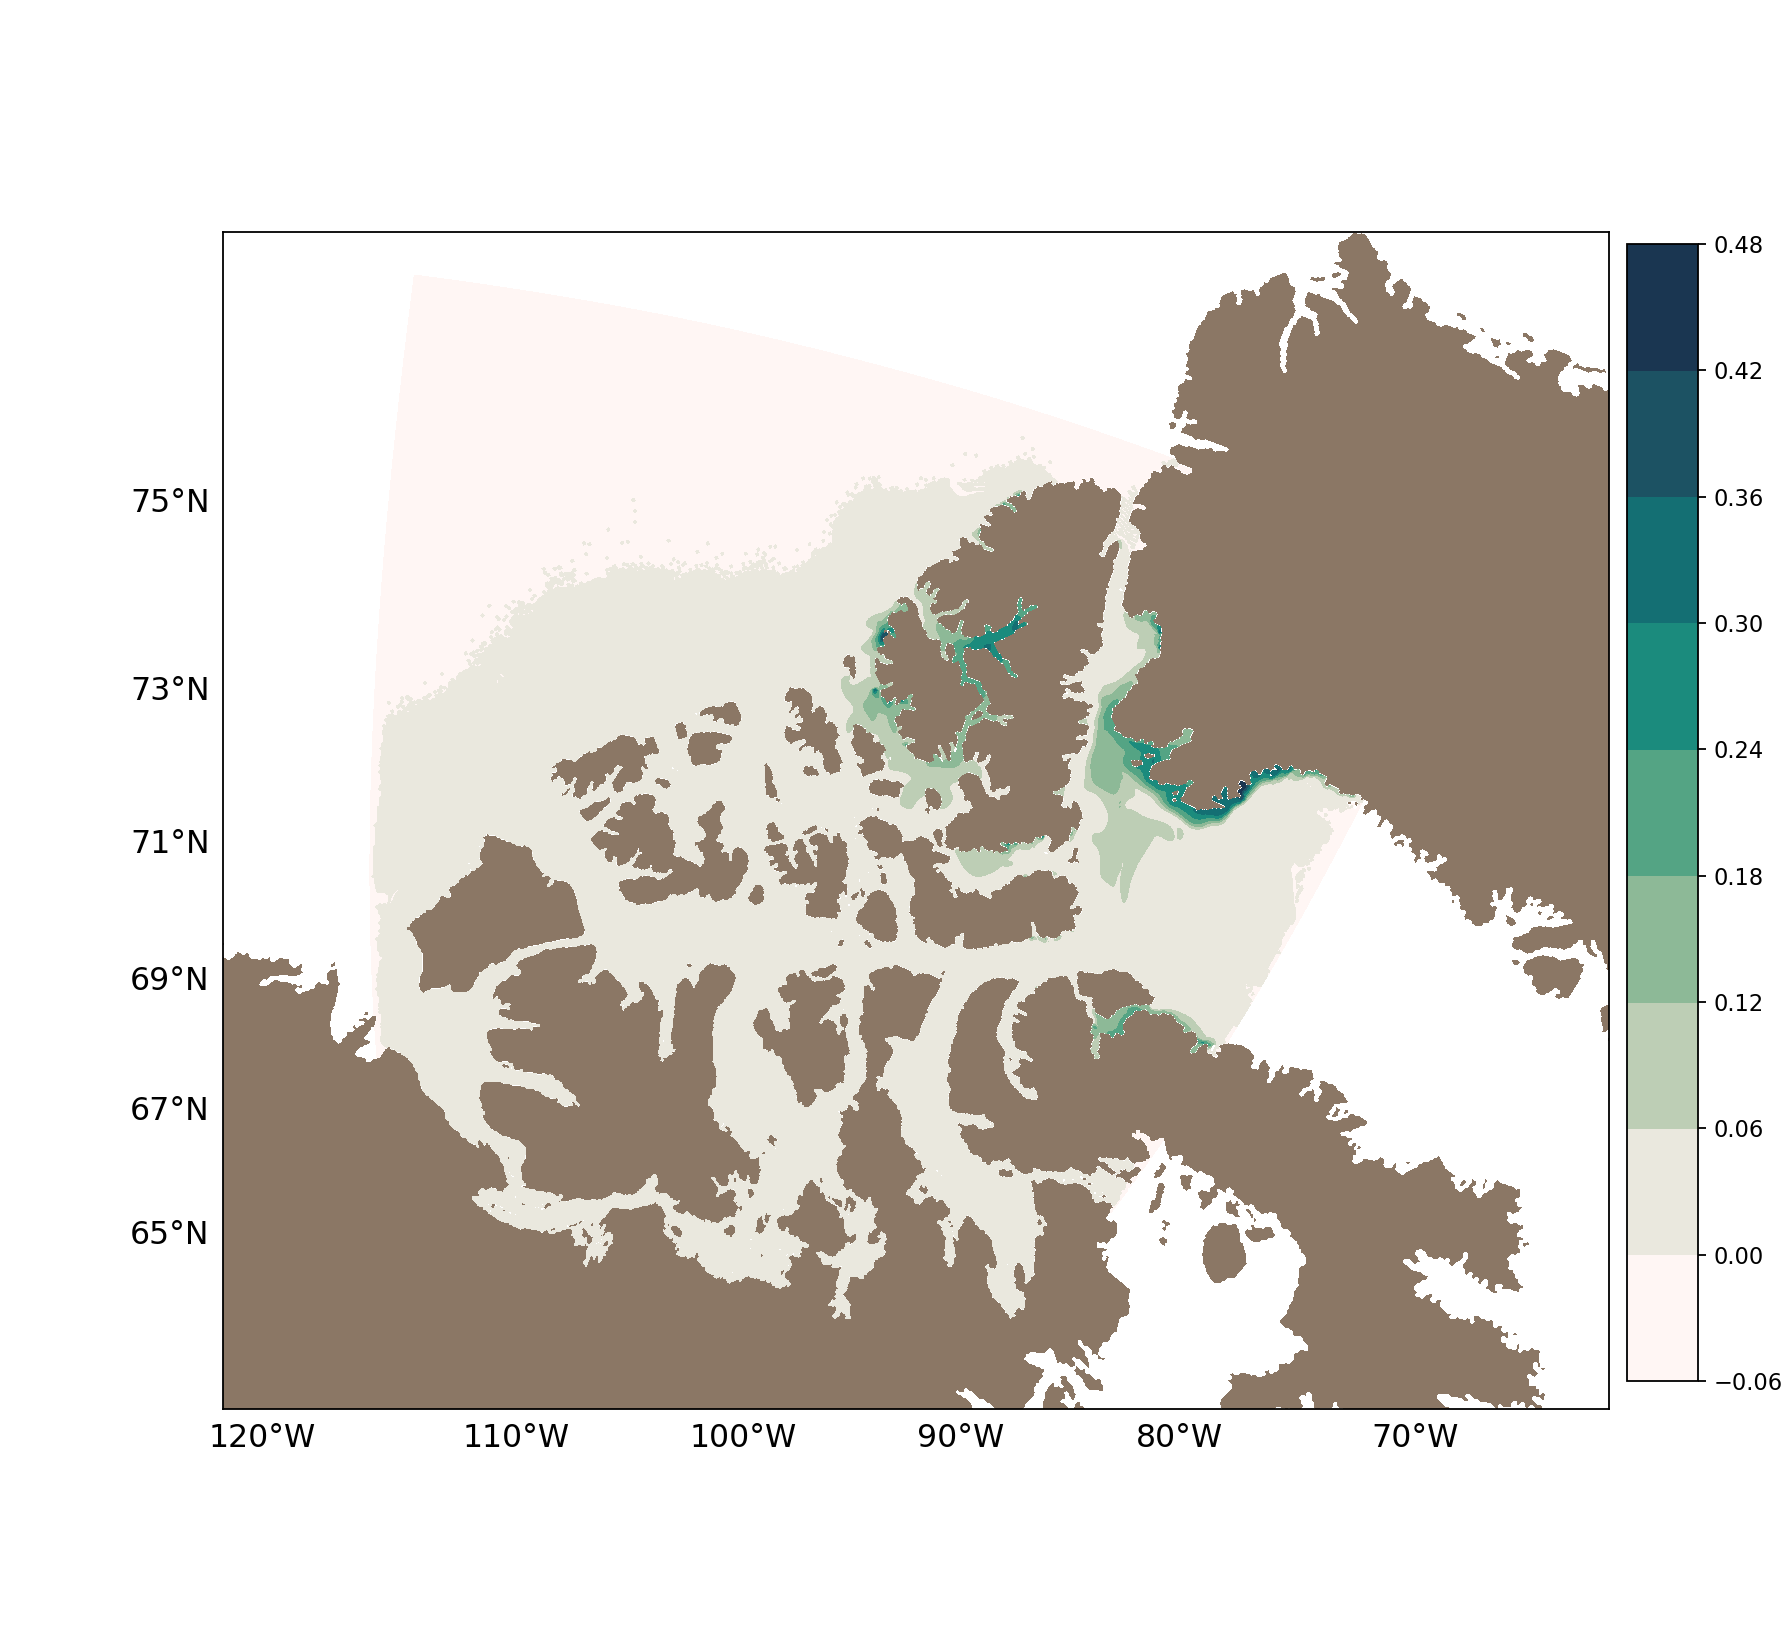

In [23]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y    = proj(lons, lats)
colour  = cmocean.cm.tempo

cbar    = proj.contourf(x, y, glacier_prop_2015[8,0,:,:], vmin=0, vmax=0.5, cmap=colour)
    
fig     = plt.gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

In [44]:
def find_RCD(prop_river, tmask, RCD_def=0.3):
    # Input arguments:
    # - prop_river (t,z,y,x) --- contribution of riverine input to total Mn concentration at this point in space
    # - tmask (z,y,x)        --- land mask
    # - RCD_def              --- definition of proportion above which a point is strongly influenced by rivers
    
    # Apply land mask to prop_river grid:
    mprop_river = np.ma.masked_where((tmask < 0.1), prop_river)
    
    RCD = (mprop_river >= RCD_def).astype(int)
    
    # Output:
    # - RCD (t,z,y,x) --- returns 0 (not RCD) or 1 (RCD) for each grid point
    return RCD

In [45]:
# RCD_glac_2002 = find_RCD(glacier_prop_2002, tmask_full, RCD_def=0.05)
# RCD_glac_2003 = find_RCD(glacier_prop_2003, tmask_full, RCD_def=0.05)
# RCD_glac_2004 = find_RCD(glacier_prop_2004, tmask_full, RCD_def=0.05)
# RCD_glac_2005 = find_RCD(glacier_prop_2005, tmask_full, RCD_def=0.05)
# RCD_glac_2006 = find_RCD(glacier_prop_2006, tmask_full, RCD_def=0.05)
# RCD_glac_2007 = find_RCD(glacier_prop_2007, tmask_full, RCD_def=0.05)
# RCD_glac_2008 = find_RCD(glacier_prop_2008, tmask_full, RCD_def=0.05)
# RCD_glac_2009 = find_RCD(glacier_prop_2009, tmask_full, RCD_def=0.05)
# RCD_glac_2010 = find_RCD(glacier_prop_2010, tmask_full, RCD_def=0.05)
# RCD_glac_2011 = find_RCD(glacier_prop_2011, tmask_full, RCD_def=0.05)
# RCD_glac_2012 = find_RCD(glacier_prop_2012, tmask_full, RCD_def=0.05)
# RCD_glac_2013 = find_RCD(glacier_prop_2013, tmask_full, RCD_def=0.05)
# RCD_glac_2014 = find_RCD(glacier_prop_2014, tmask_full, RCD_def=0.05)
RCD_glac_2015 = find_RCD(glacier_prop_2015, tmask_full, RCD_def=0.05)
RCD_glac_2016 = find_RCD(glacier_prop_2016, tmask_full, RCD_def=0.05)
RCD_glac_2017 = find_RCD(glacier_prop_2017, tmask_full, RCD_def=0.05)
RCD_glac_2018 = find_RCD(glacier_prop_2018, tmask_full, RCD_def=0.05)

RCD_cont_2015 = find_RCD(cont_prop_2015, tmask_full, RCD_def=0.05)
RCD_cont_2016 = find_RCD(cont_prop_2016, tmask_full, RCD_def=0.05)
RCD_cont_2017 = find_RCD(cont_prop_2017, tmask_full, RCD_def=0.05)
RCD_cont_2018 = find_RCD(cont_prop_2018, tmask_full, RCD_def=0.05)

/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater_equal
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


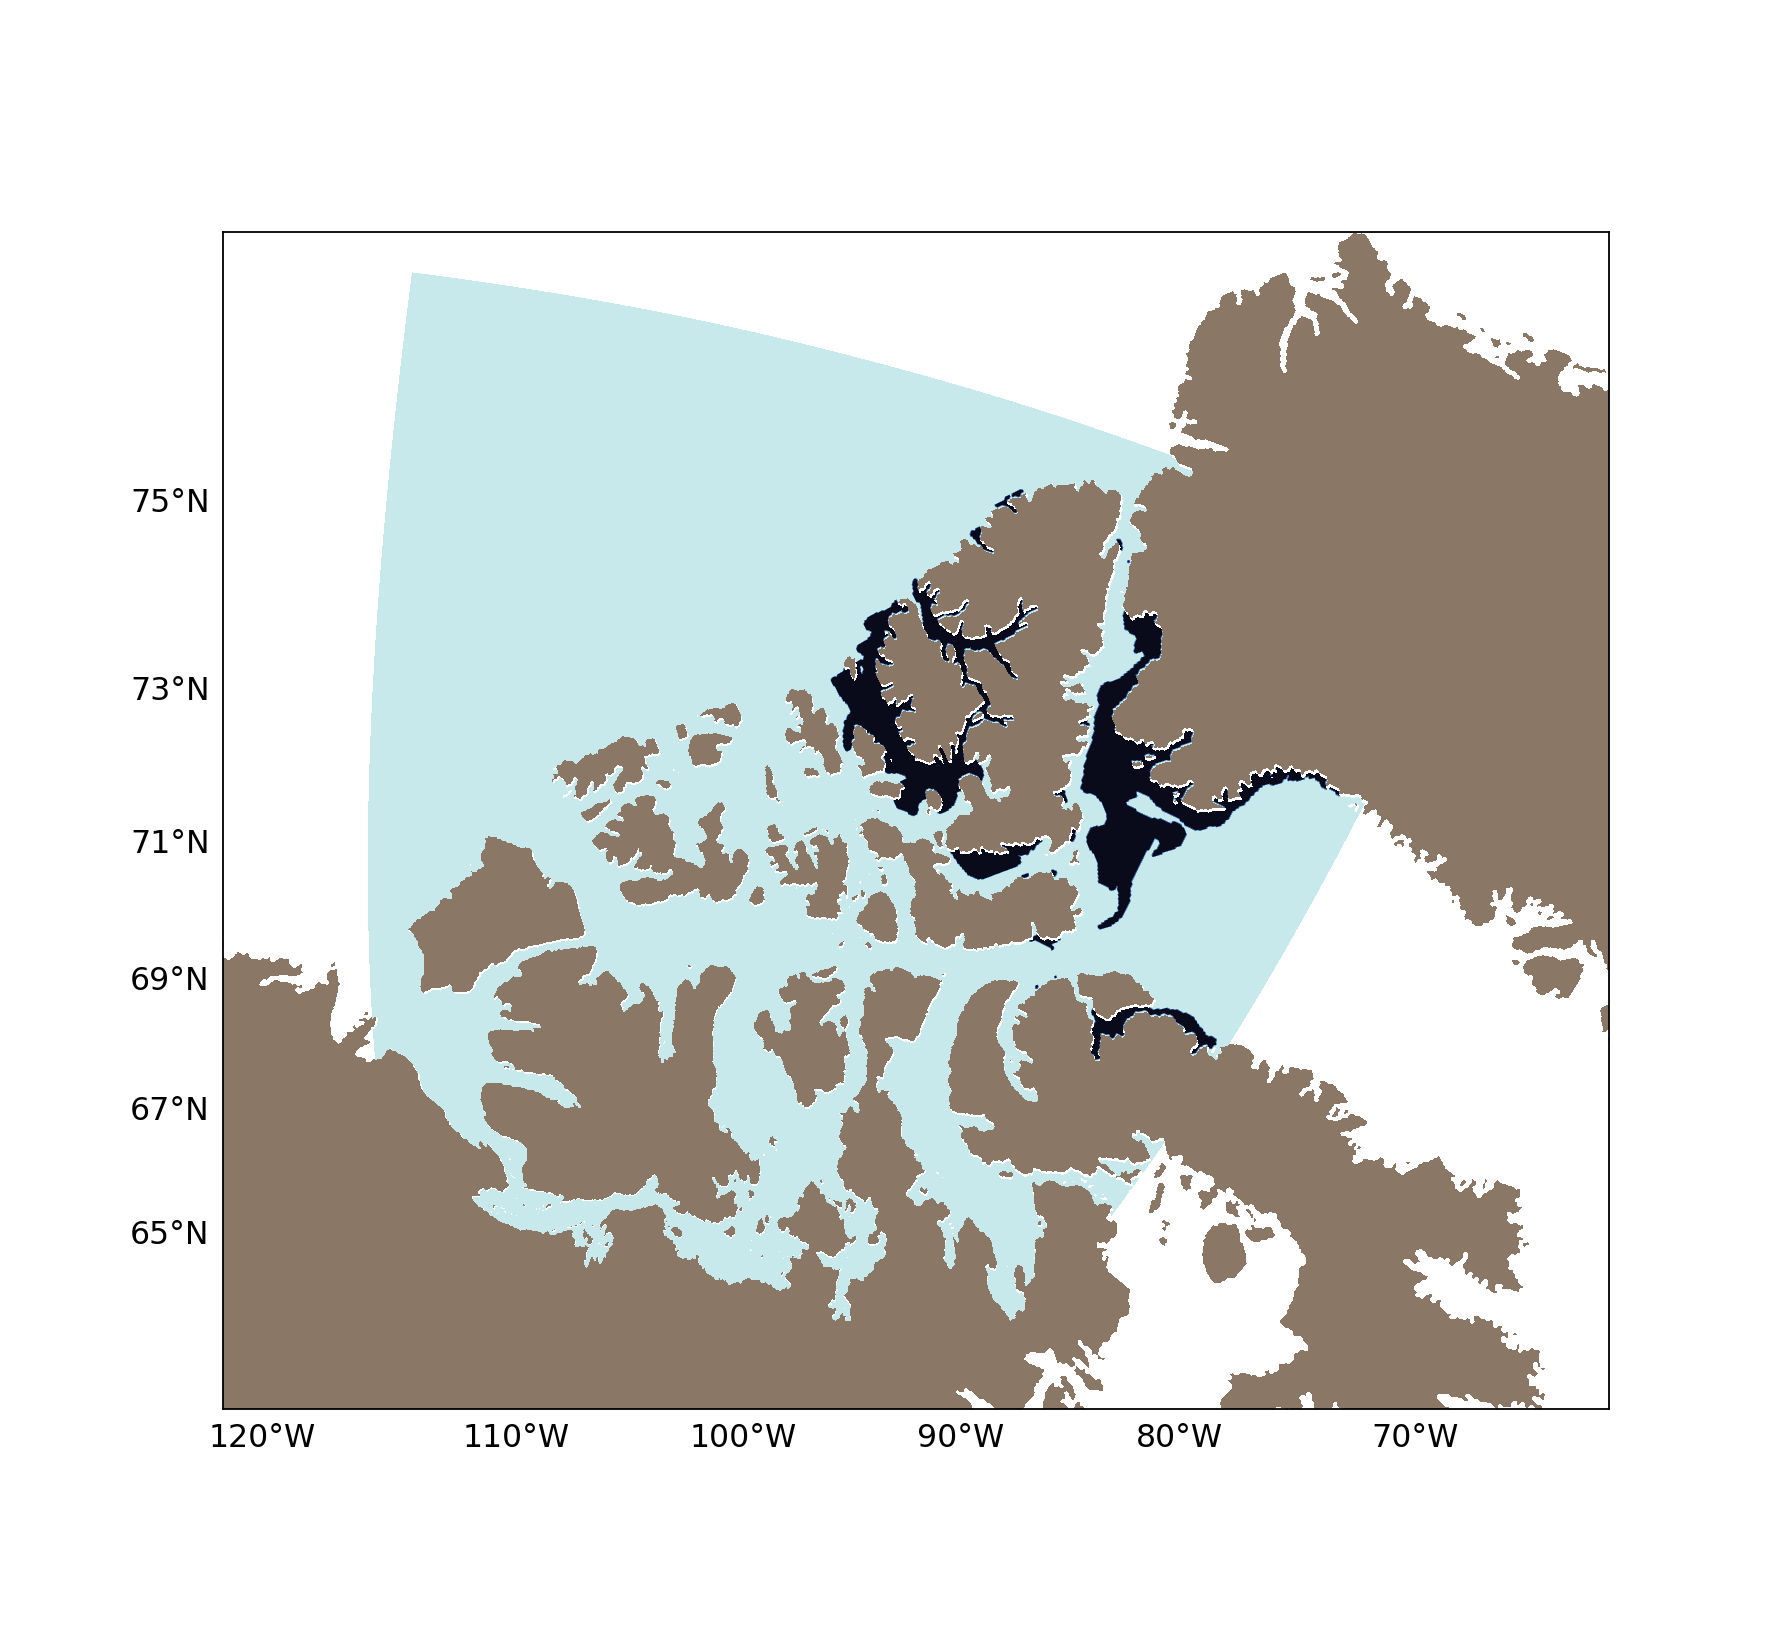

In [29]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y    = proj(lons, lats)
colour  = cmocean.cm.ice_r

proj.contourf(x, y, RCD_glac_2015[8,0,:,:], vmin=0.0, vmax=1.0, cmap=colour)

In [30]:
def months_overview(var, levels, min_v=0.5, max_v=1, proj=proj):
    ax   = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn_subplotsax.pickle','rb'))
    
    x, y = proj(lons, lats)
    colour=cmocean.cm.ice_r
    depth = 0
    cbar  = proj.contourf(x, y, var[0, depth,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,0])
    proj.contourf(x, y, var[1, depth,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,1])
    proj.contourf(x, y, var[2, depth,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,2])
    proj.contourf(x, y, var[3, depth,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,3])
    proj.contourf(x, y, var[4, depth,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,0])
    proj.contourf(x, y, var[5, depth,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,1])
    proj.contourf(x, y, var[6, depth,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,2])
    proj.contourf(x, y, var[7, depth,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,3])
    proj.contourf(x, y, var[8, depth,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,0])
    proj.contourf(x, y, var[9, depth,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,1])
    proj.contourf(x, y, var[10, depth,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,2])
    proj.contourf(x, y, var[11, depth,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,3])
    
    ax[0,0].set_title('January')
    ax[0,1].set_title('February')
    ax[0,2].set_title('March')
    ax[0,3].set_title('April')
    ax[1,0].set_title('May')
    ax[1,1].set_title('June')
    ax[1,2].set_title('July')
    ax[1,3].set_title('August')
    ax[2,0].set_title('September')
    ax[2,1].set_title('October')
    ax[2,2].set_title('November')
    ax[2,3].set_title('December')

    return

<IPython.core.display.Javascript object>


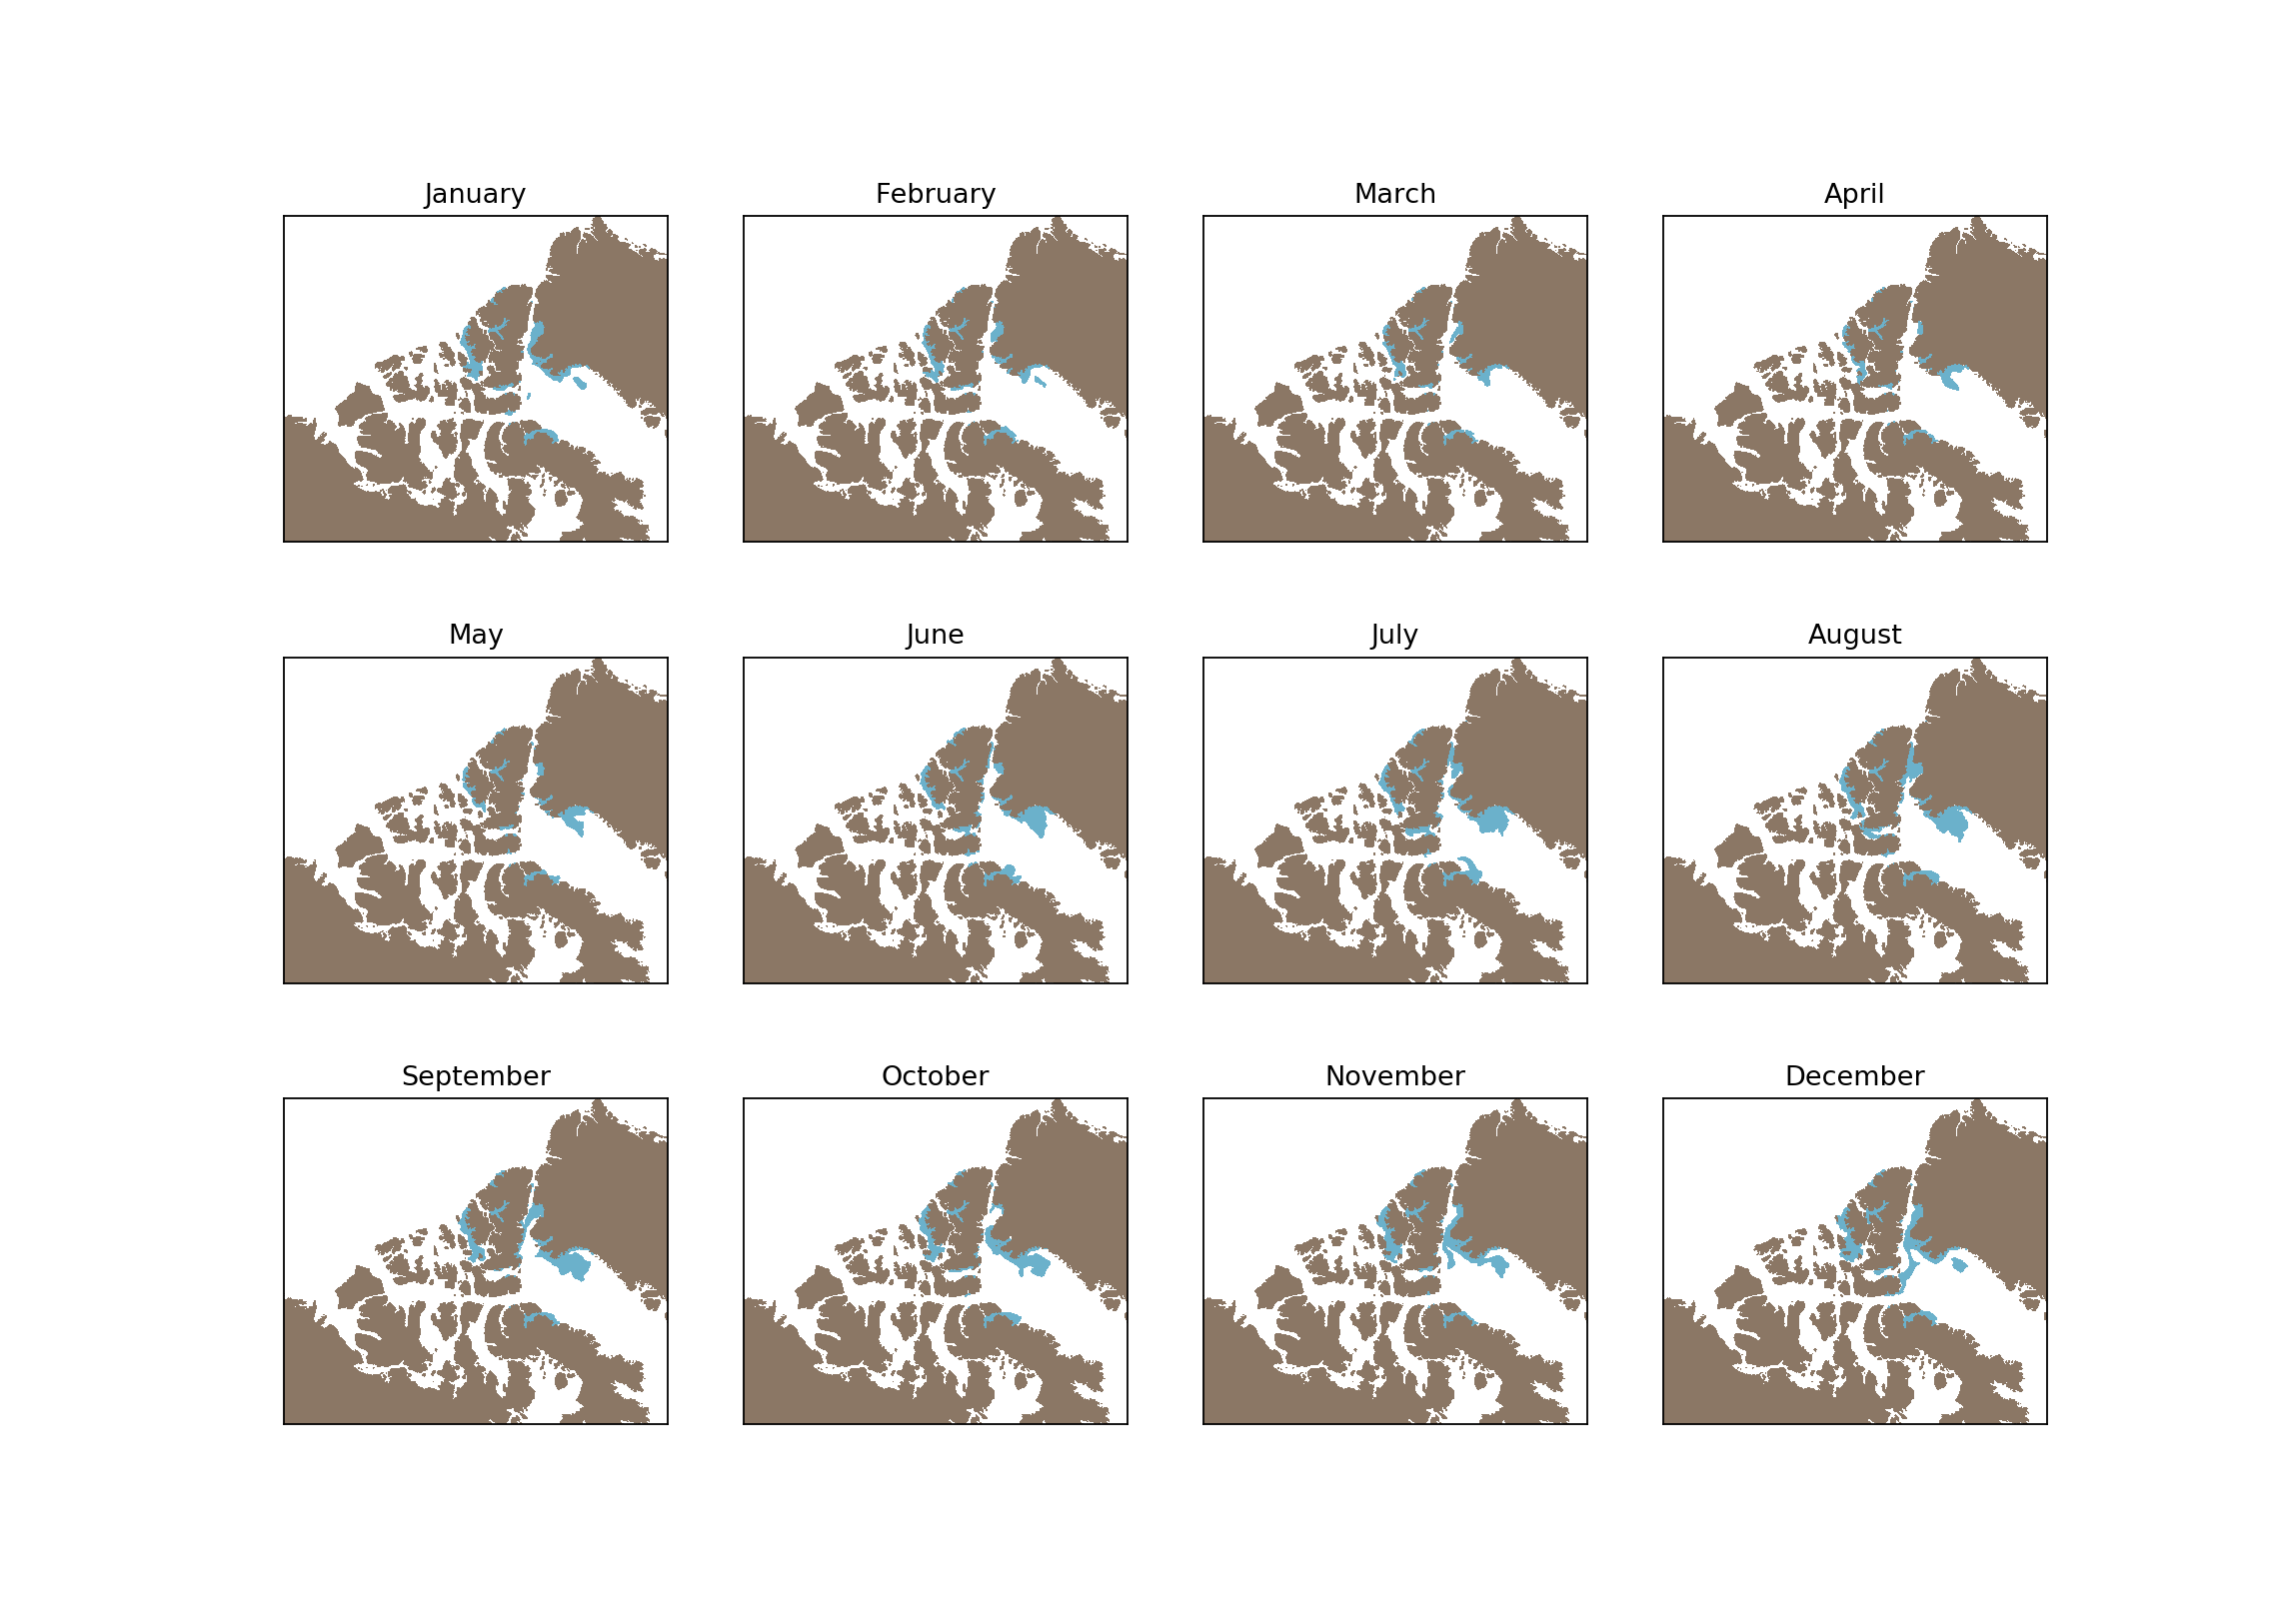

In [28]:
months_overview(RCD_glac_2002, [0.3, 1])

<IPython.core.display.Javascript object>


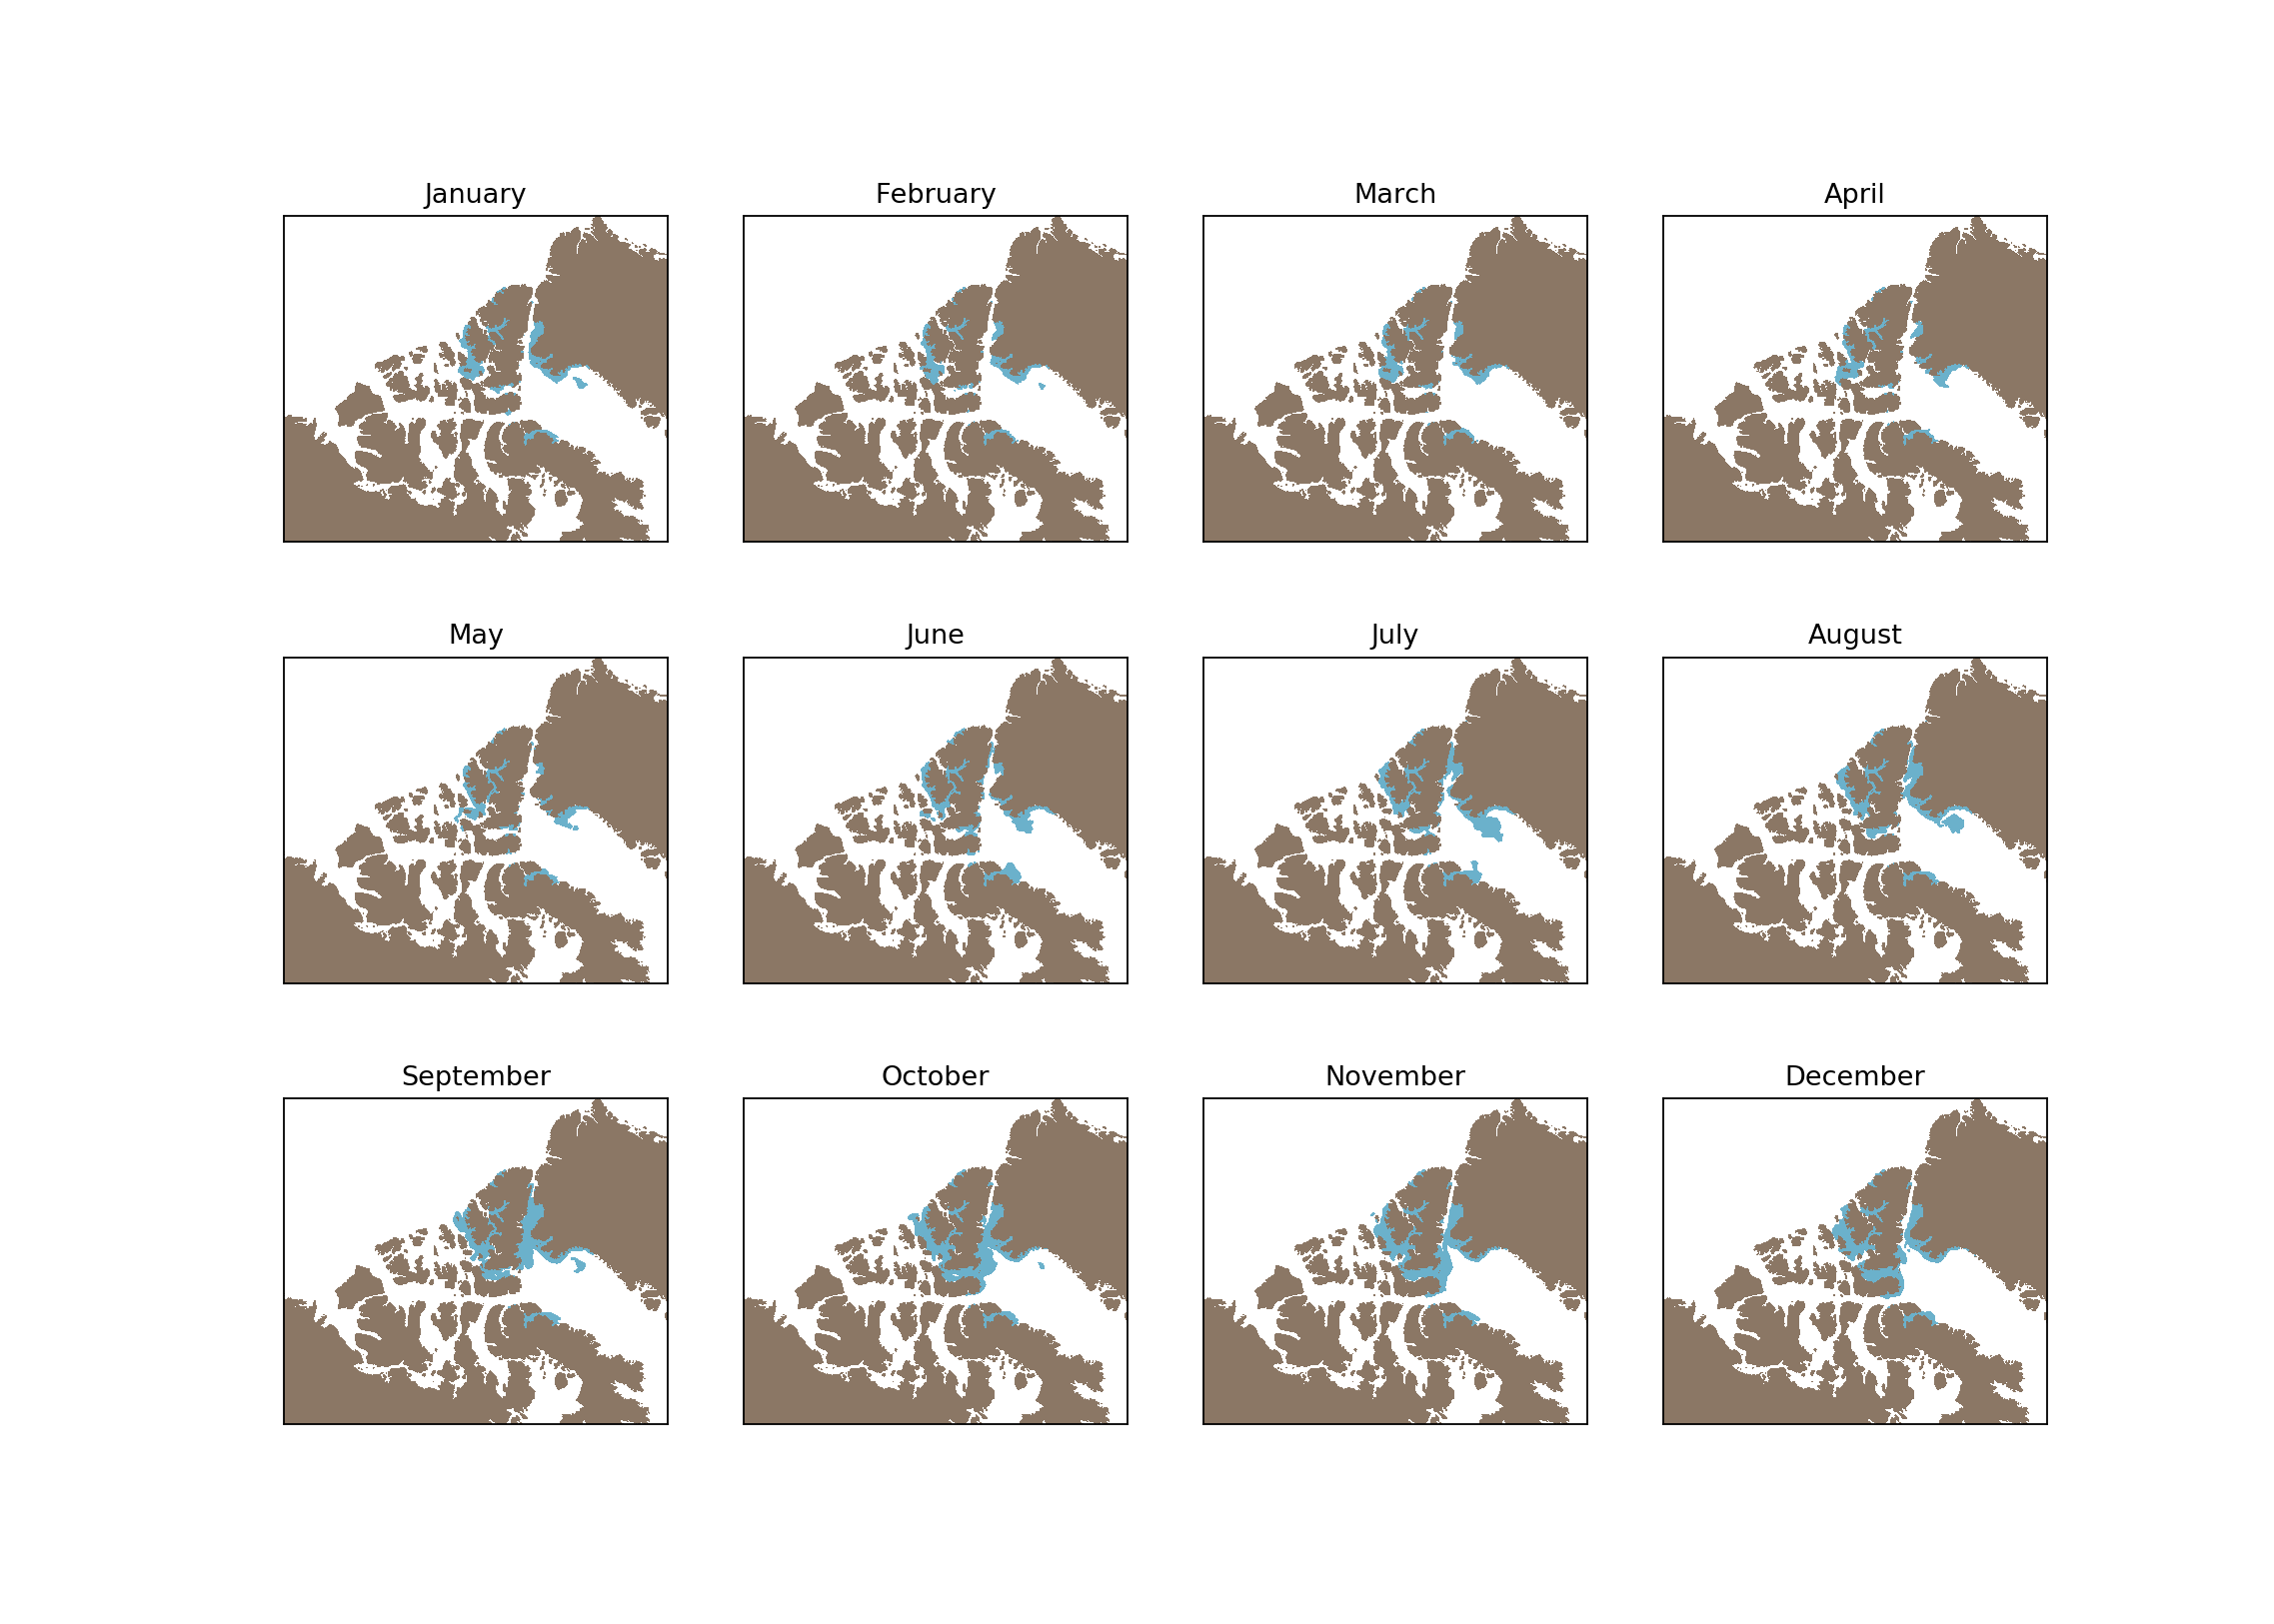

In [29]:
months_overview(RCD_glac_2003, [0.3, 1])

<IPython.core.display.Javascript object>


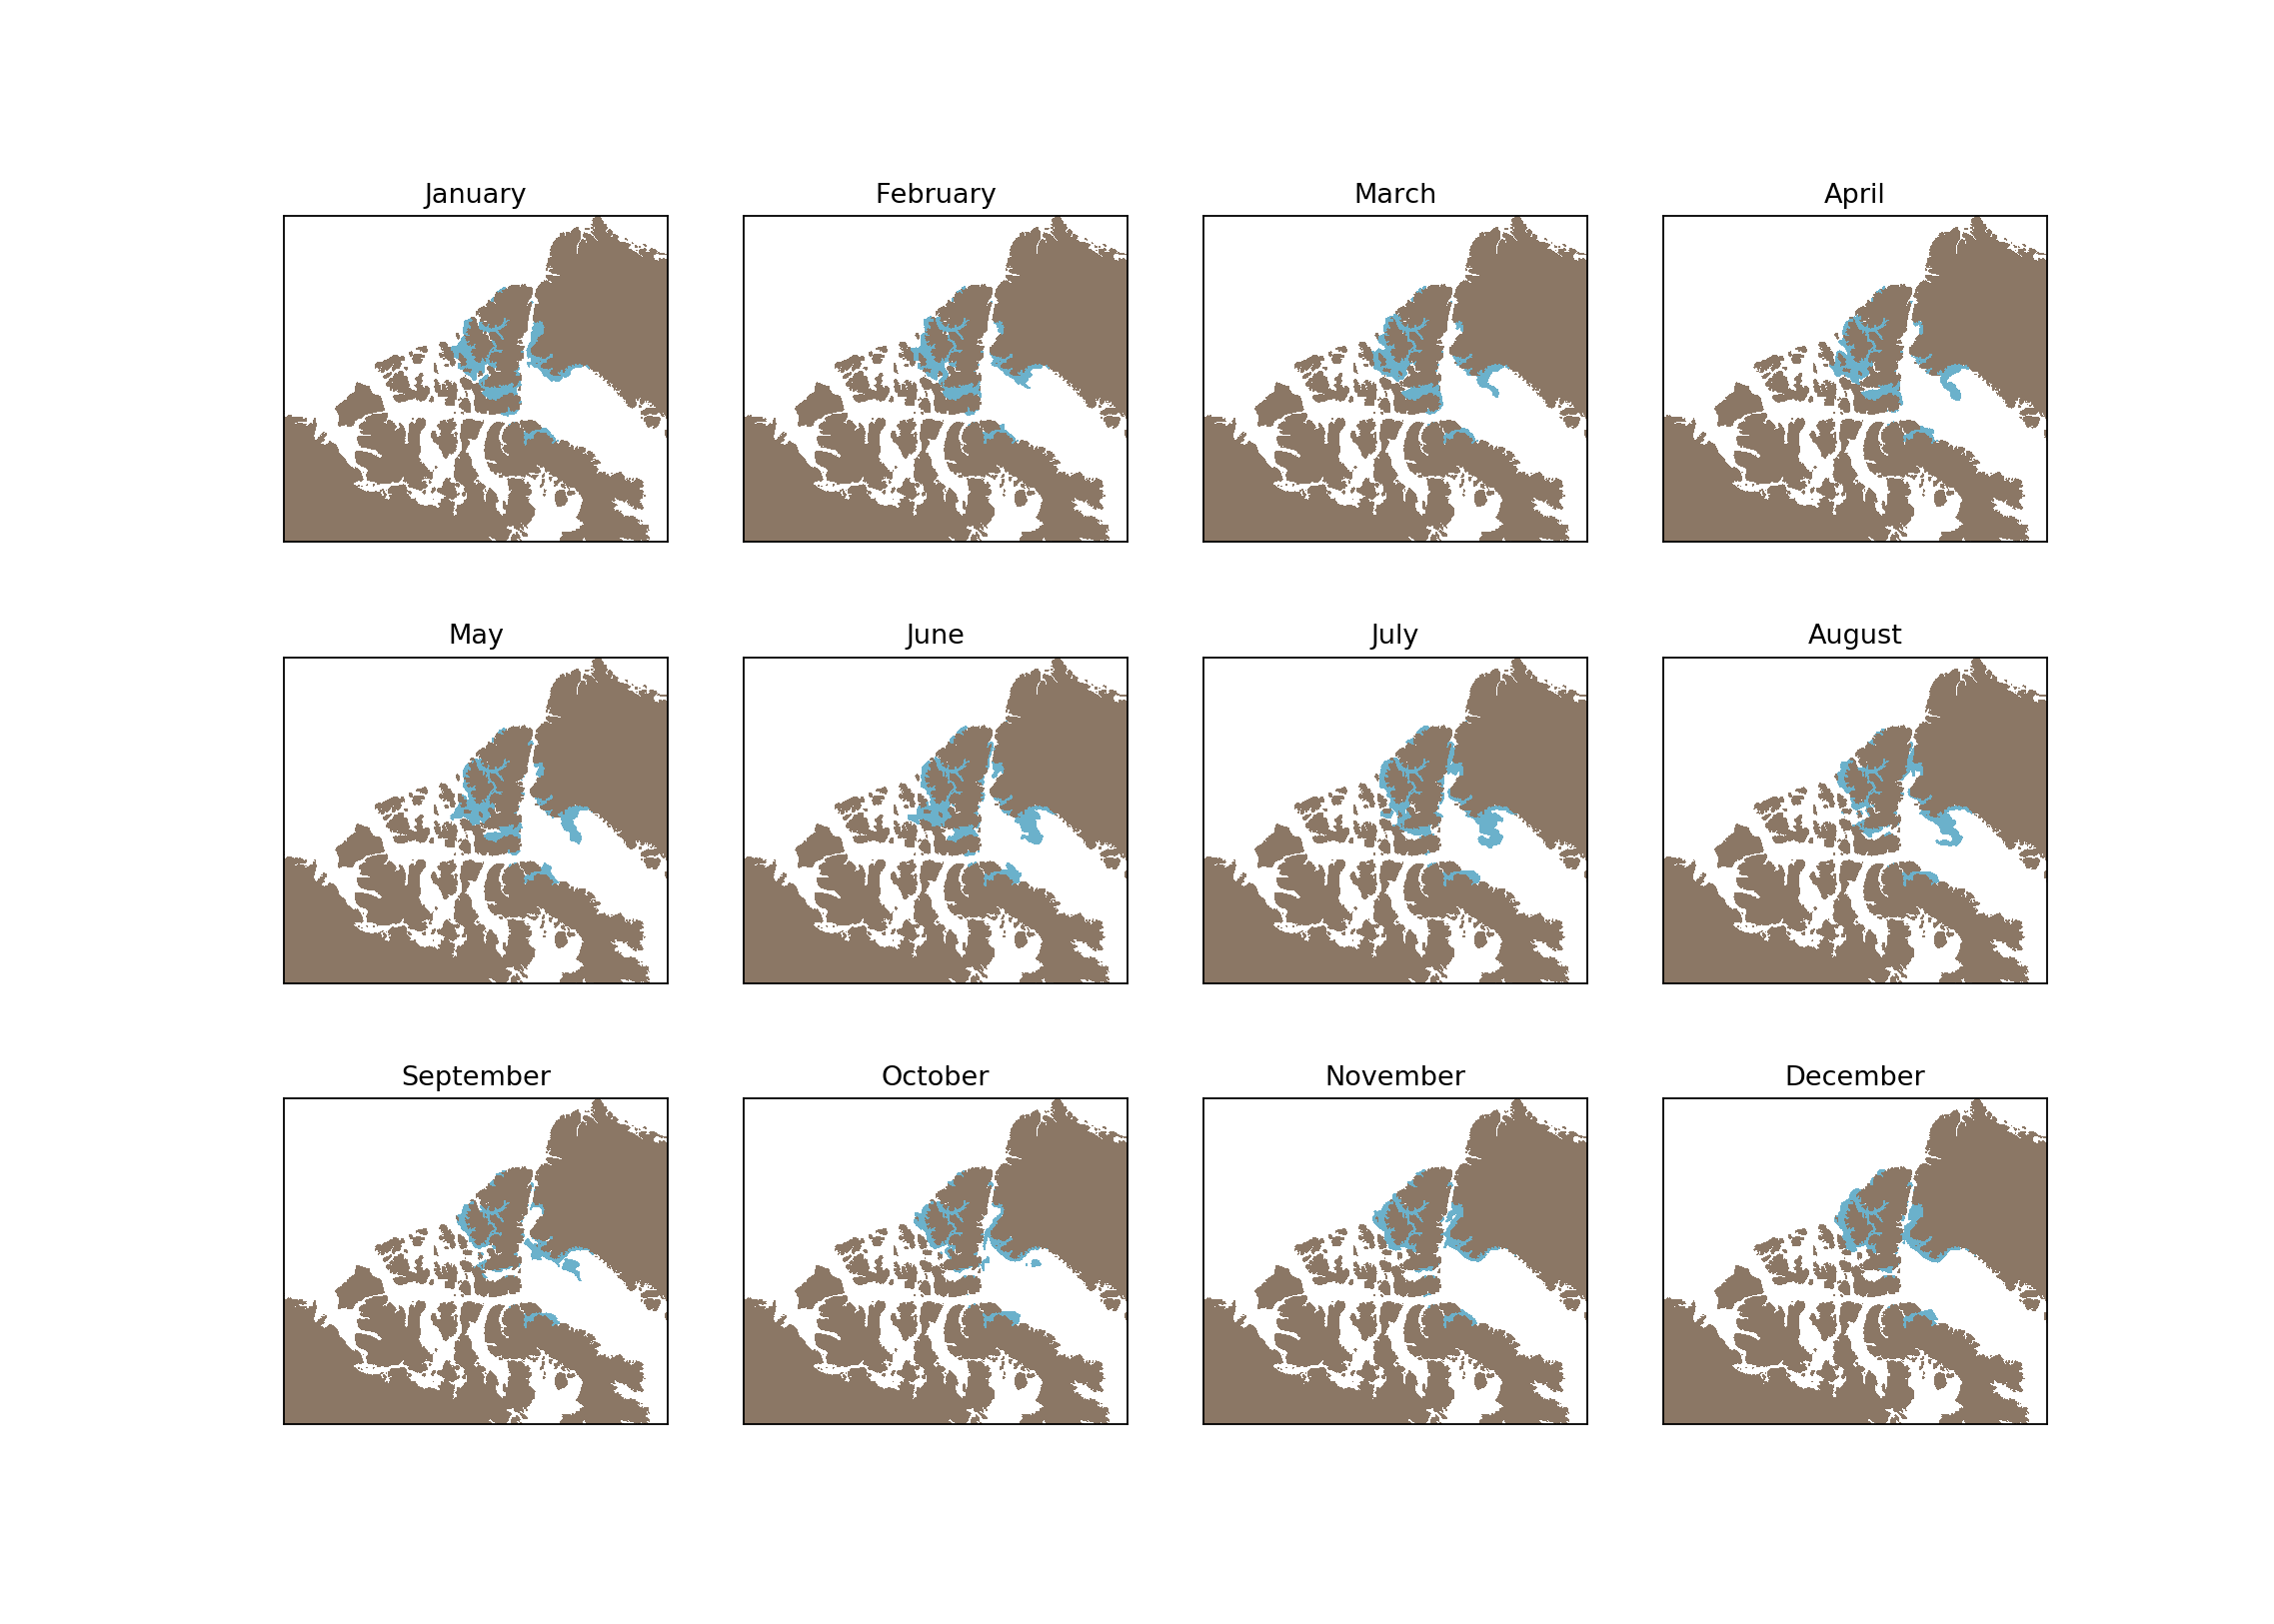

In [30]:
months_overview(RCD_glac_2004, [0.3, 1])

<IPython.core.display.Javascript object>


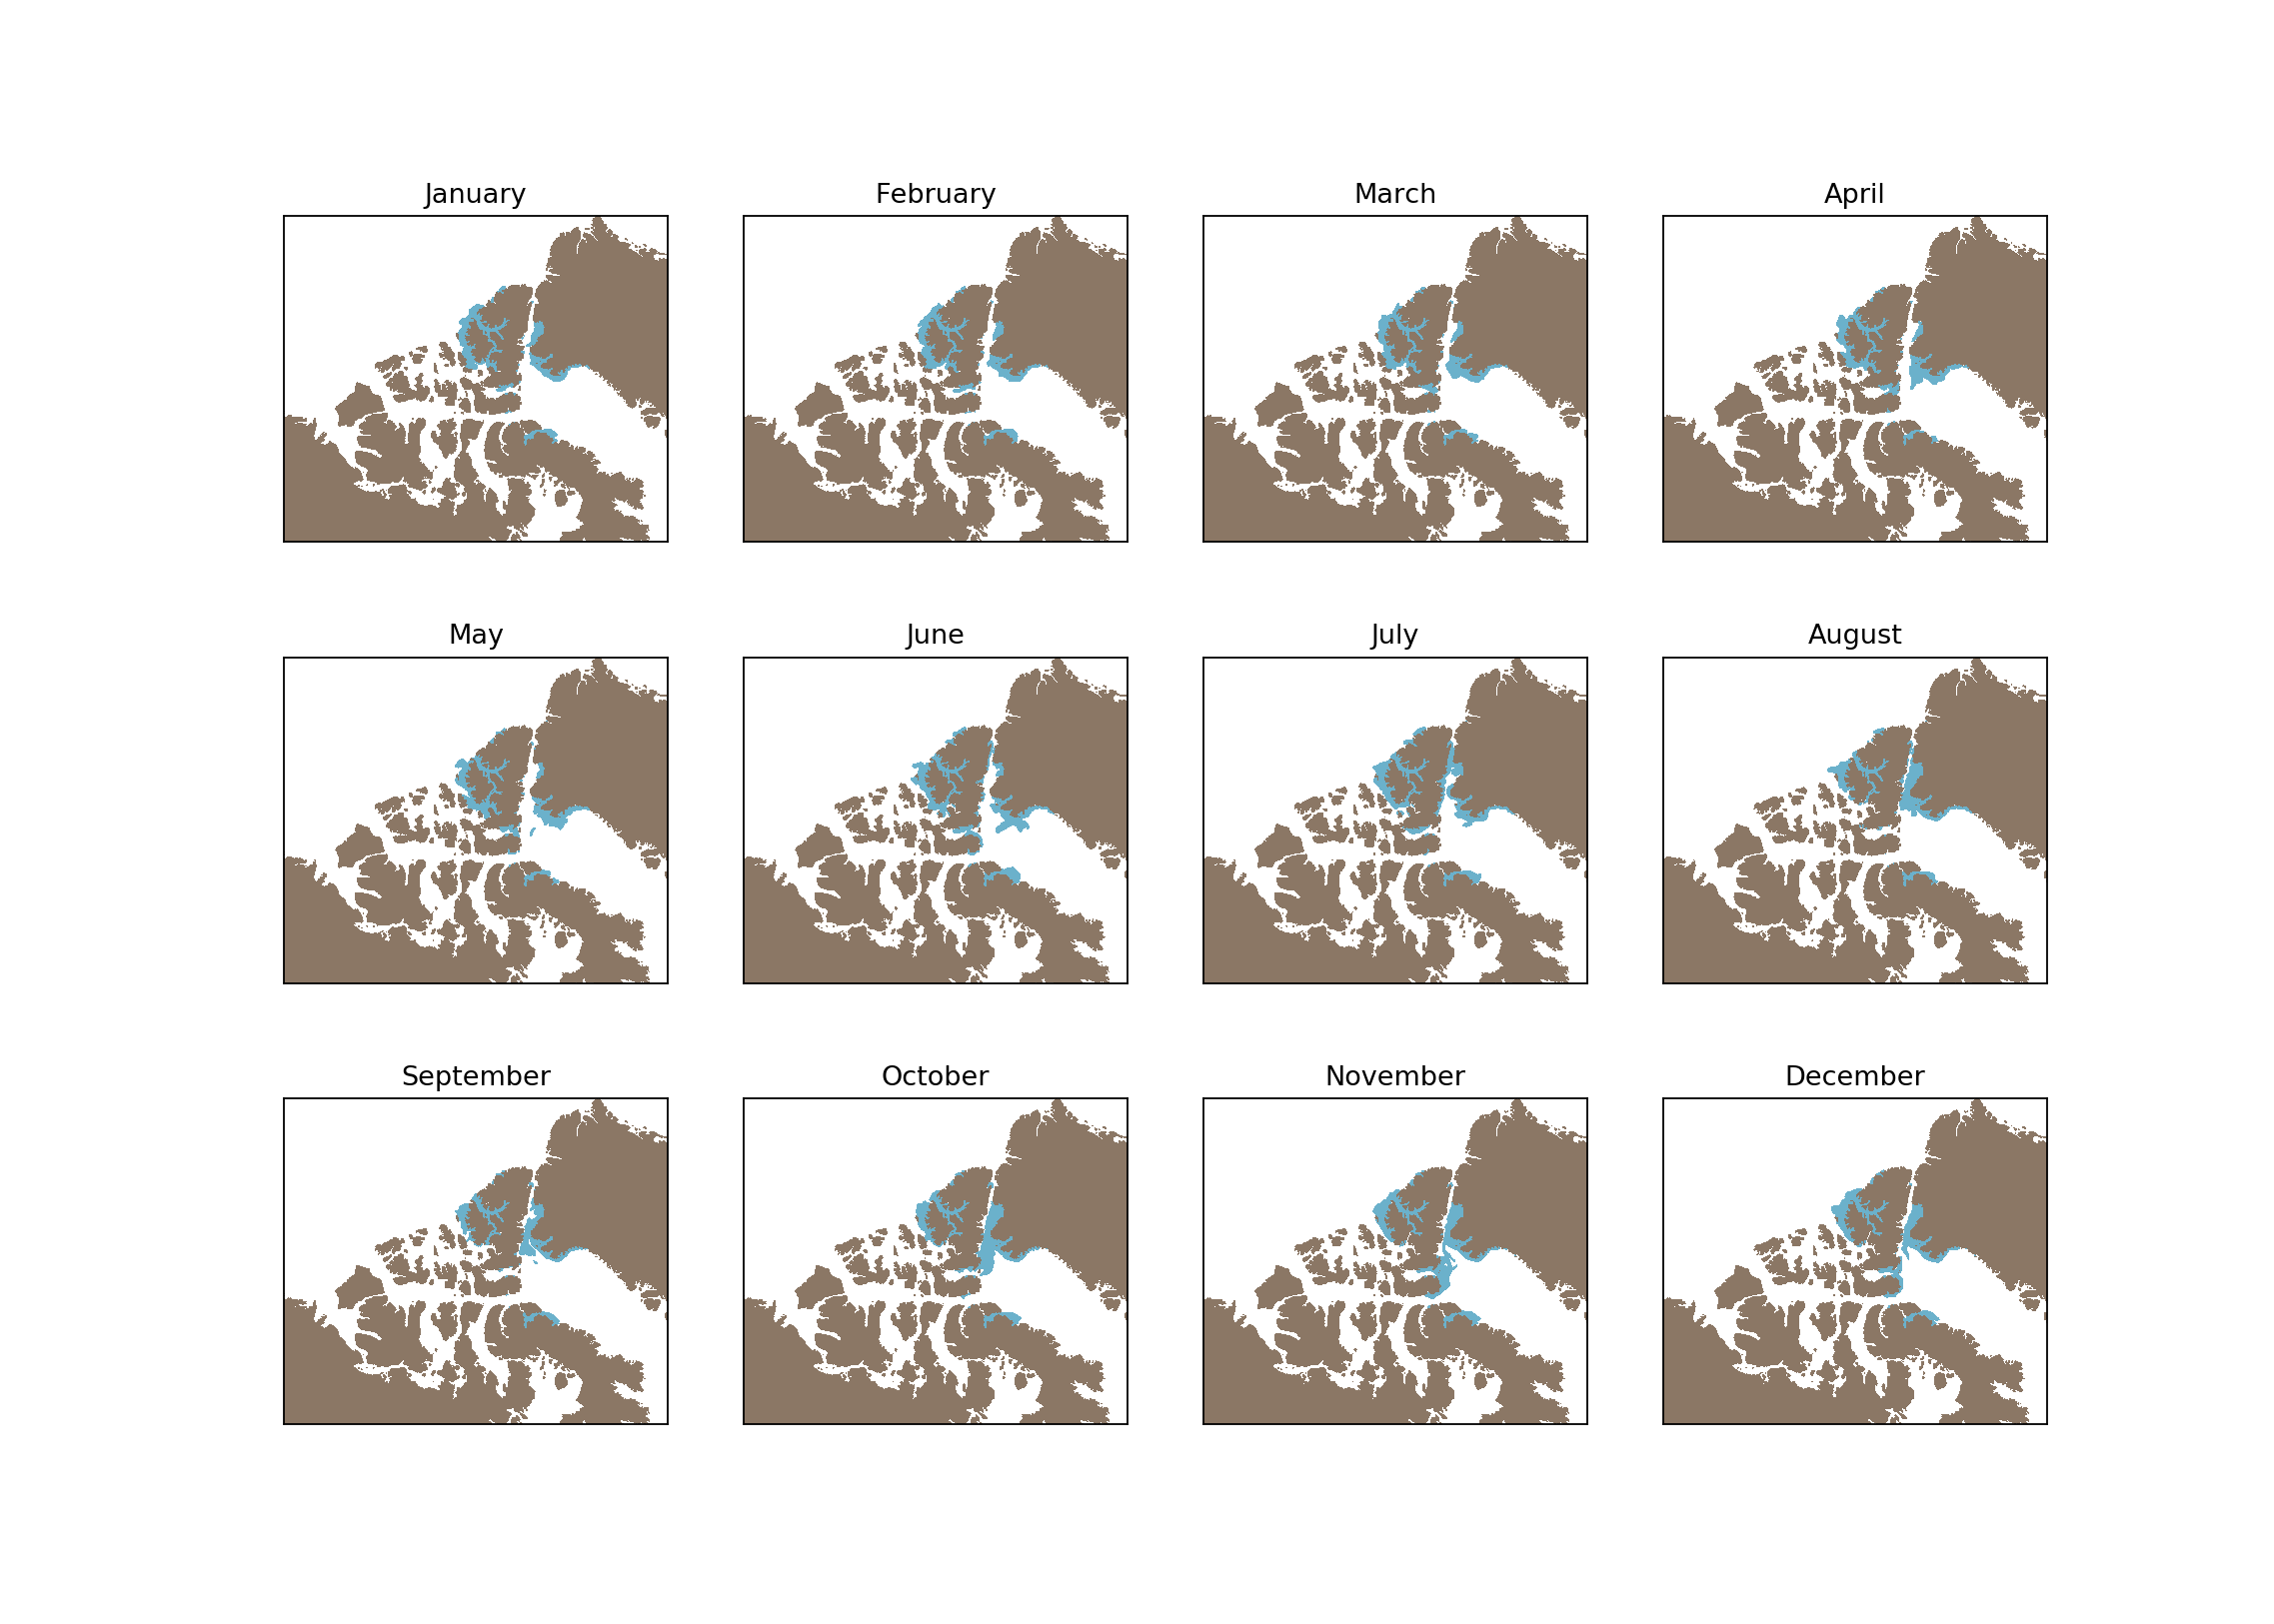

In [31]:
months_overview(RCD_glac_2005, [0.3, 1])

<IPython.core.display.Javascript object>


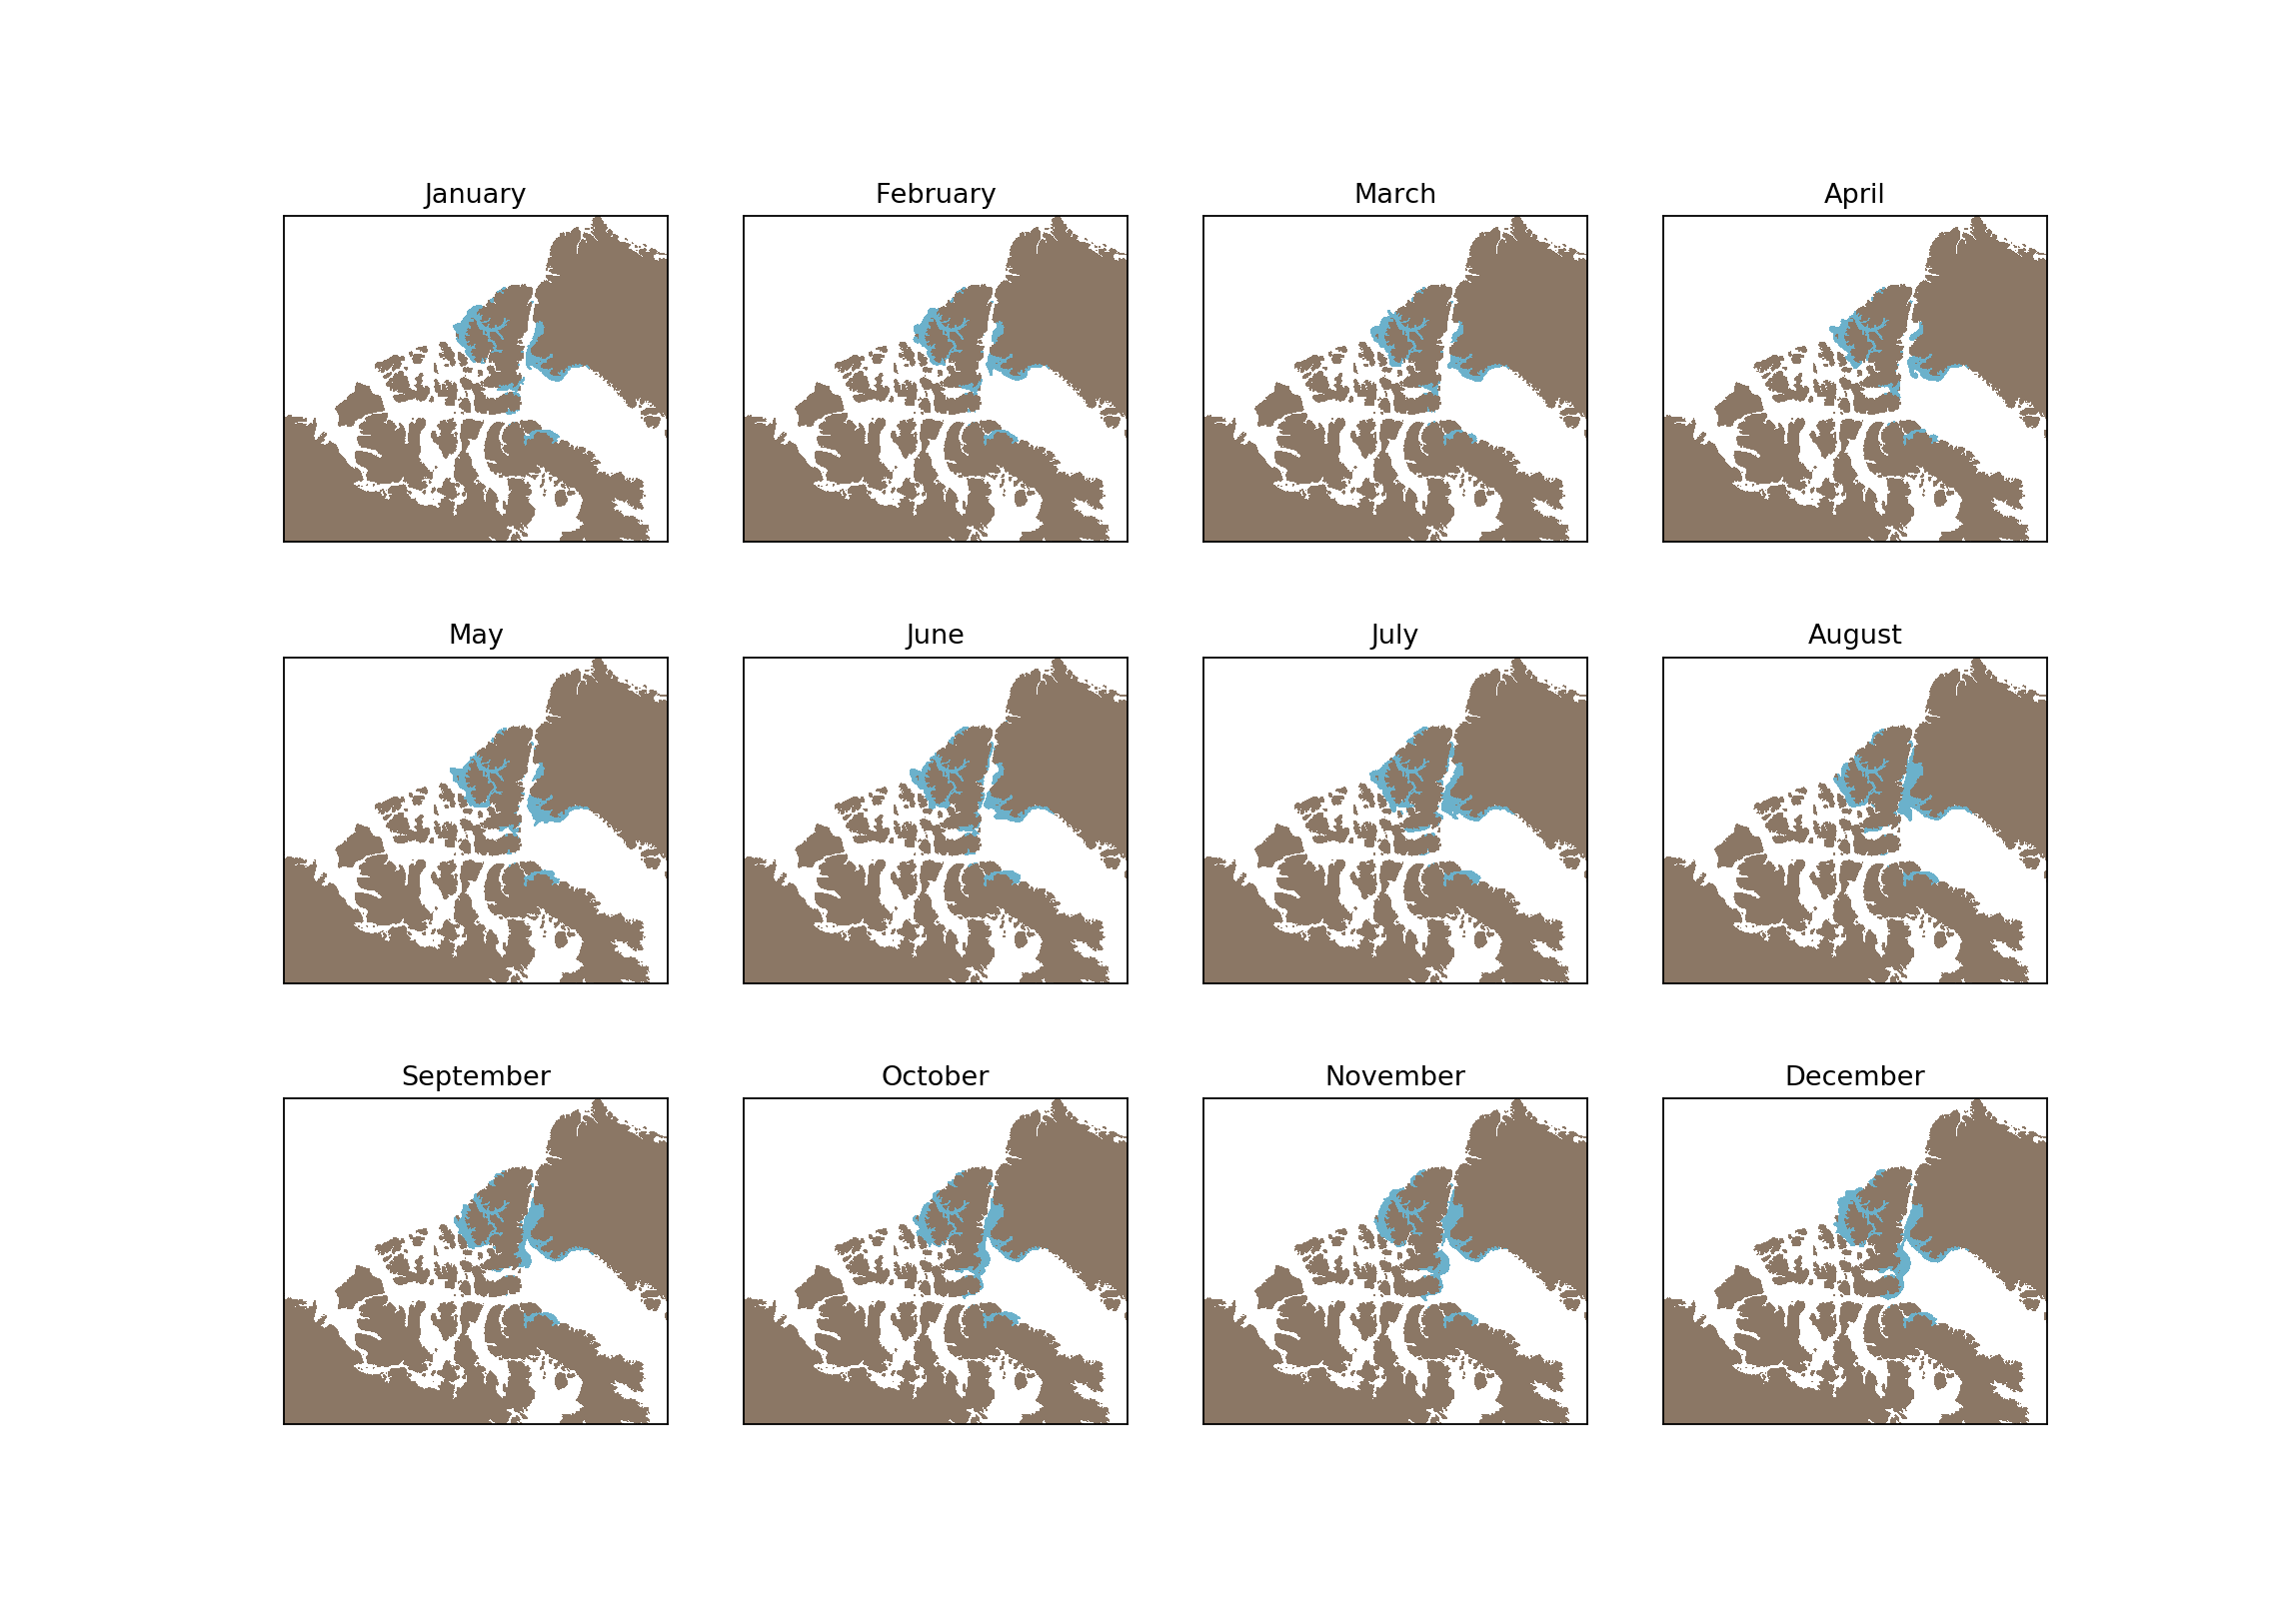

In [32]:
months_overview(RCD_glac_2006, [0.3, 1])

<IPython.core.display.Javascript object>


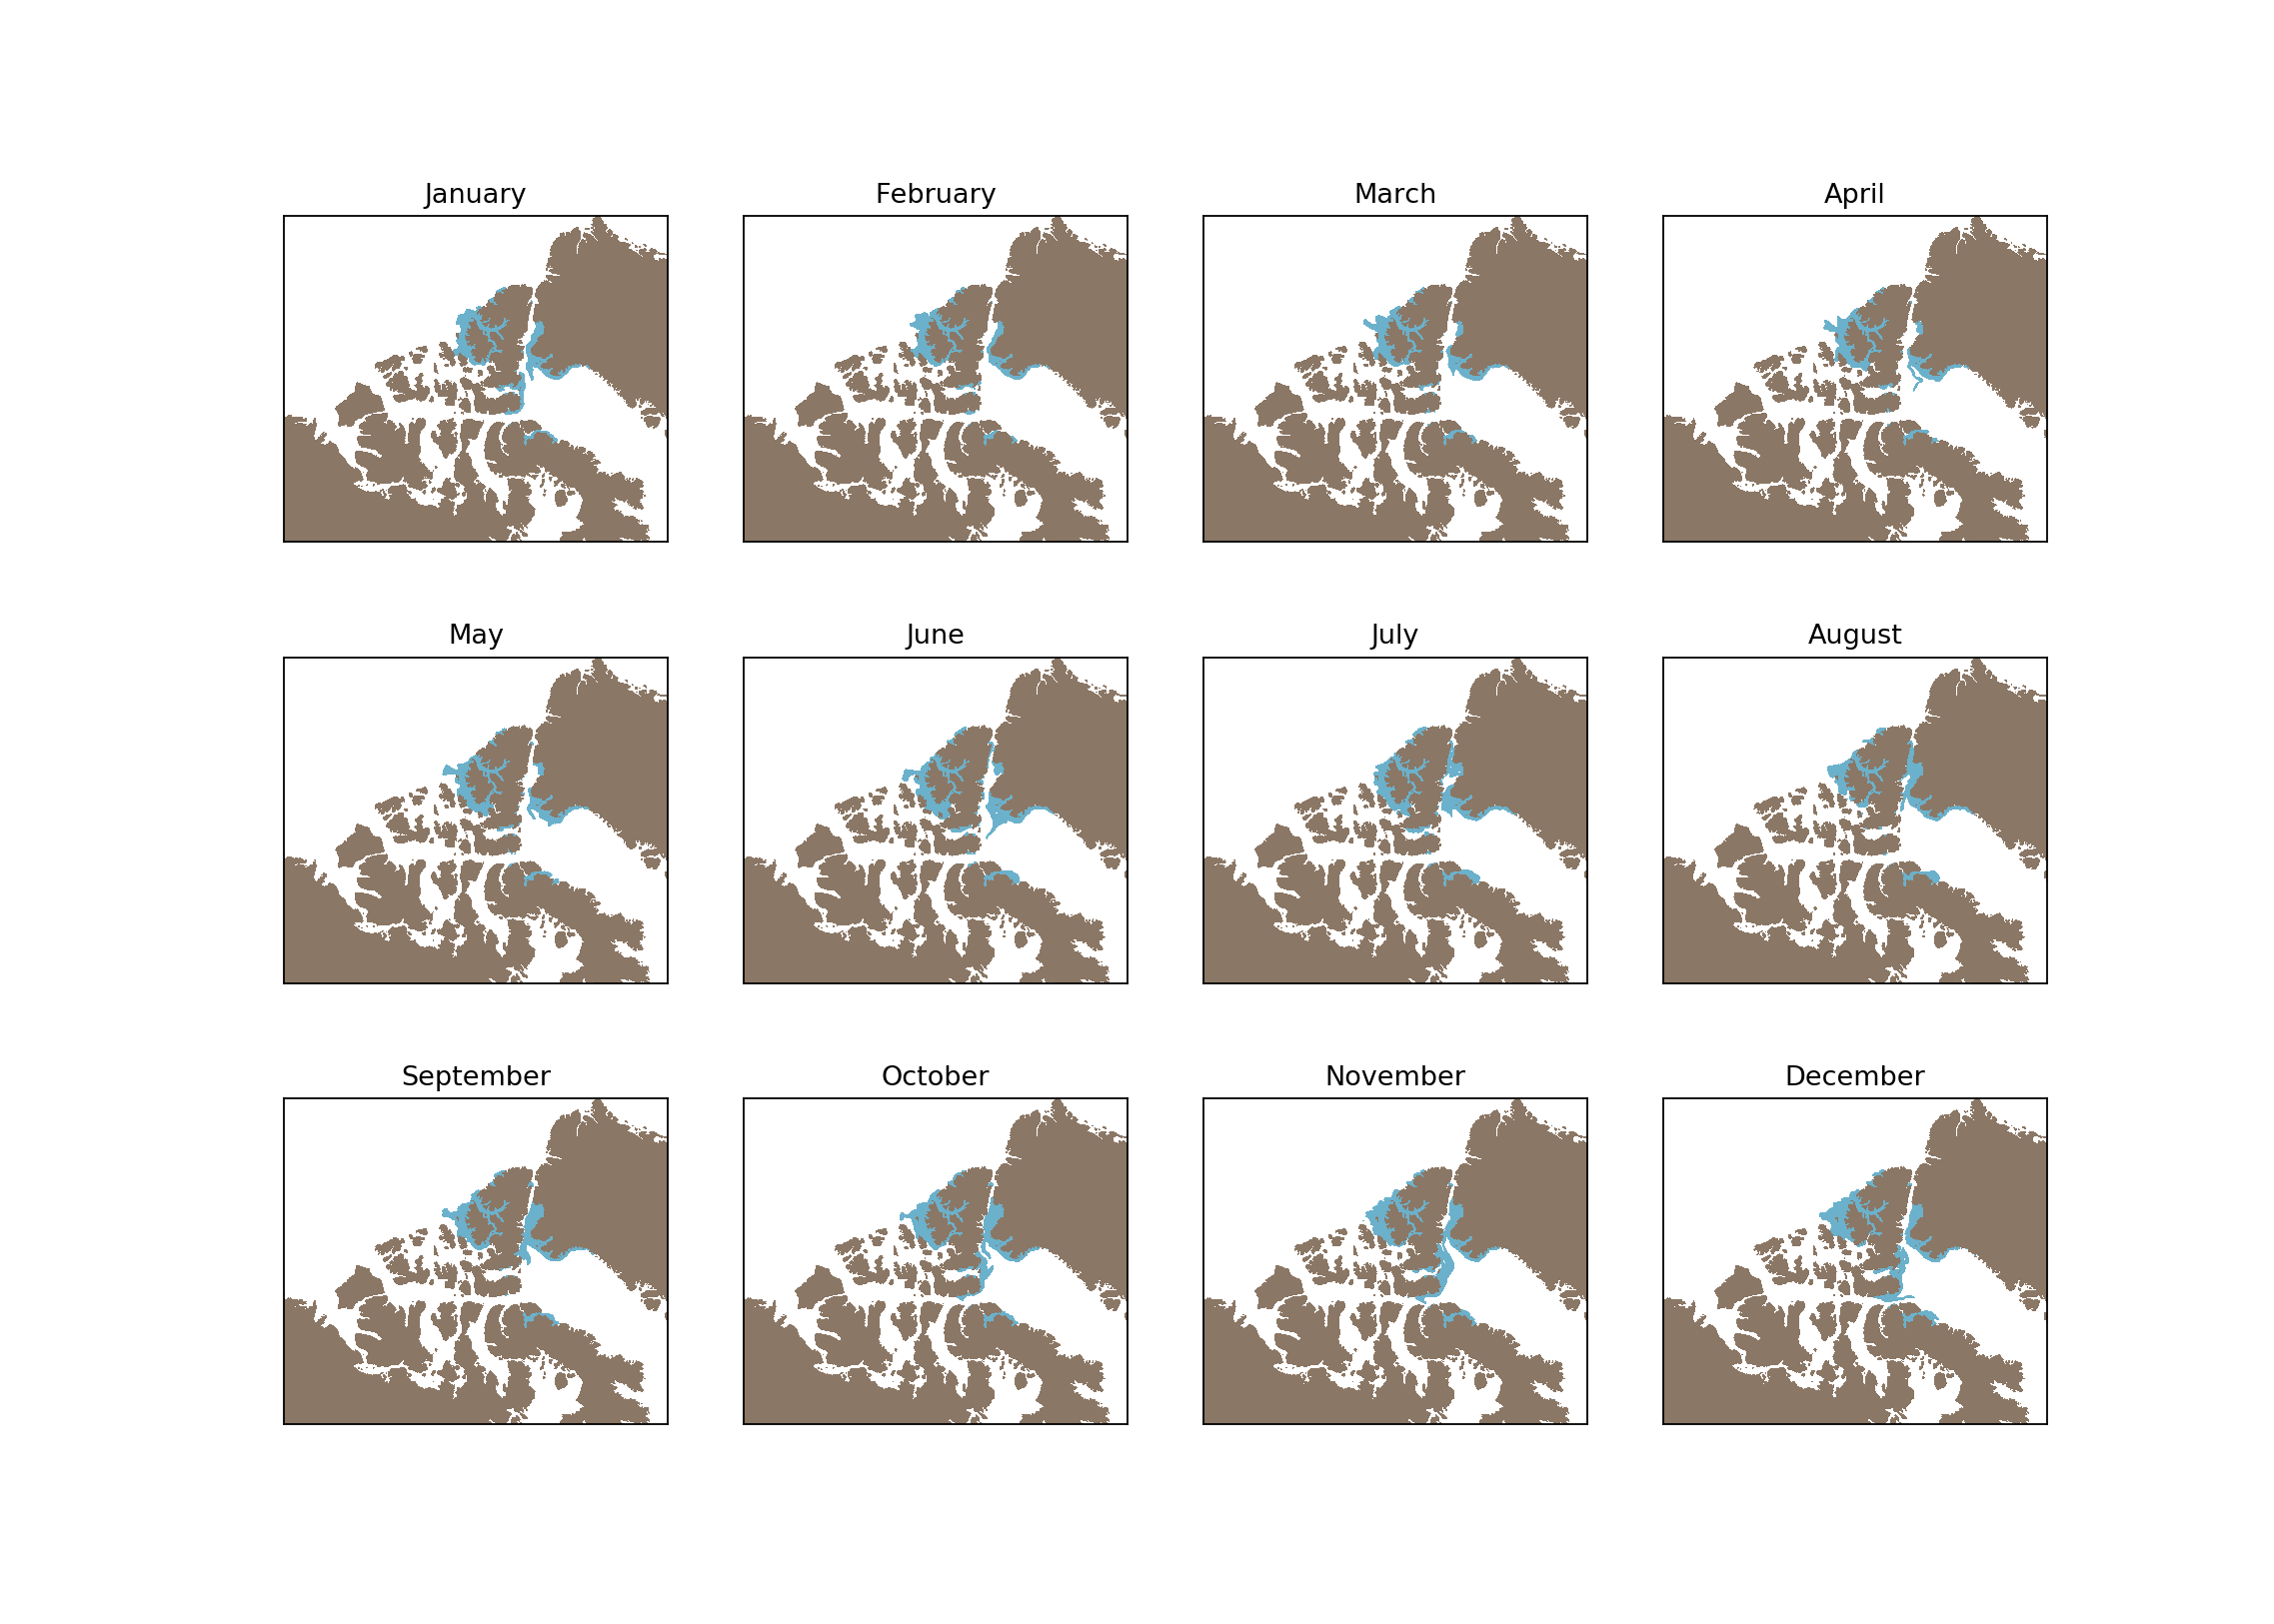

In [38]:
months_overview(RCD_glac_2007, [0.3, 1])

<IPython.core.display.Javascript object>


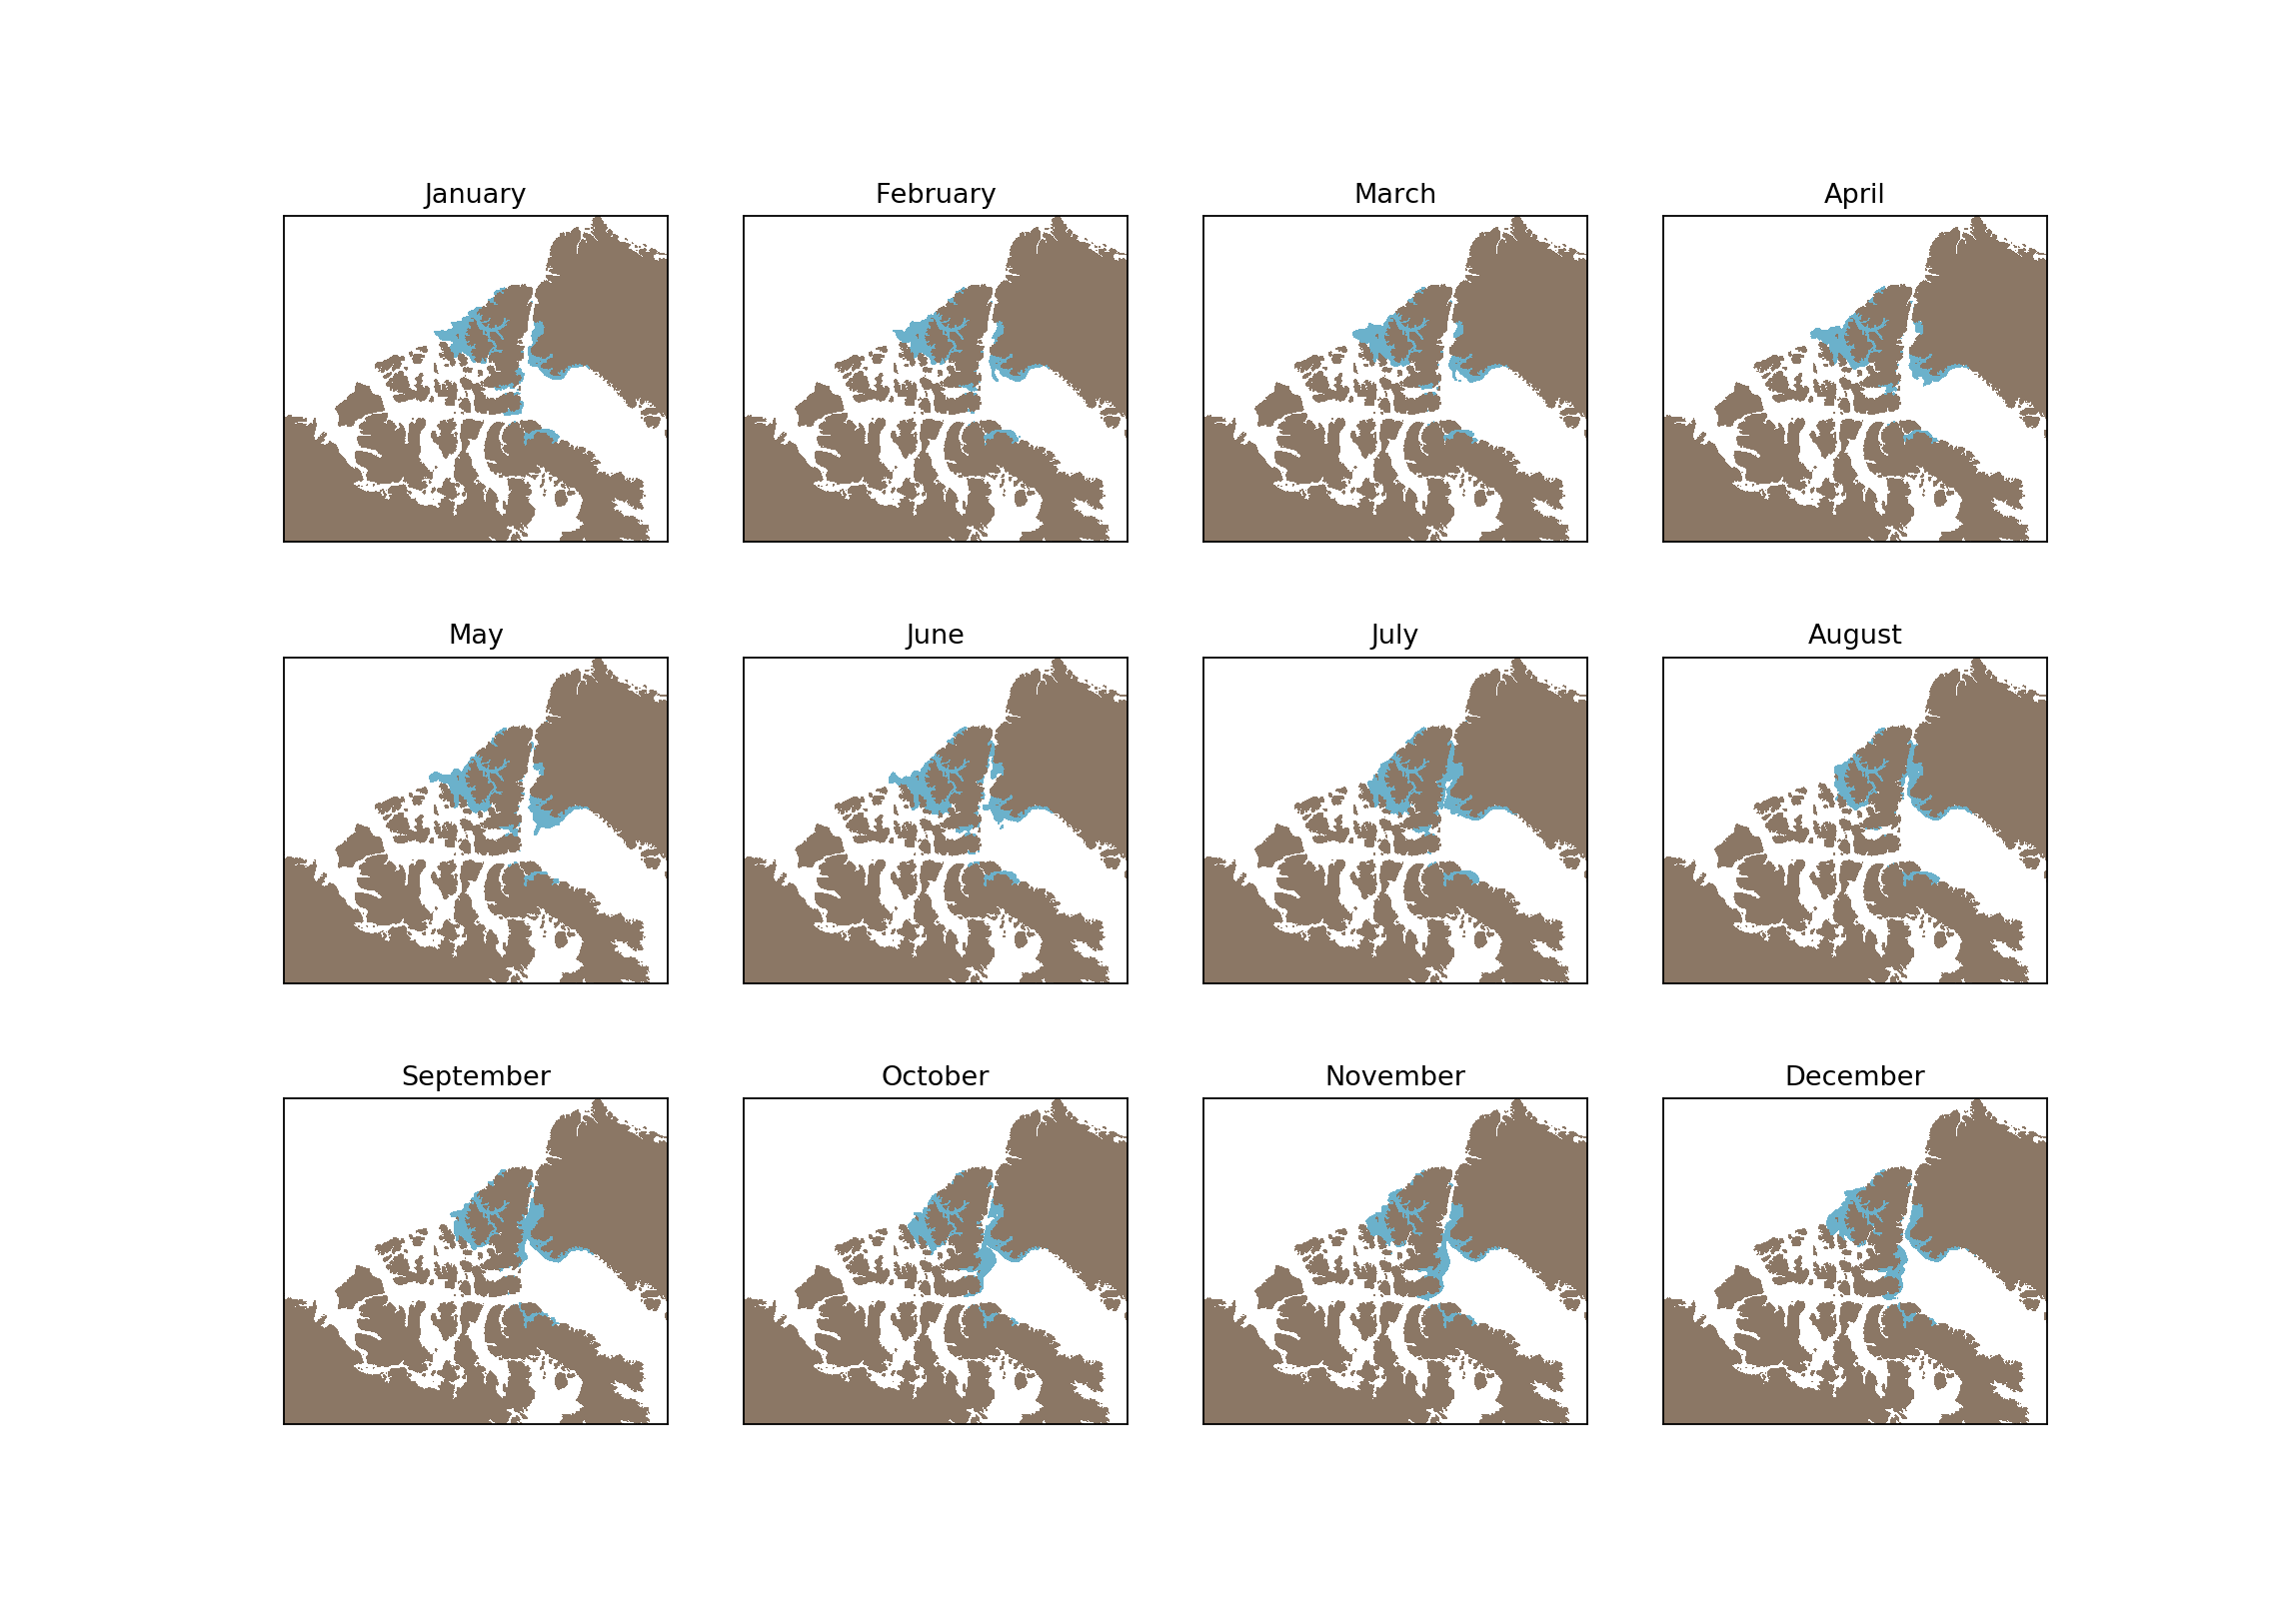

In [33]:
months_overview(RCD_glac_2008, [0.3, 1])

<IPython.core.display.Javascript object>


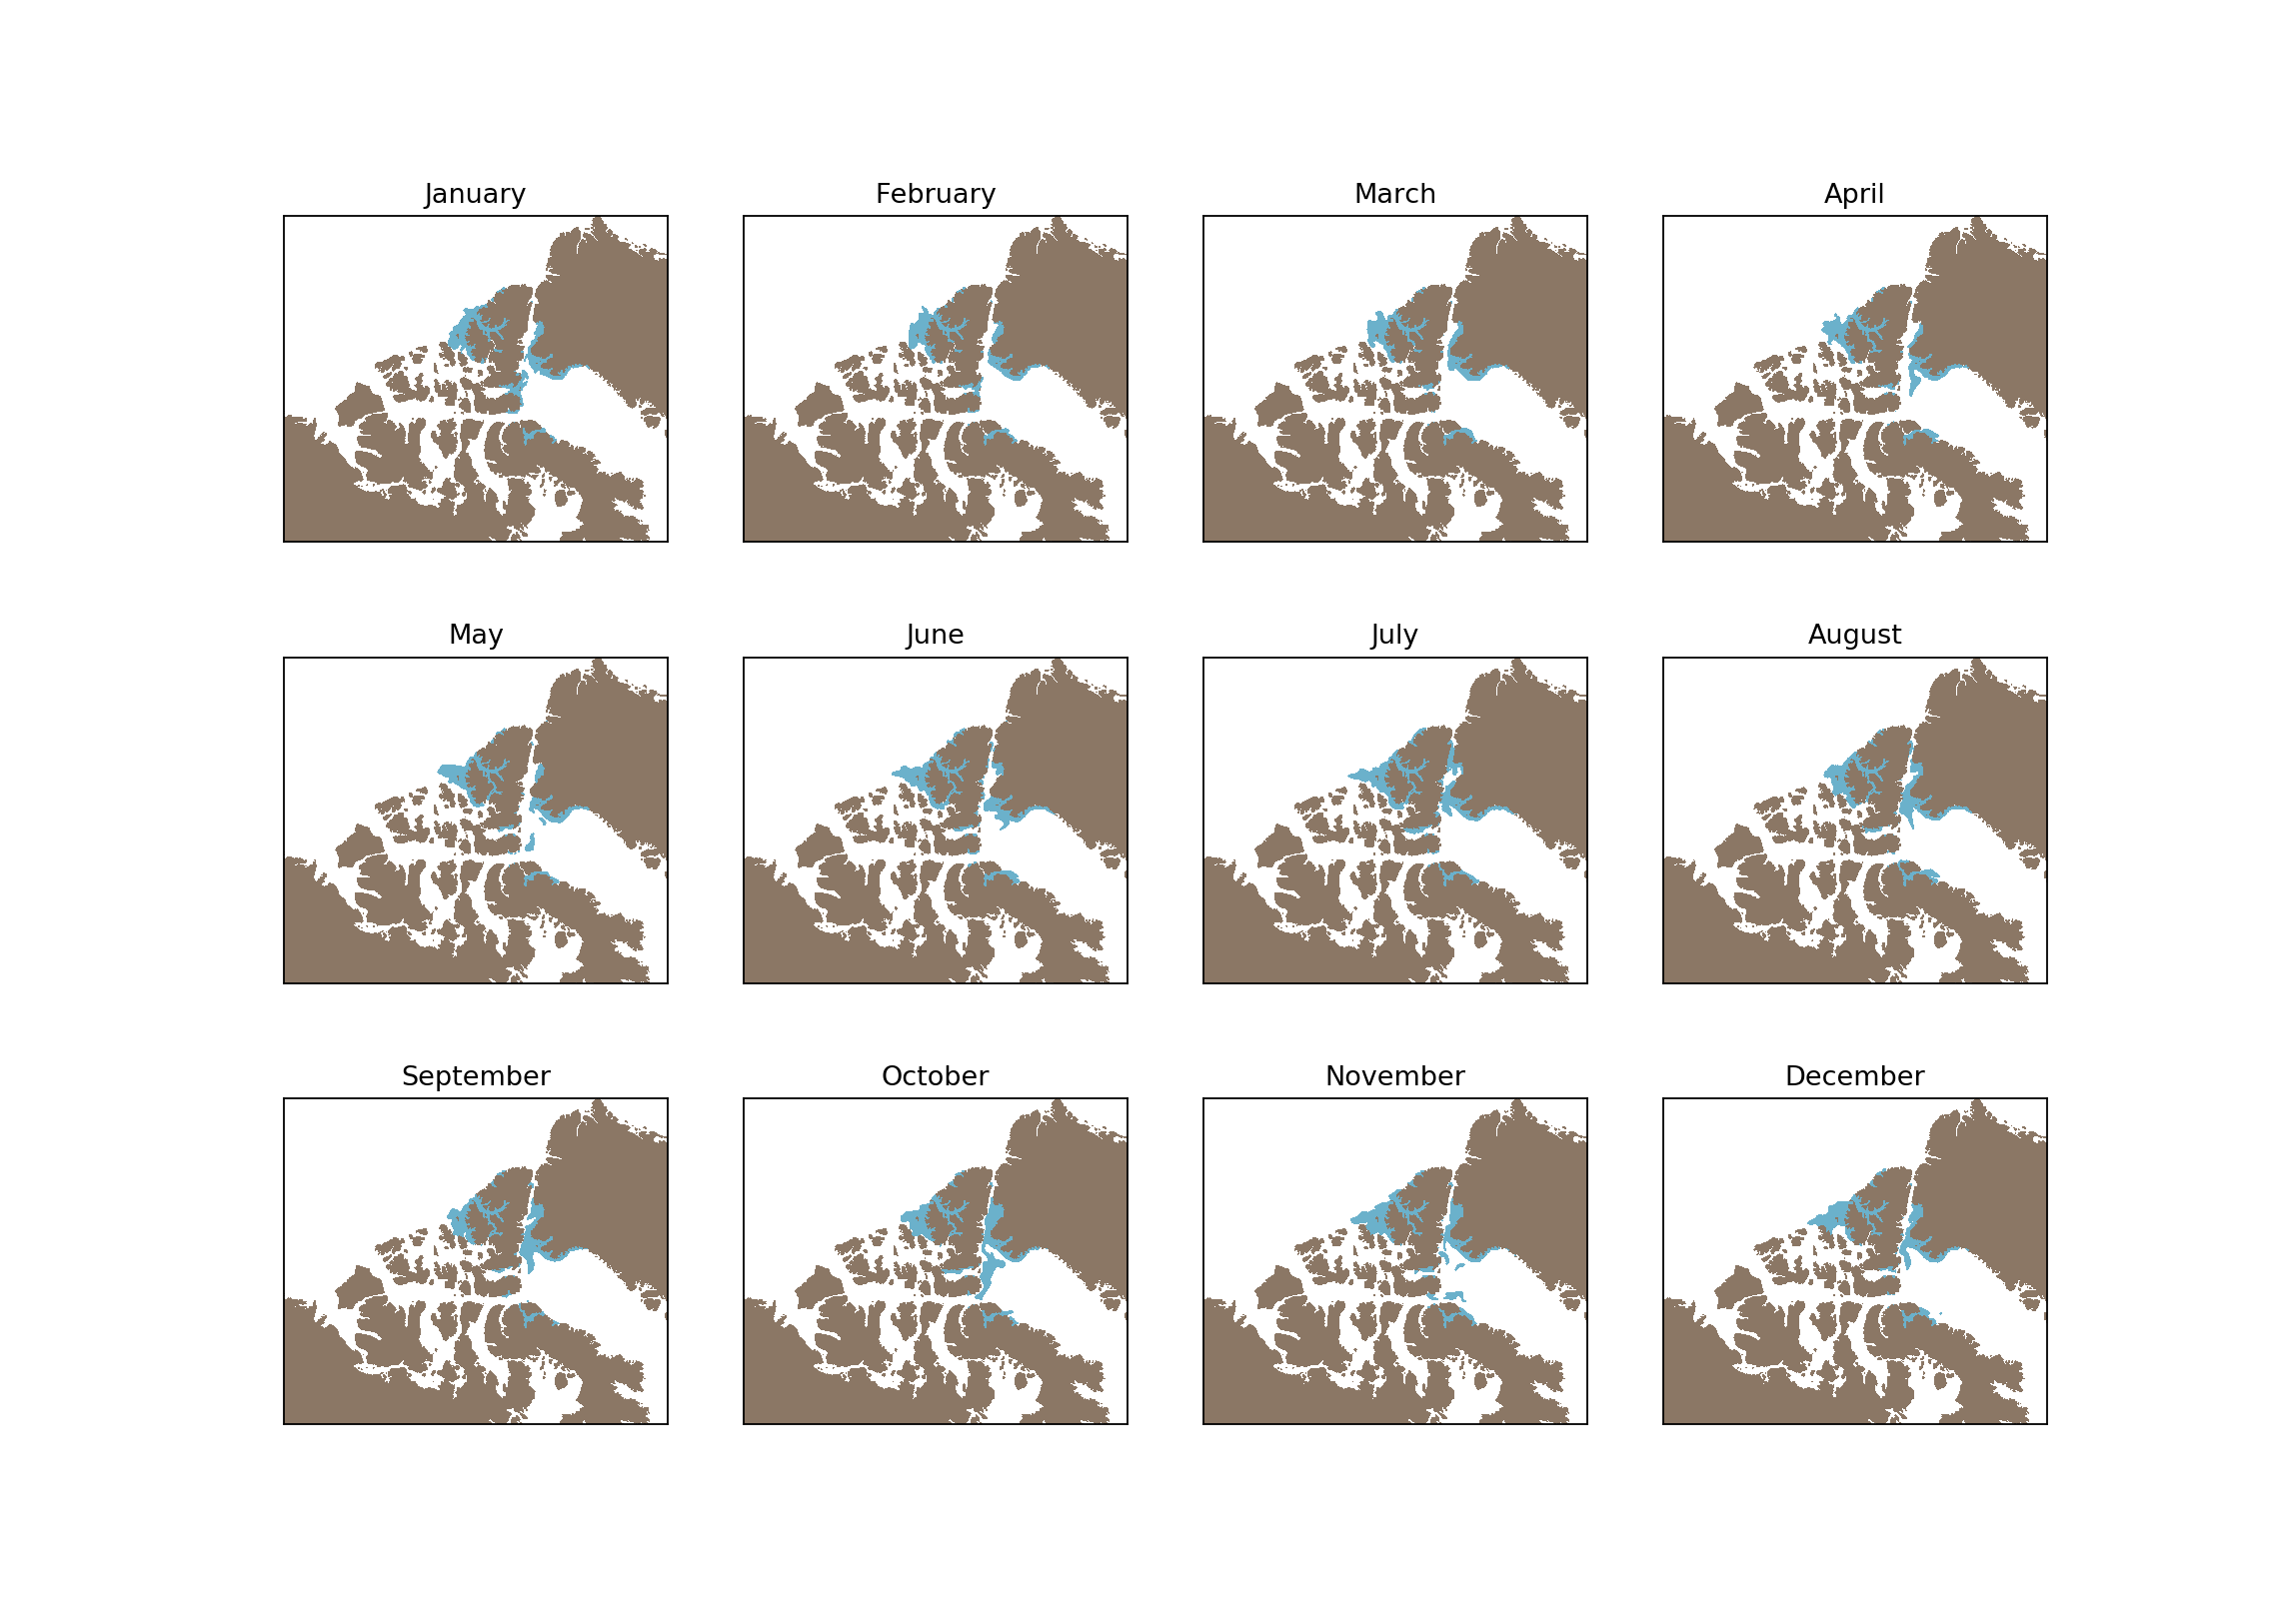

In [34]:
months_overview(RCD_glac_2009, [0.3, 1])

<IPython.core.display.Javascript object>


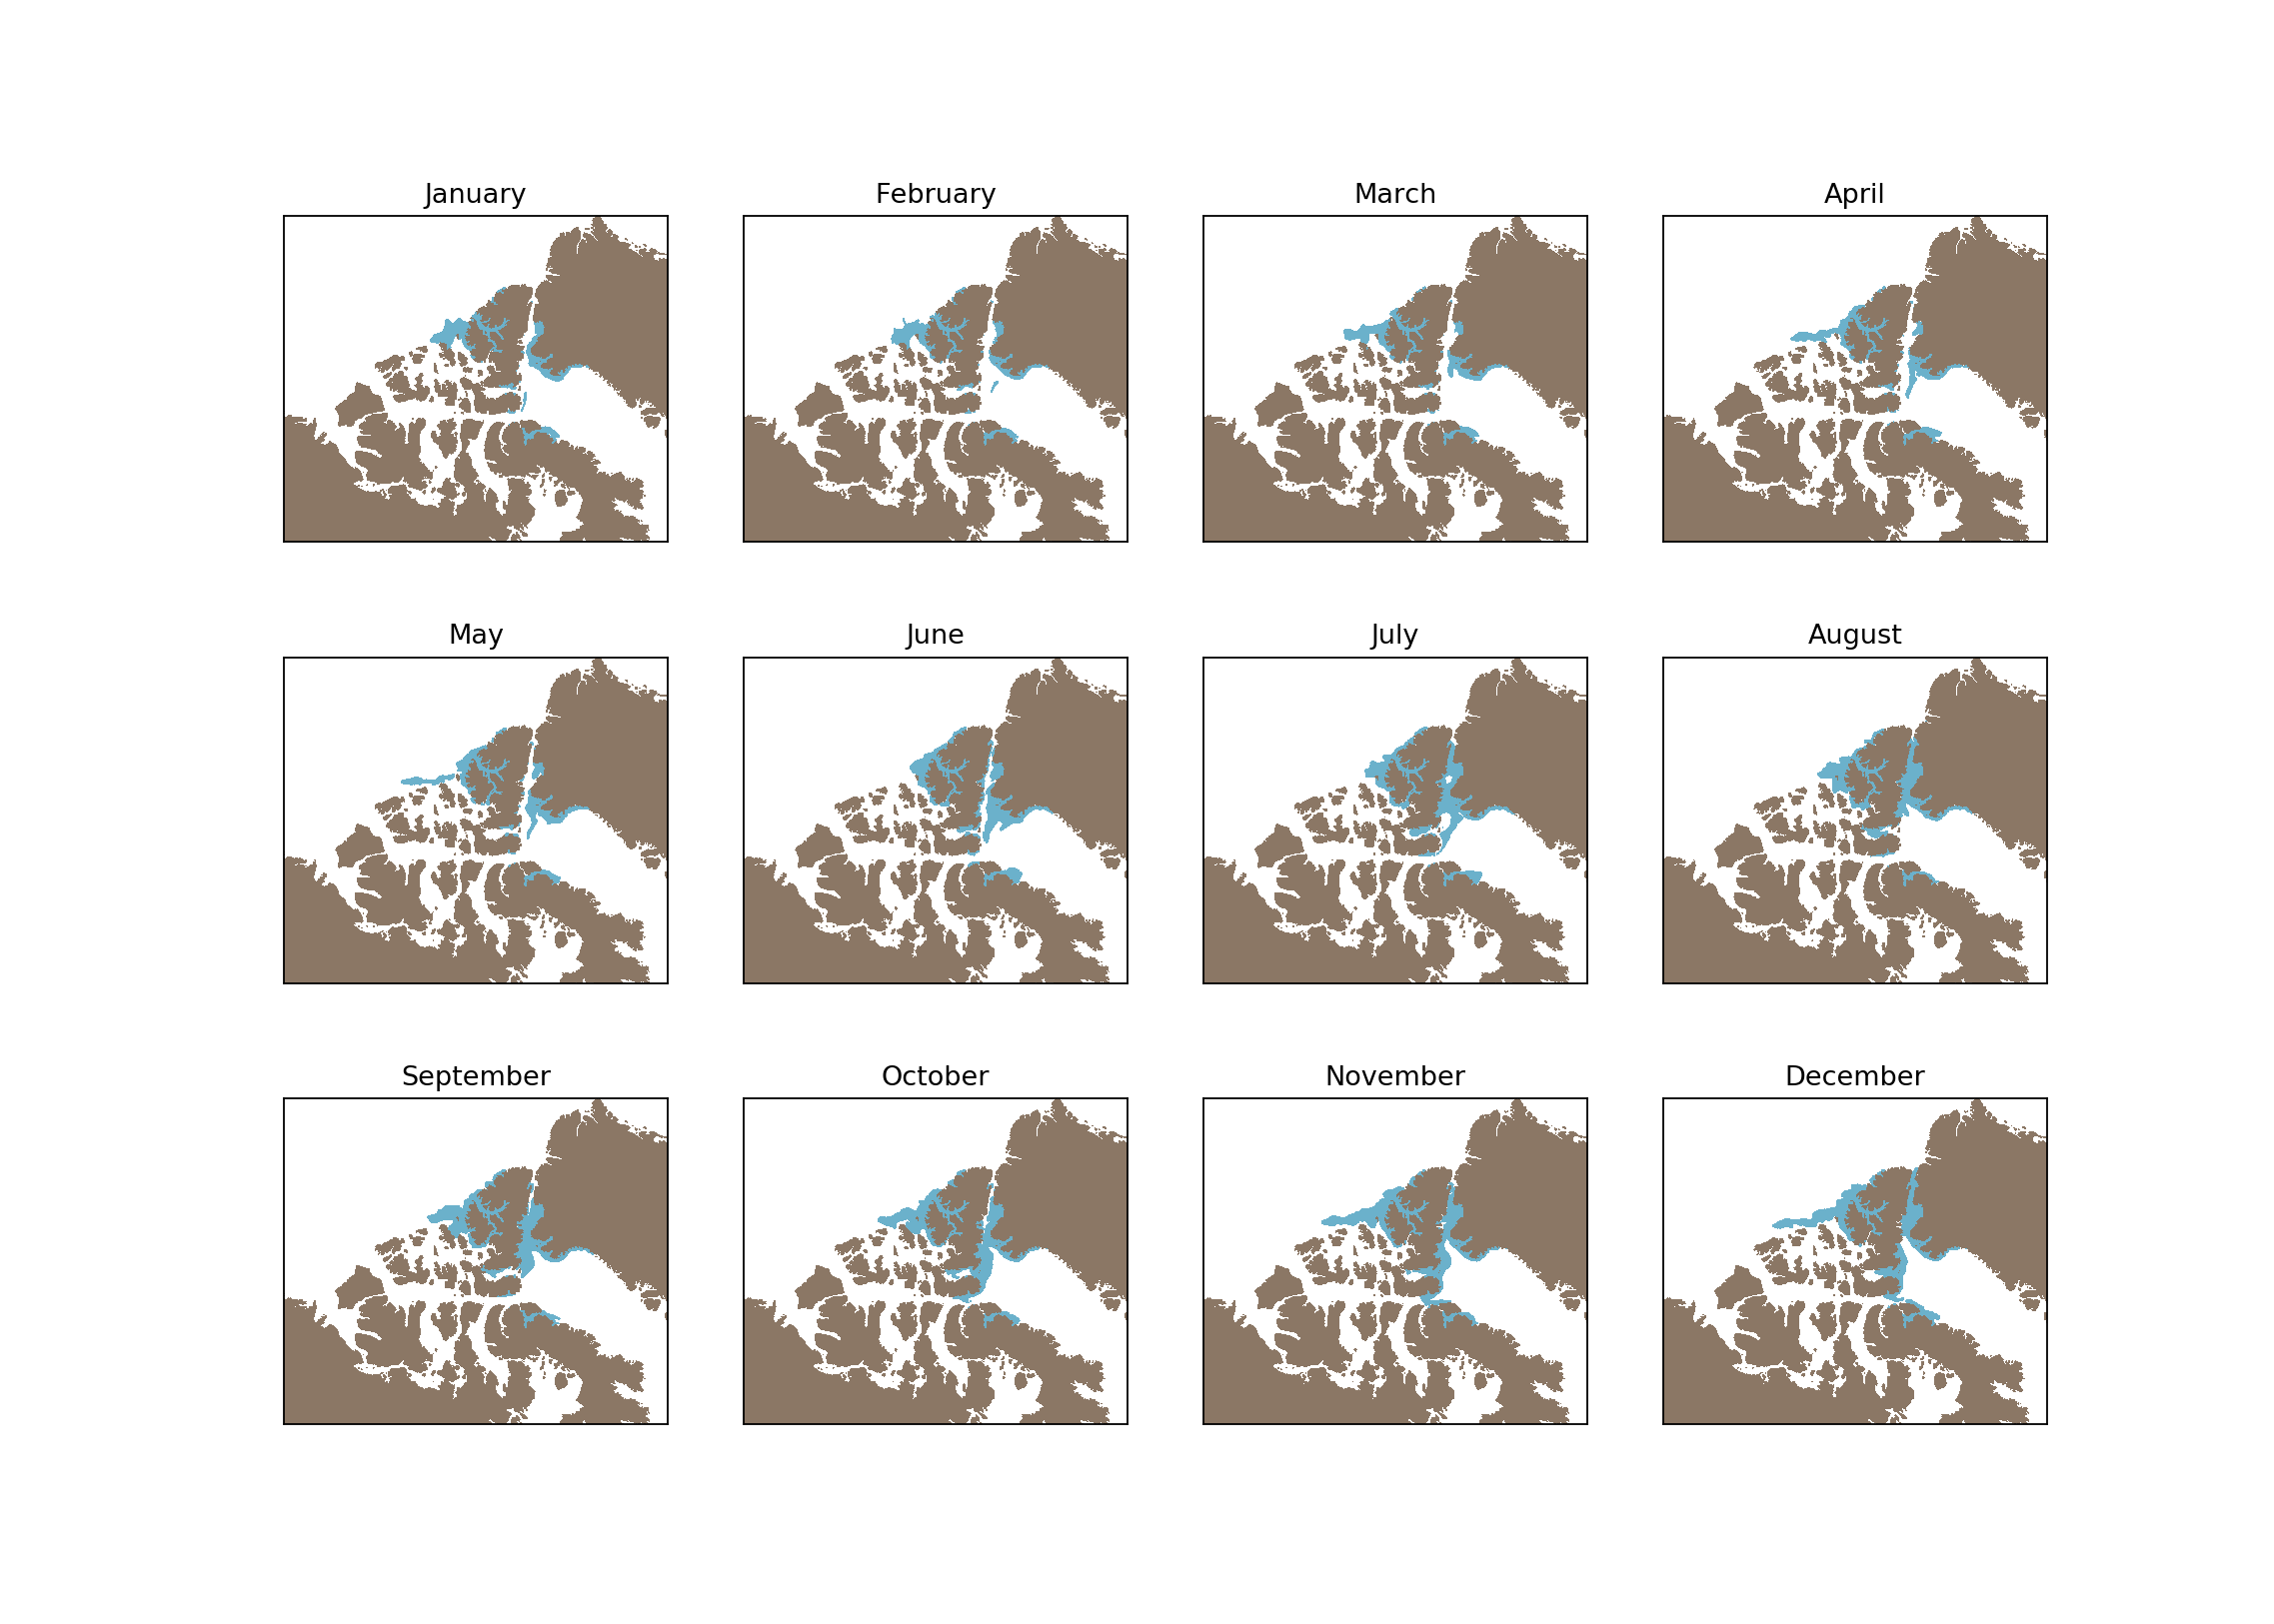

In [35]:
months_overview(RCD_glac_2010, [0.3, 1])

<IPython.core.display.Javascript object>


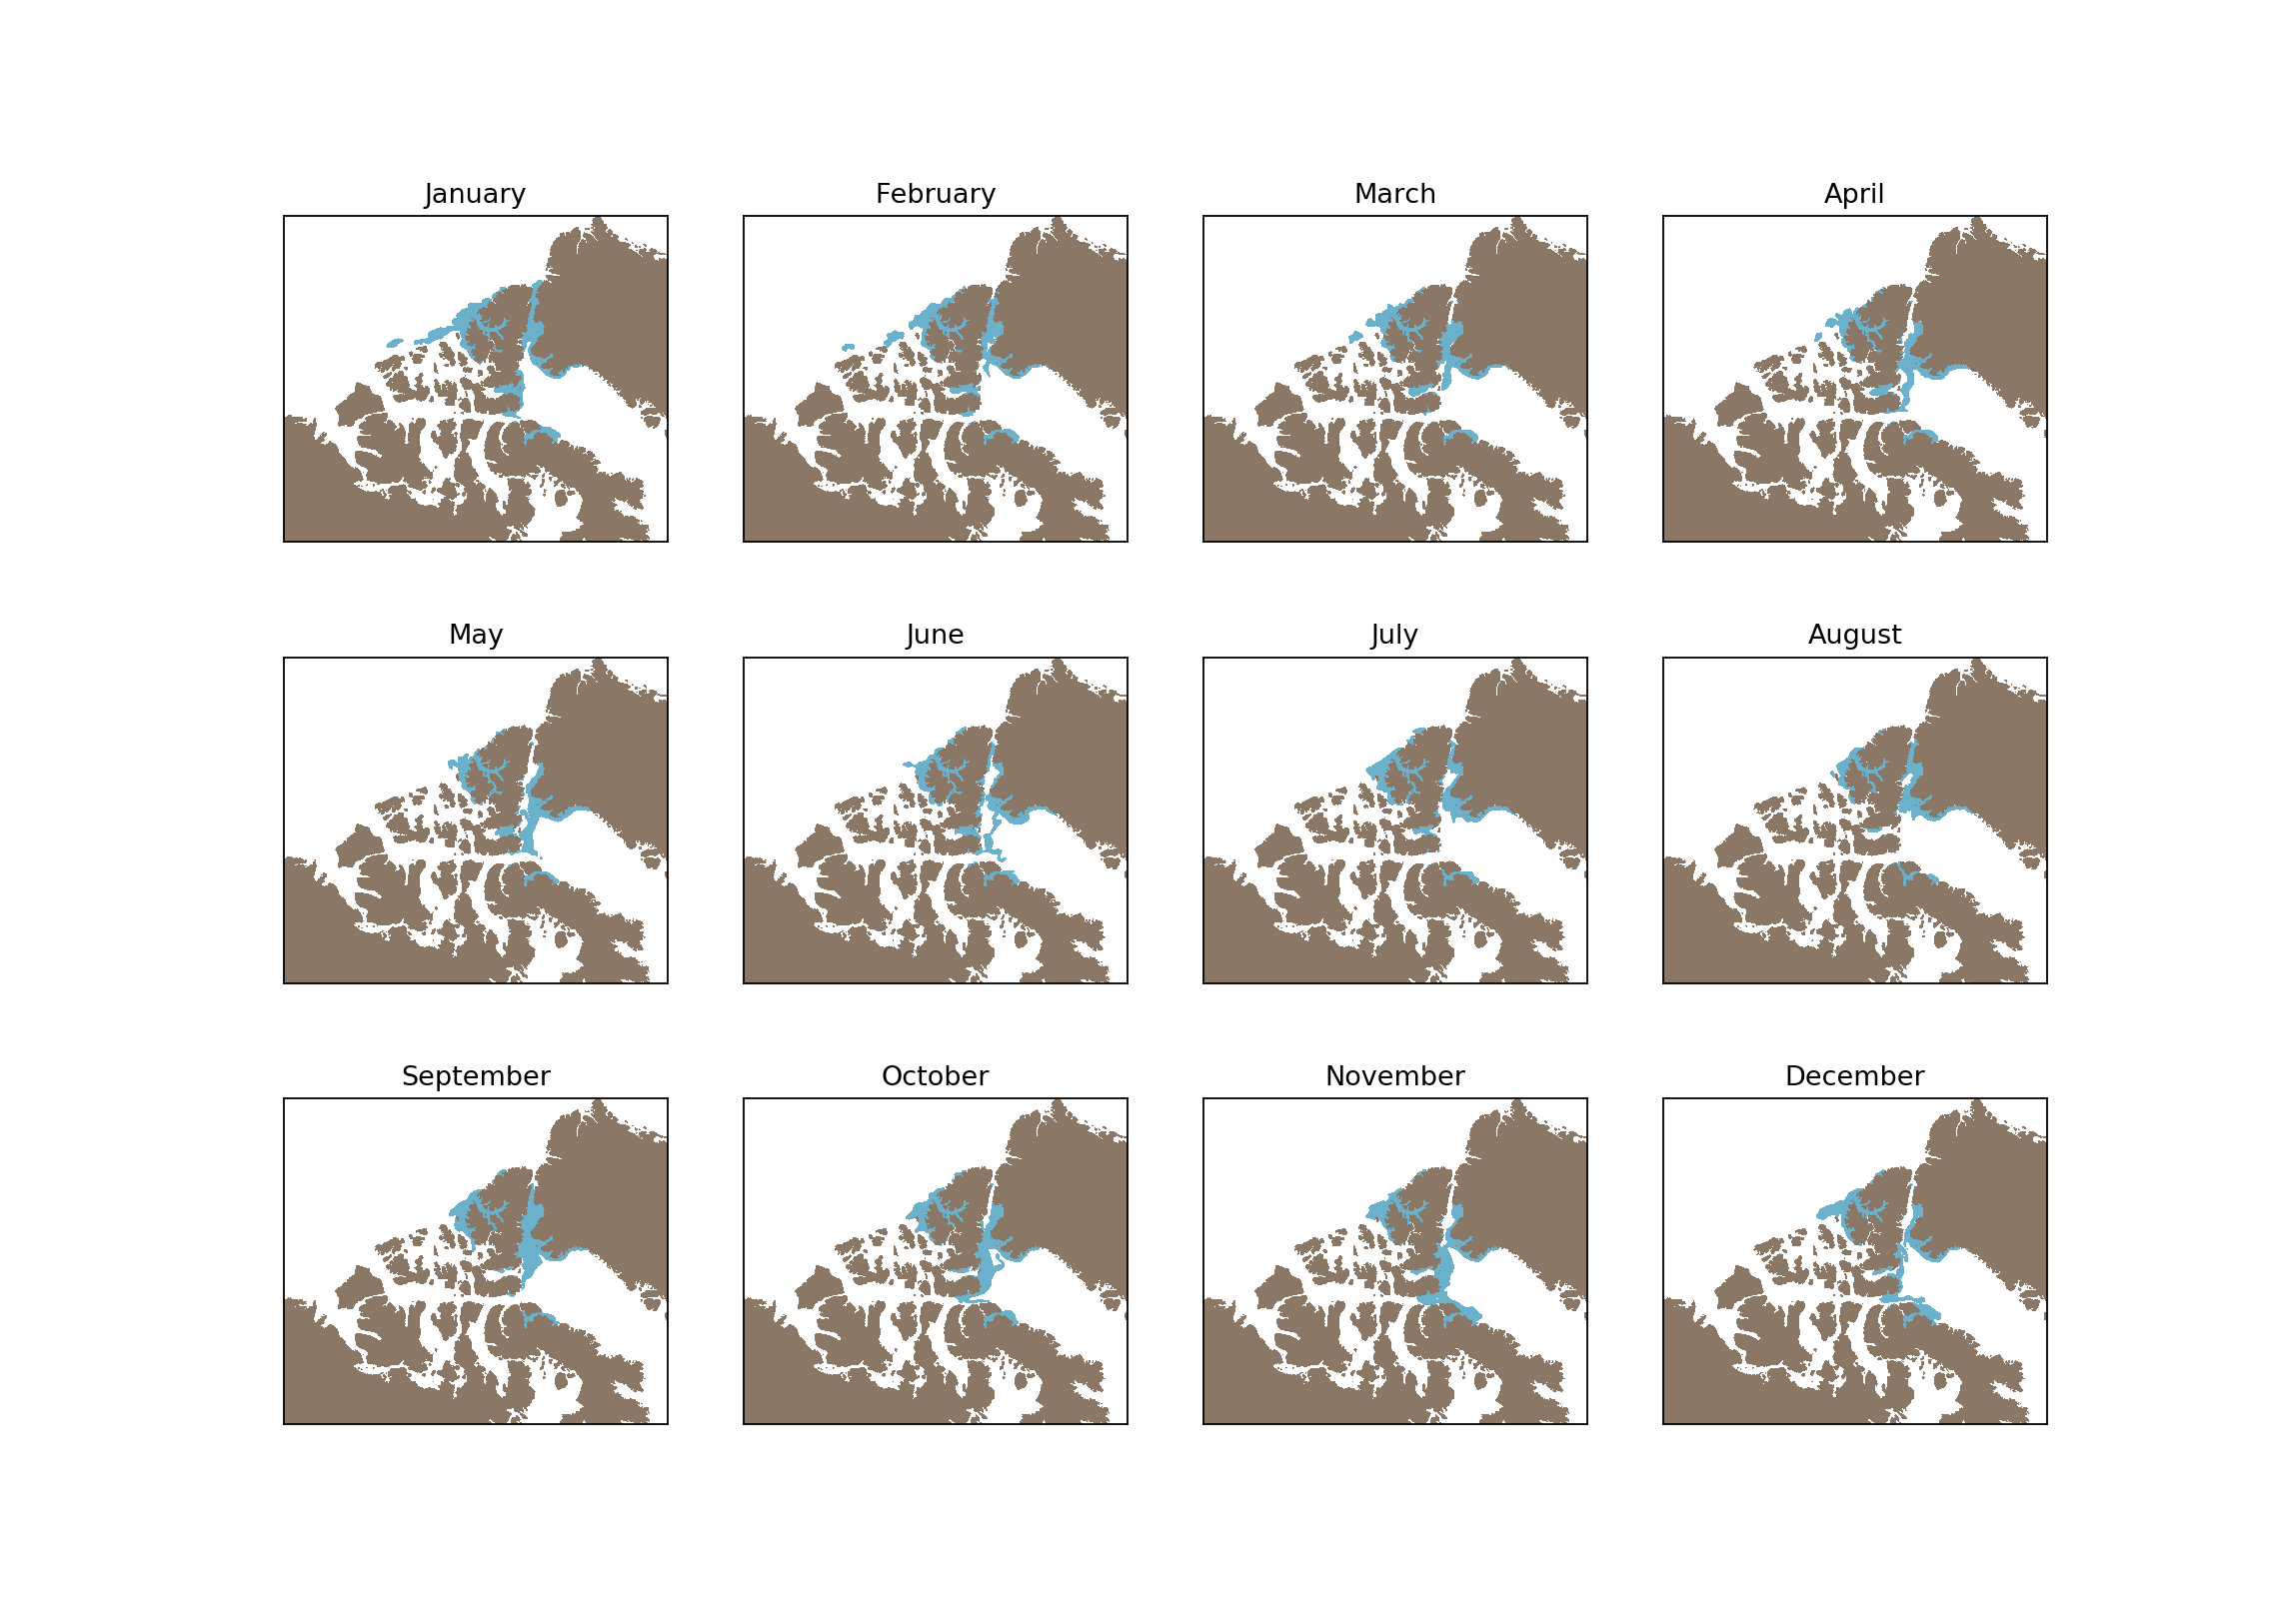

In [36]:
months_overview(RCD_glac_2011, [0.3, 1])

<IPython.core.display.Javascript object>


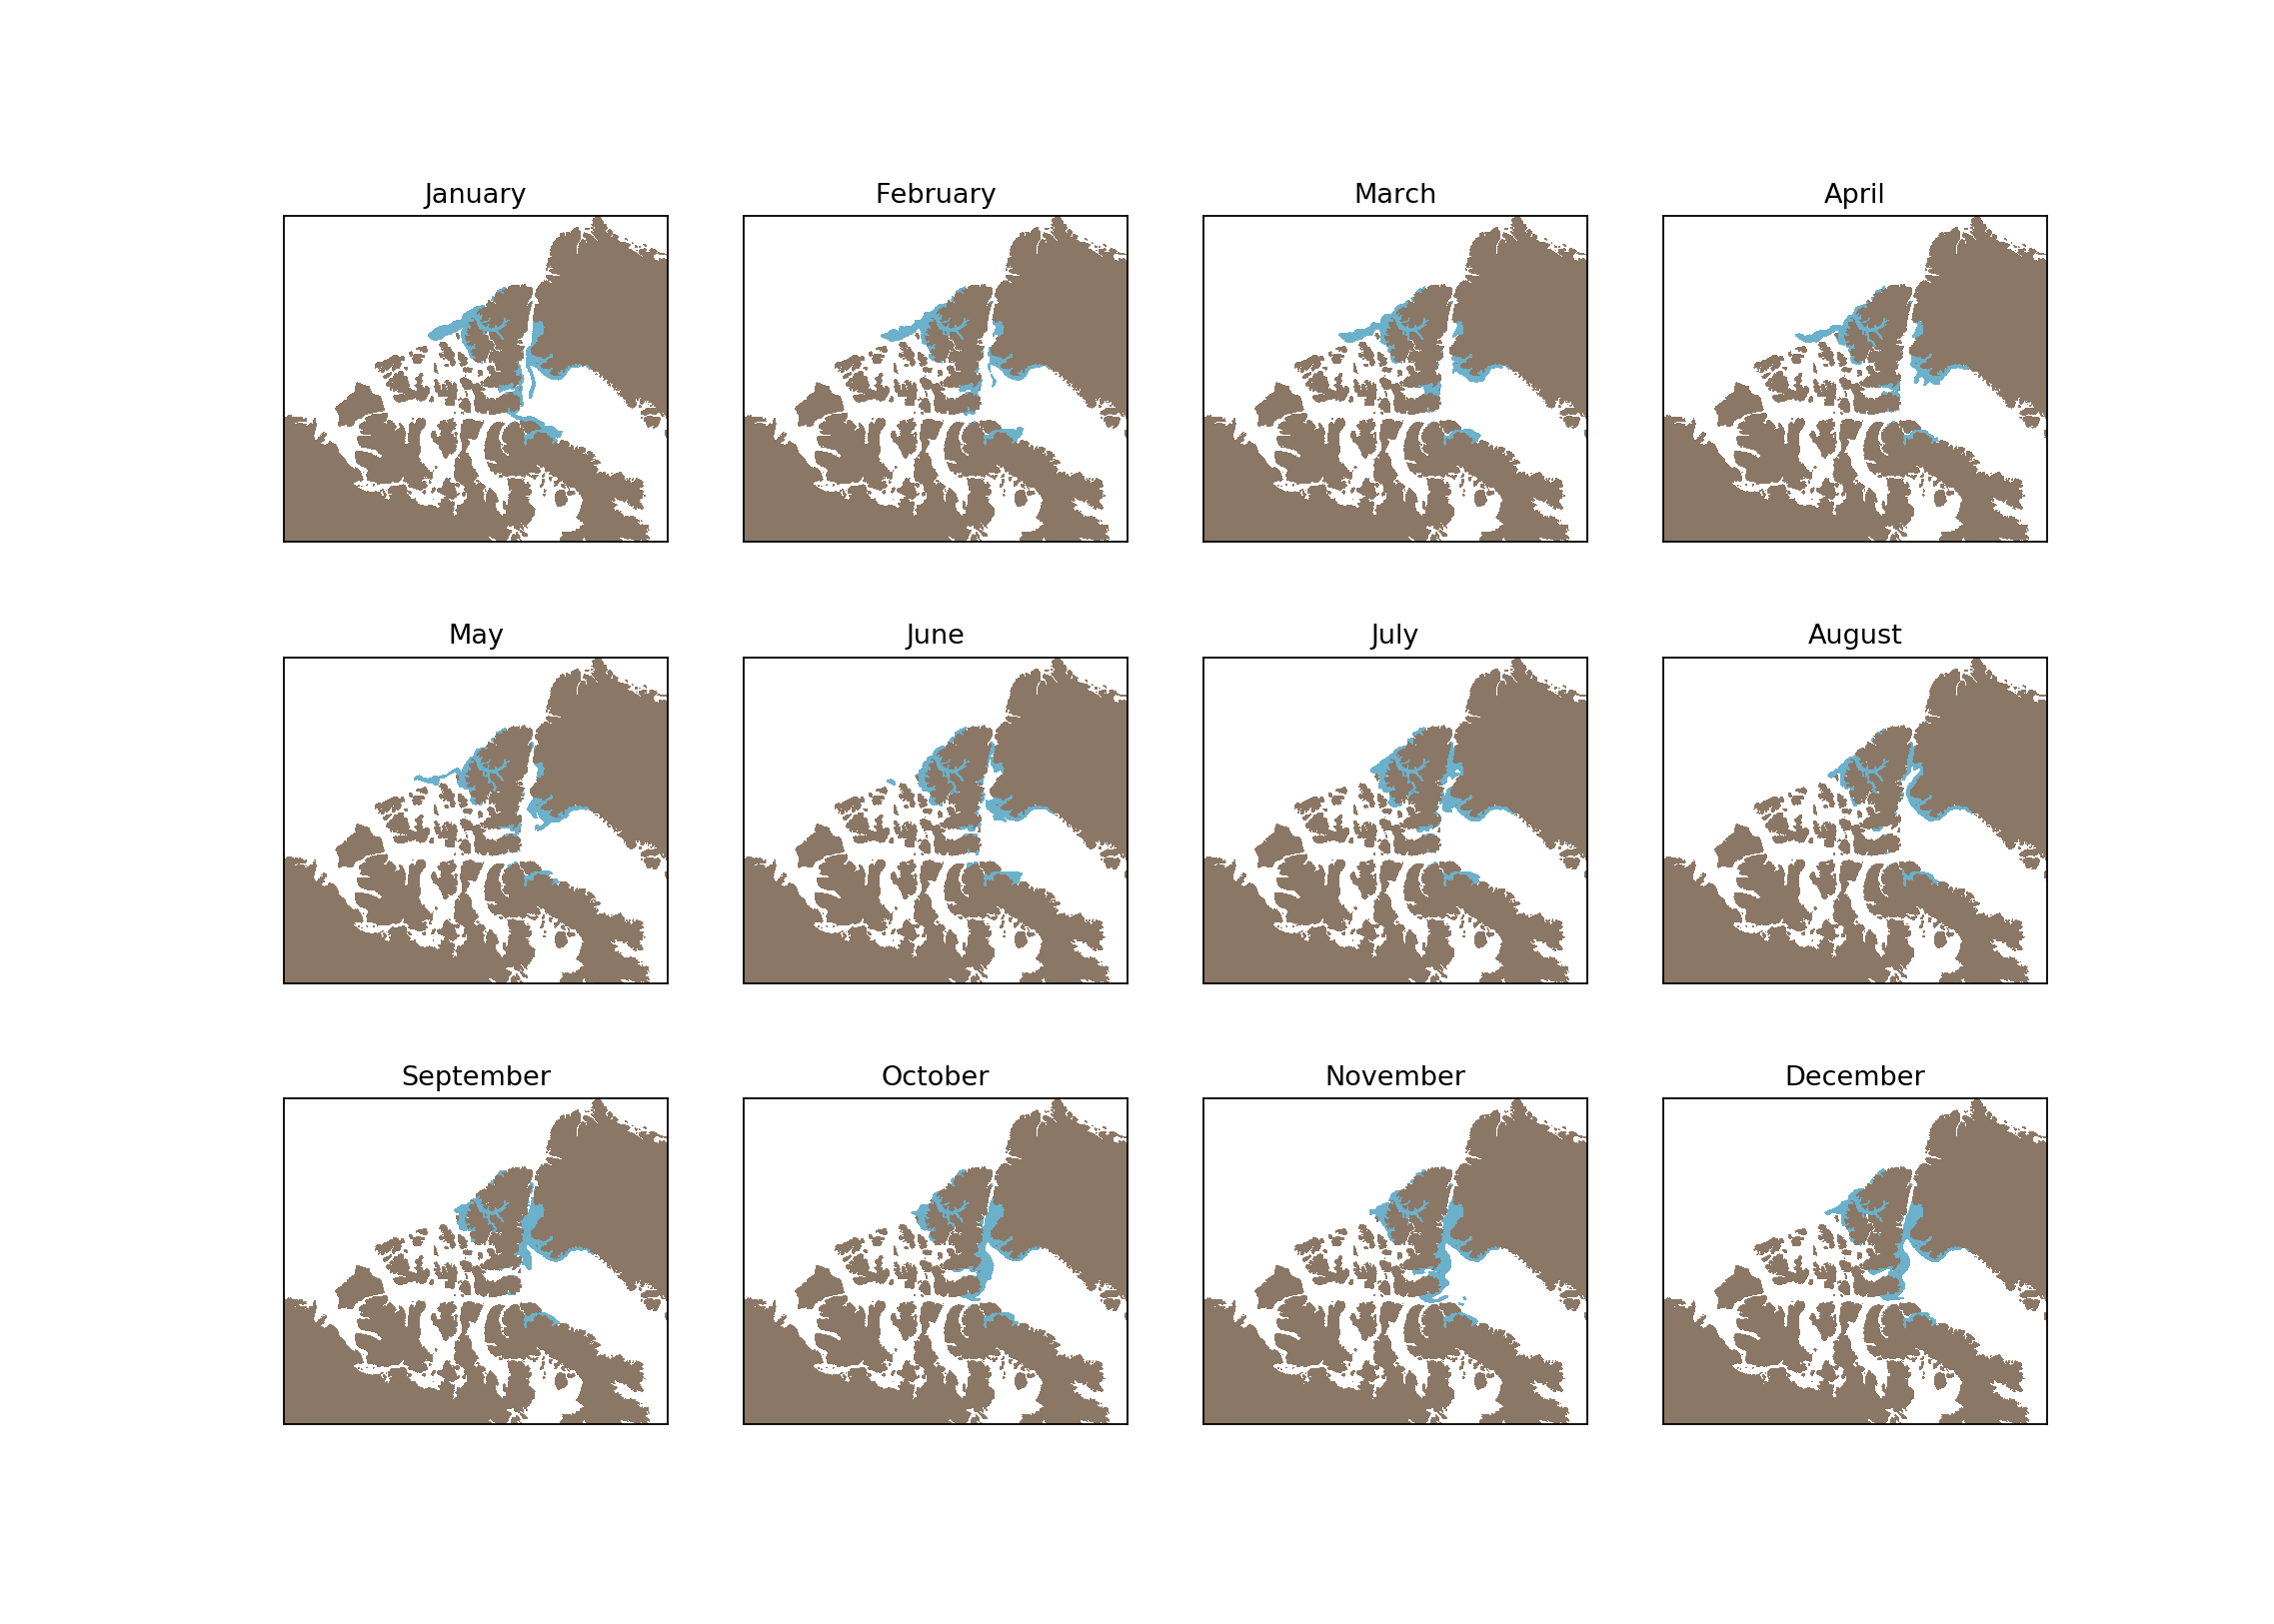

In [37]:
months_overview(RCD_glac_2012, [0.3, 1])

<IPython.core.display.Javascript object>


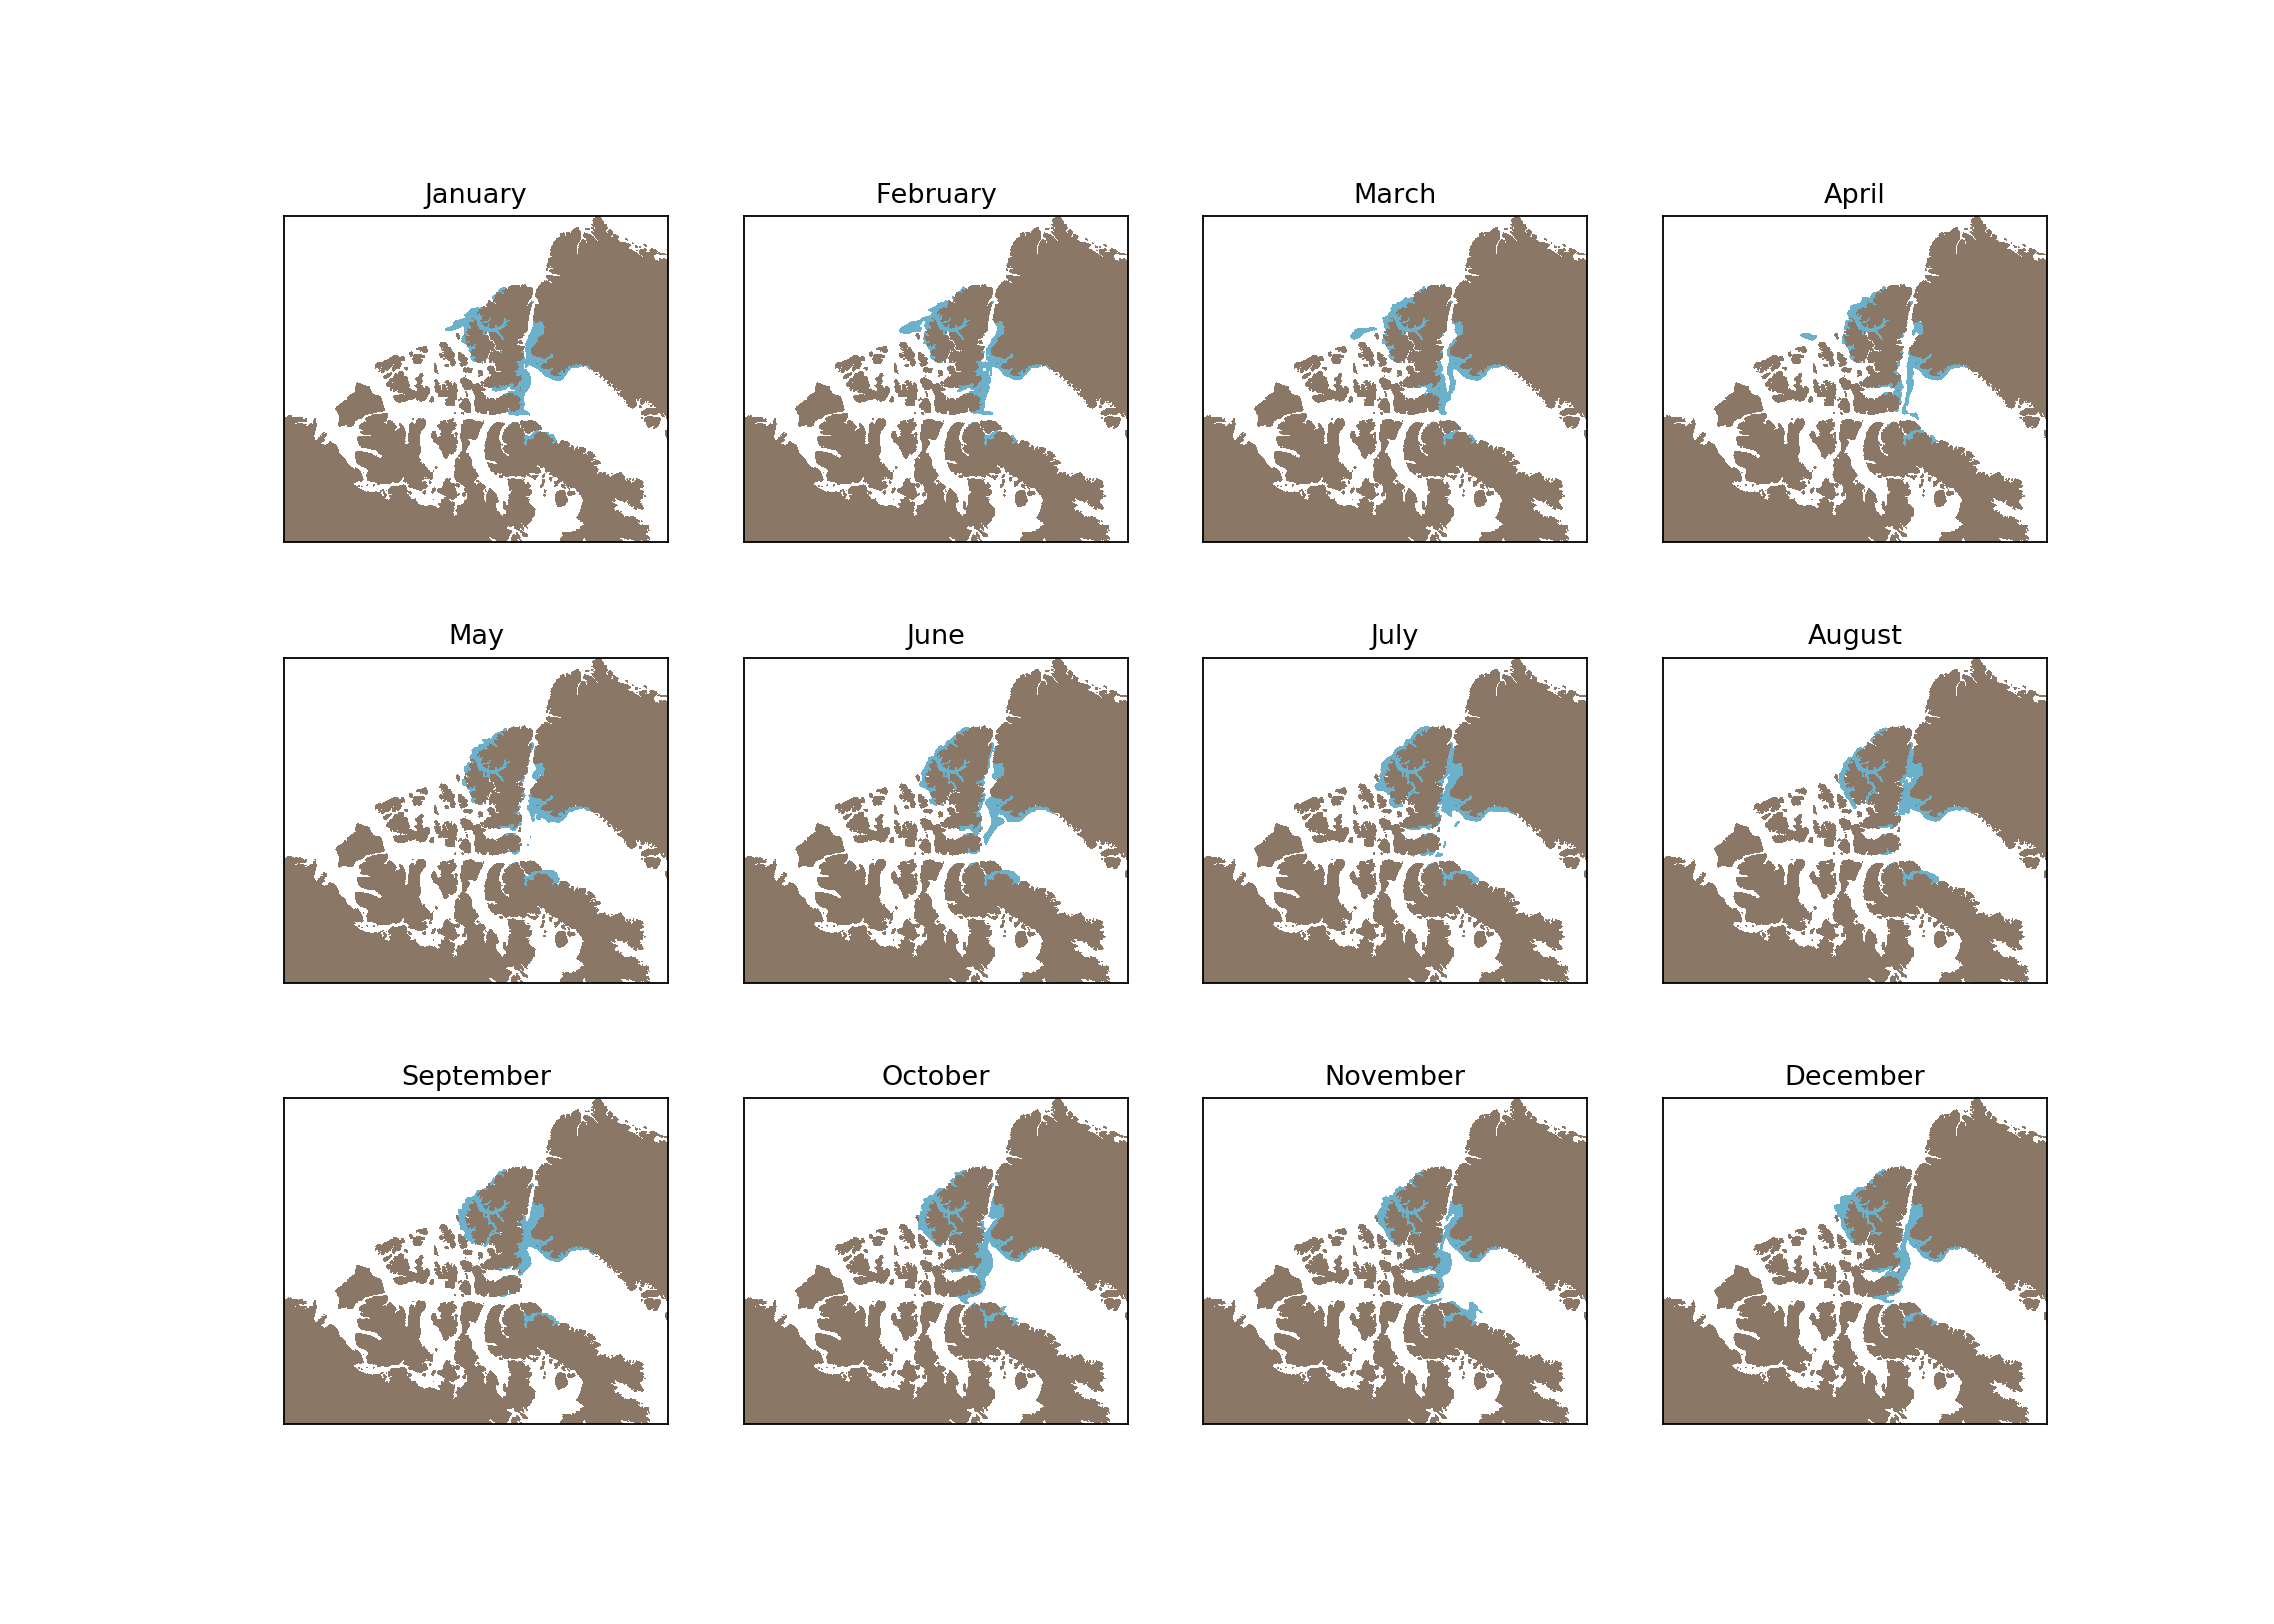

In [39]:
months_overview(RCD_glac_2013, [0.3, 1])

<IPython.core.display.Javascript object>


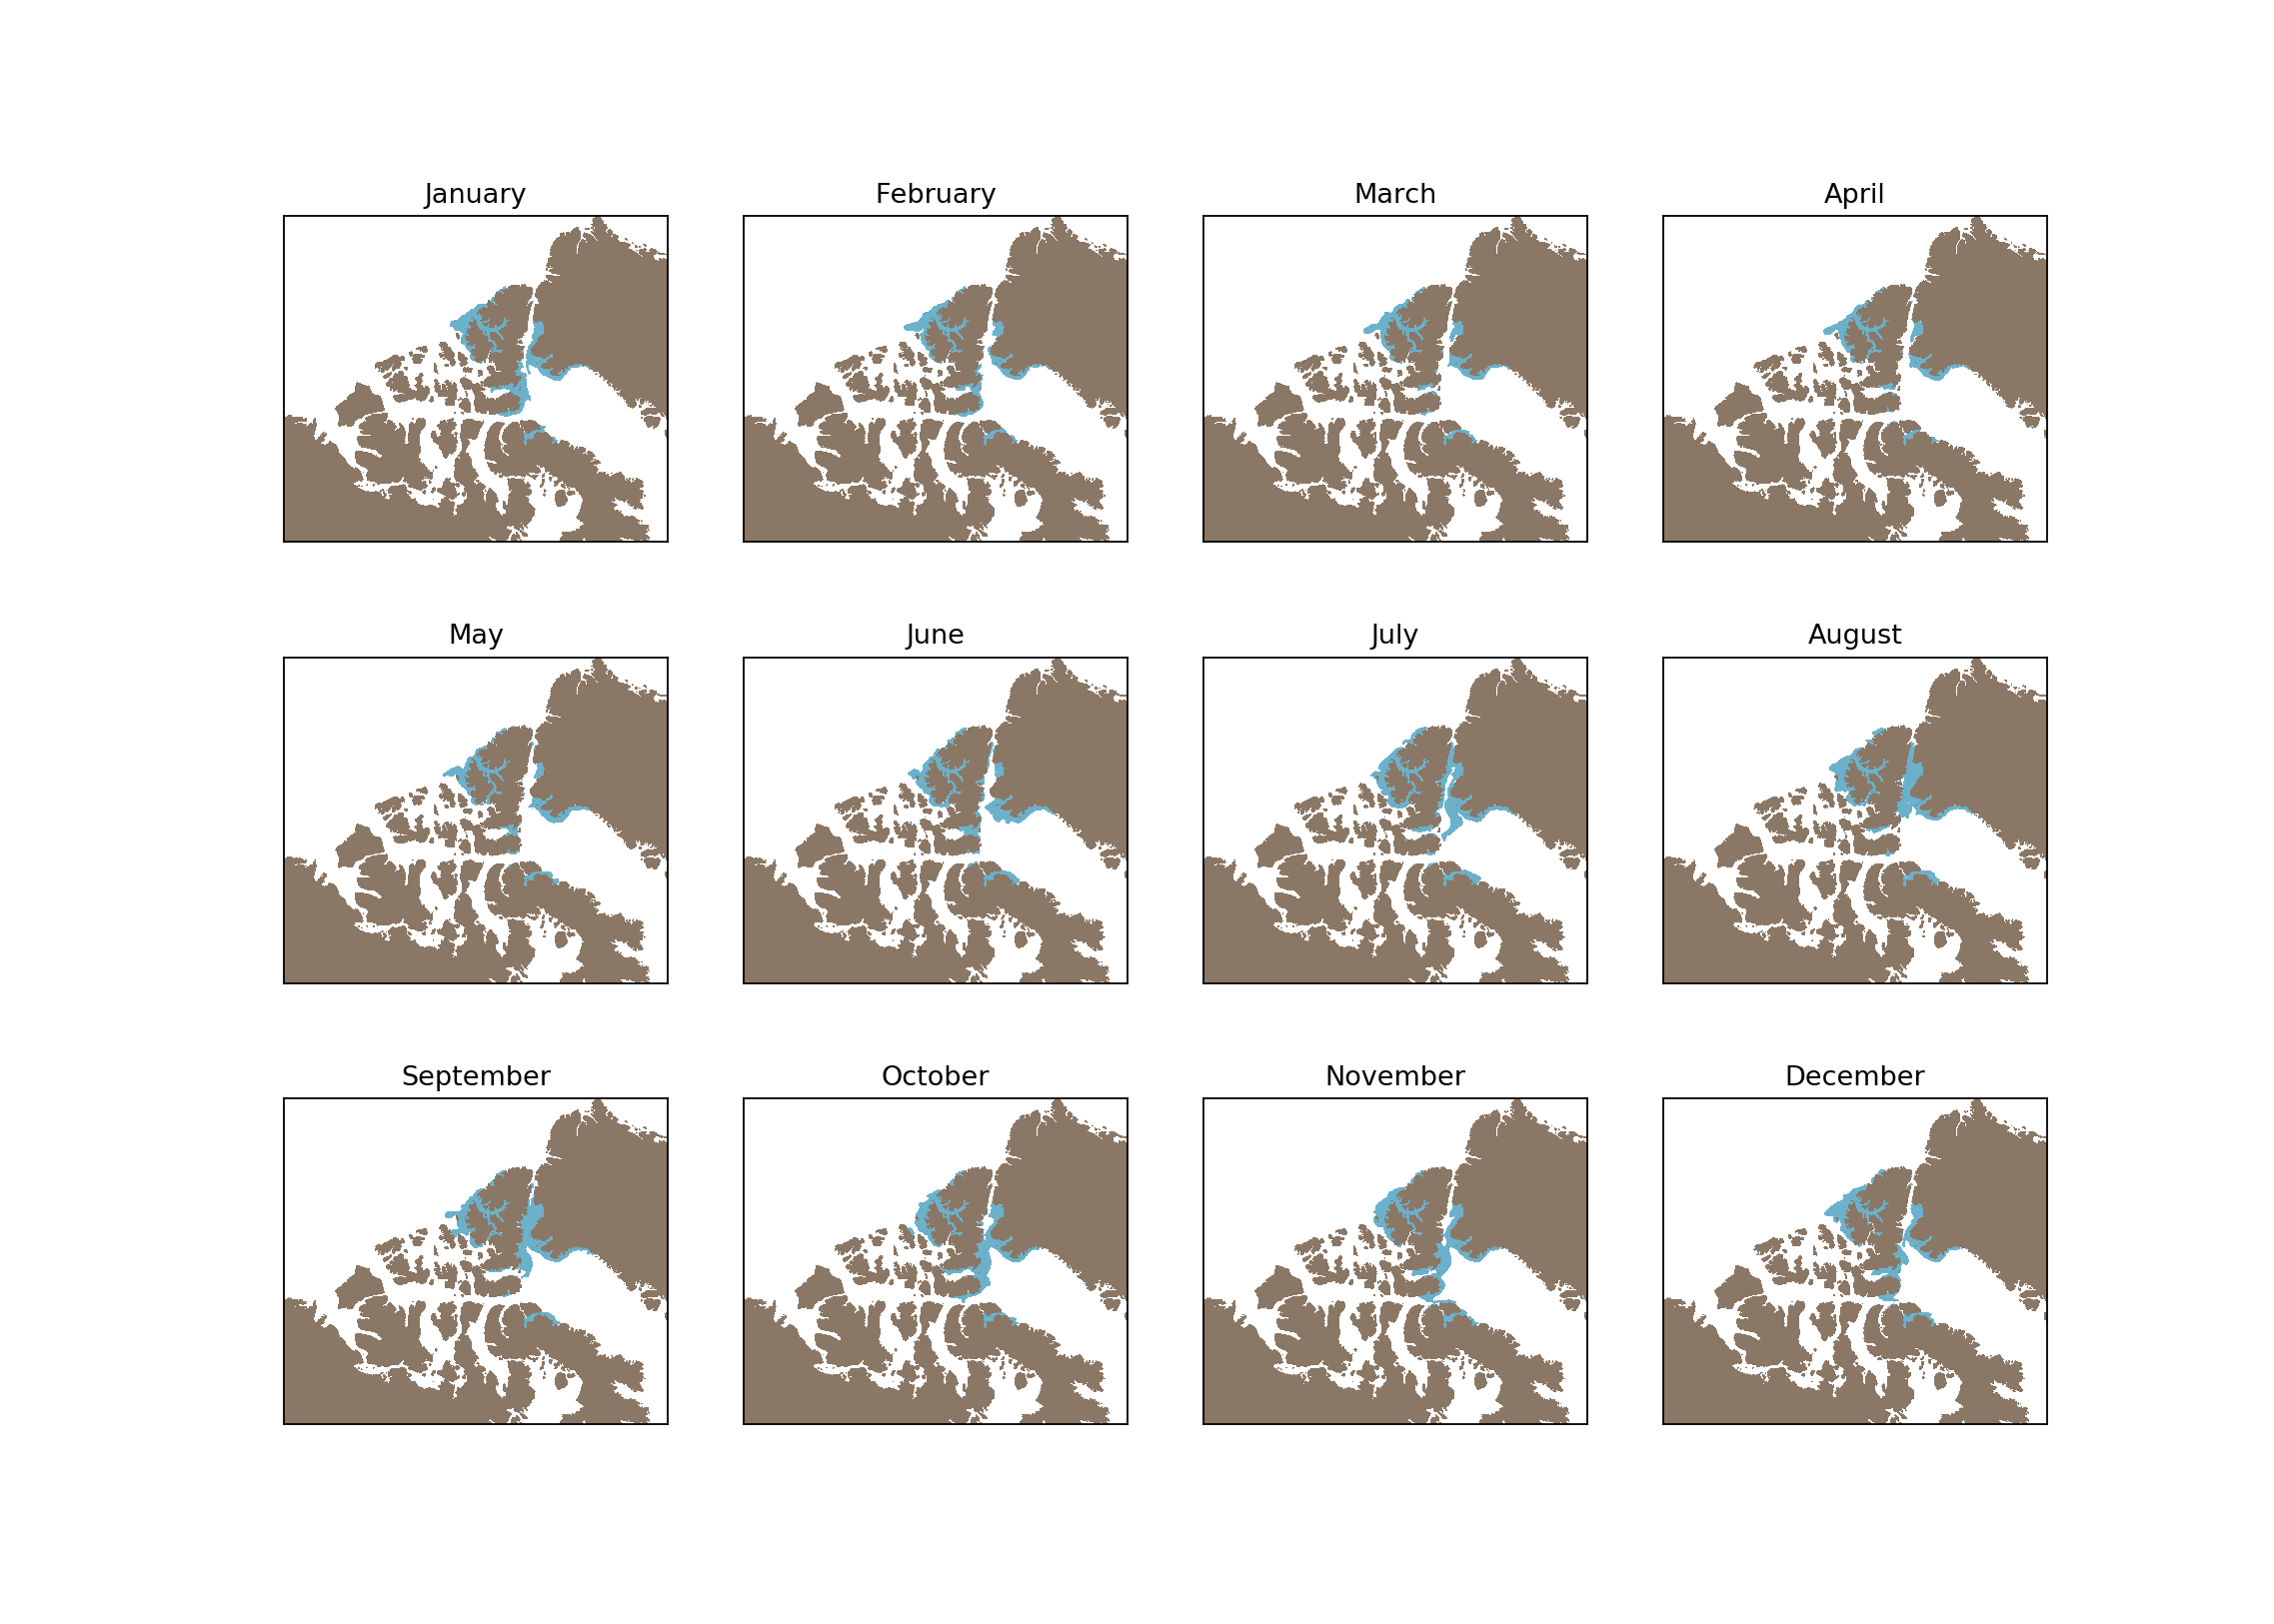

In [41]:
months_overview(RCD_glac_2014, [0.3, 1])

<IPython.core.display.Javascript object>


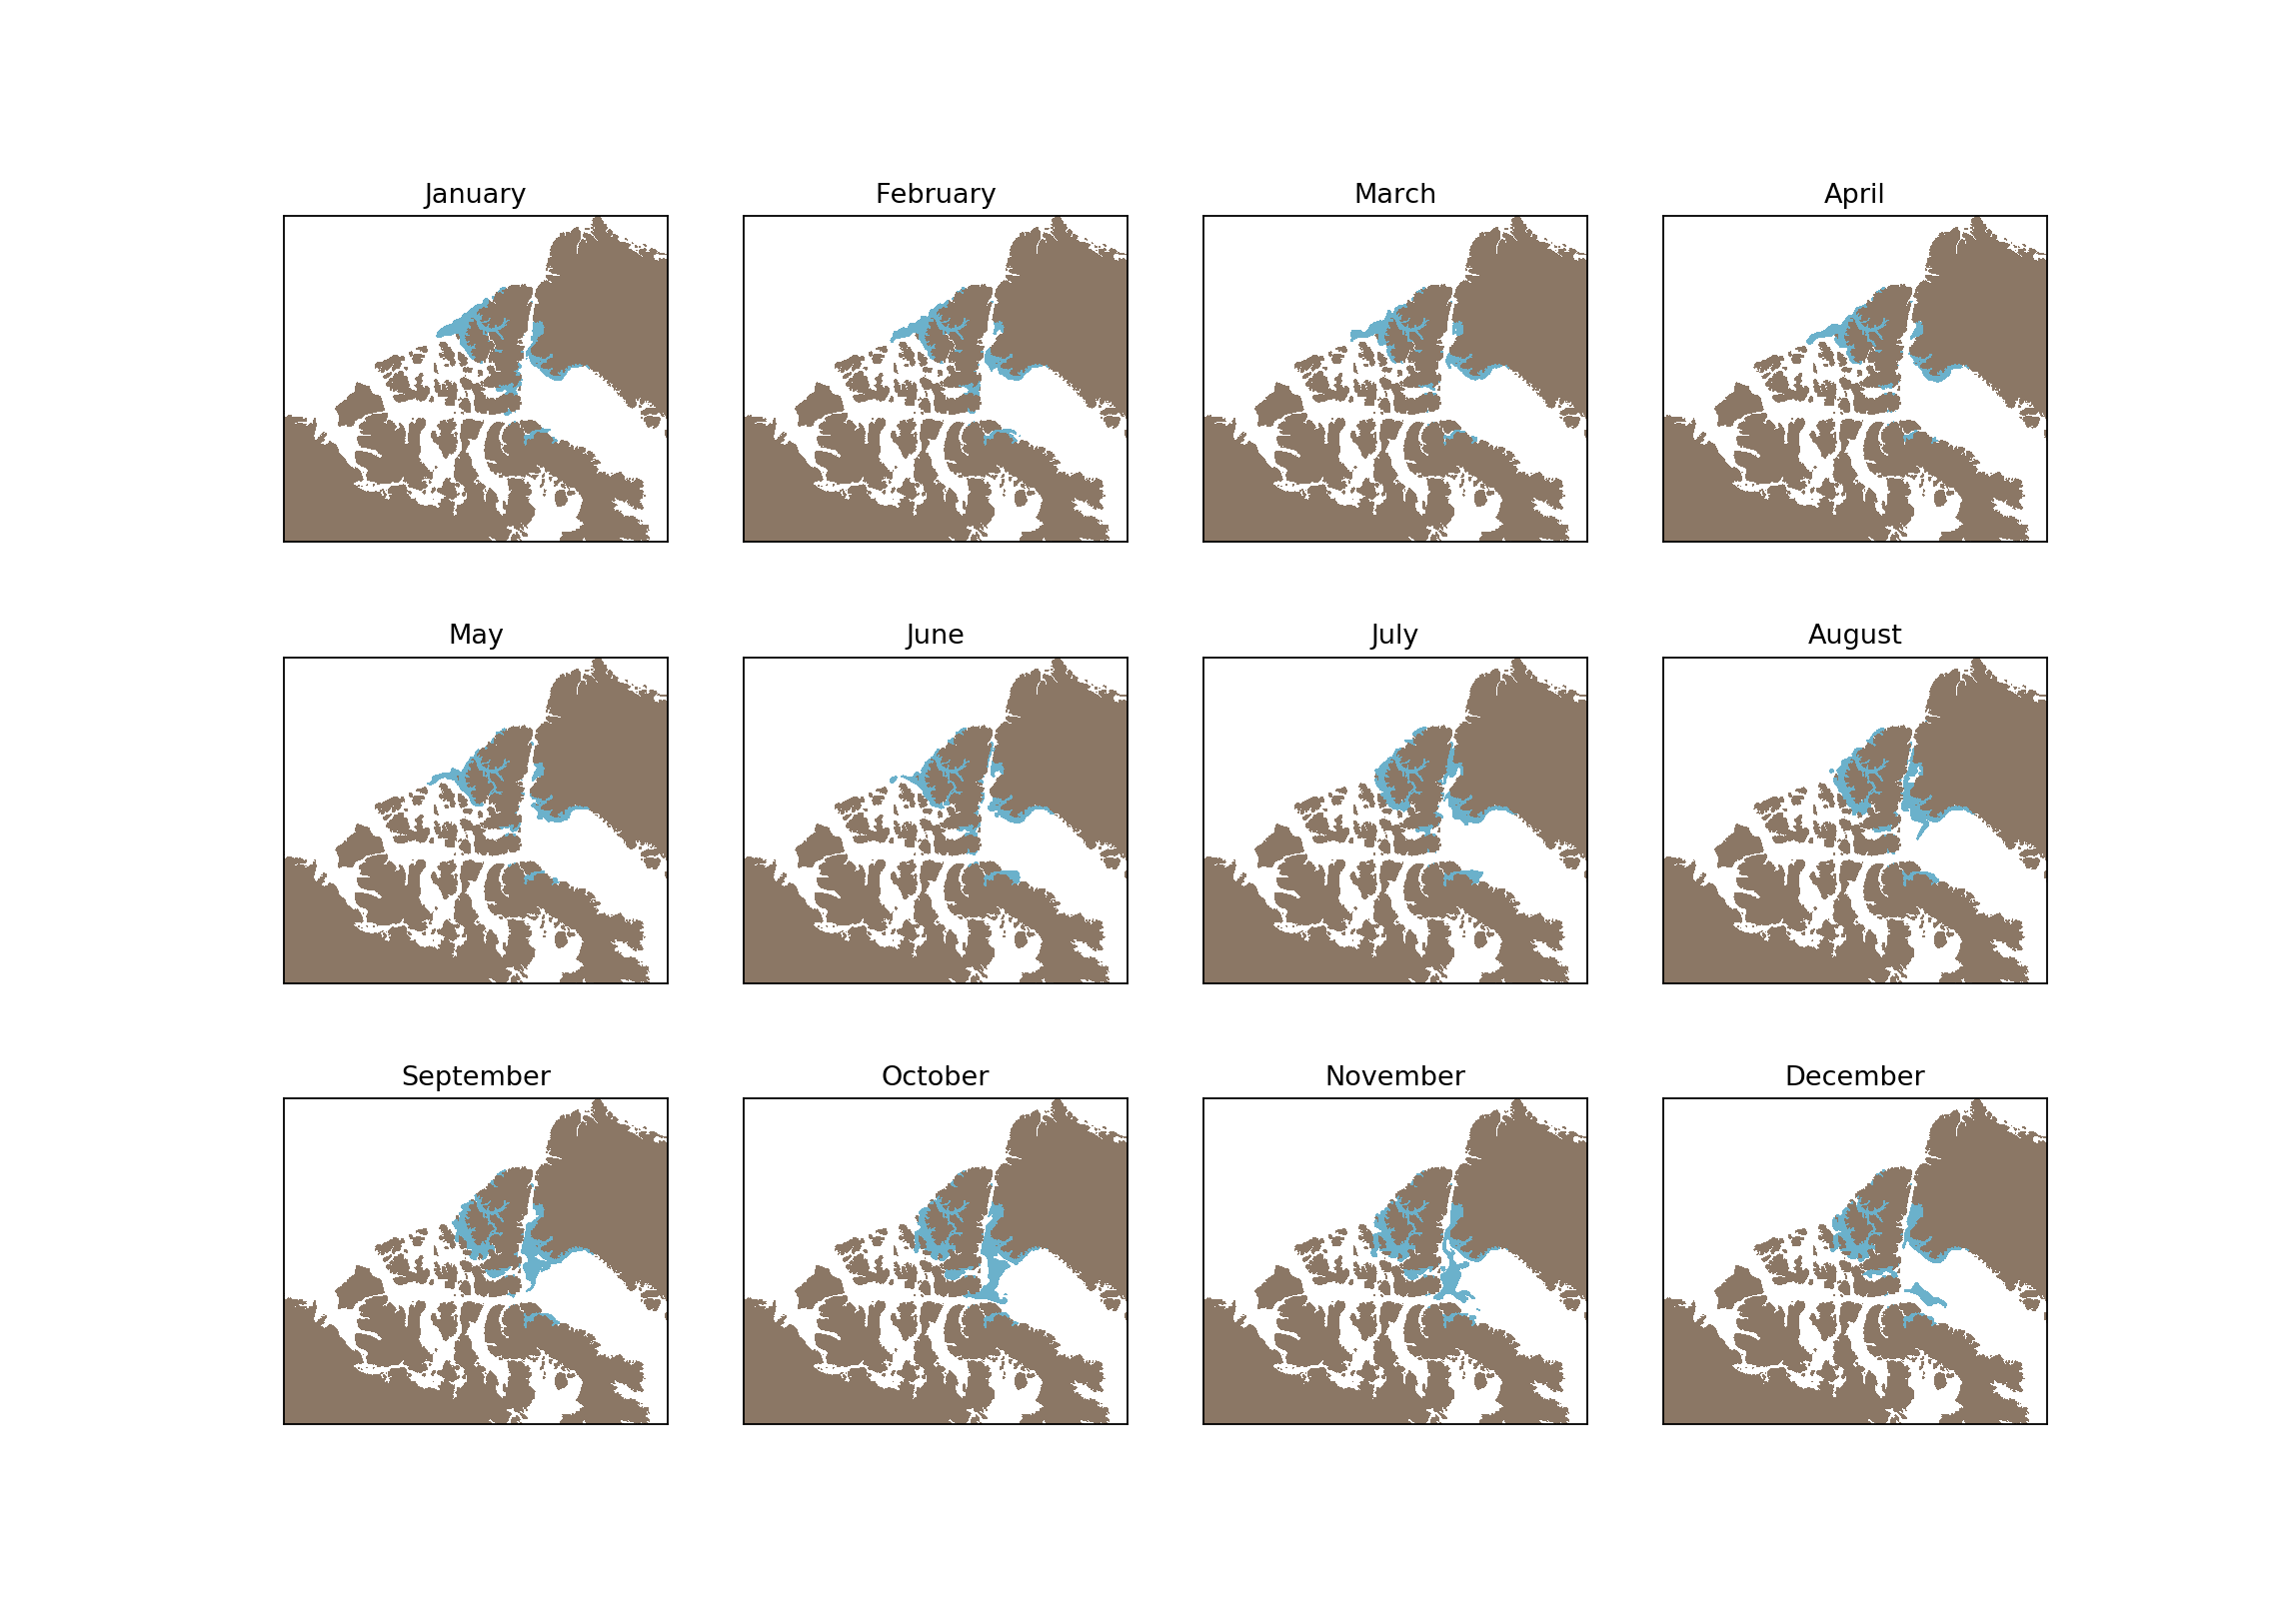

In [40]:
months_overview(RCD_glac_2015, [0.3, 1])

<IPython.core.display.Javascript object>


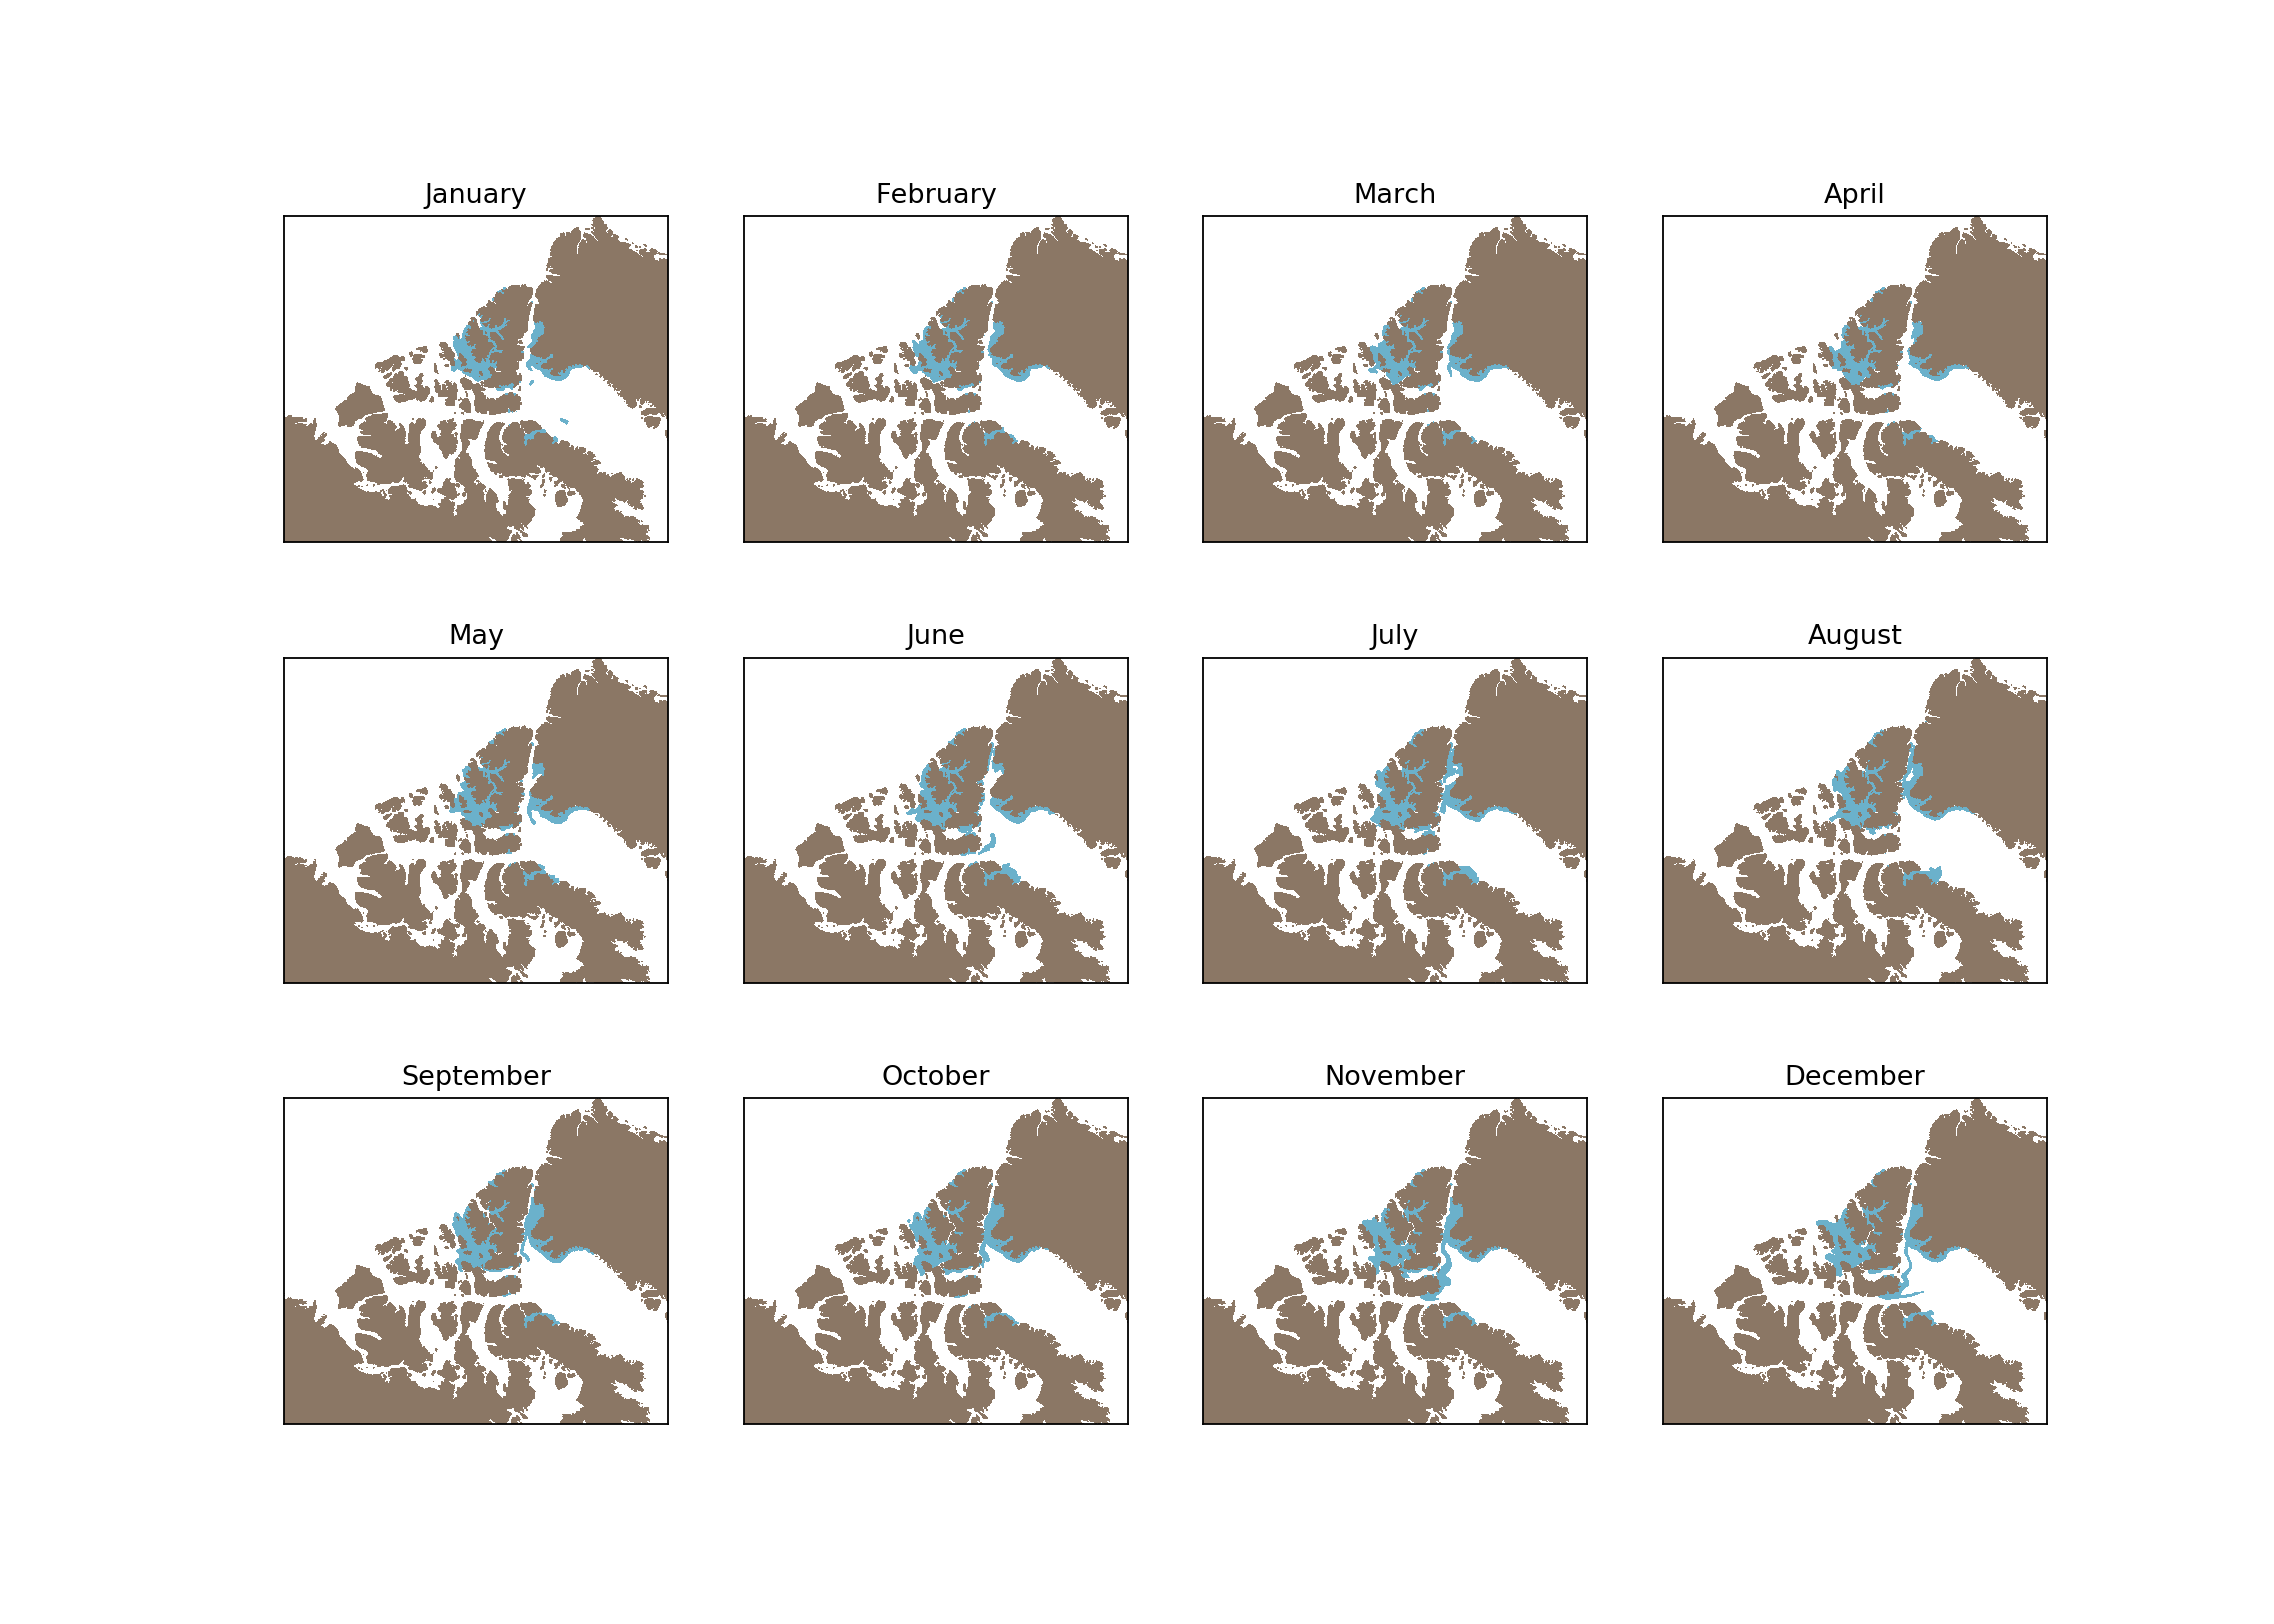

In [31]:
months_overview(RCD_glac_2016, [0.3, 1])

<IPython.core.display.Javascript object>


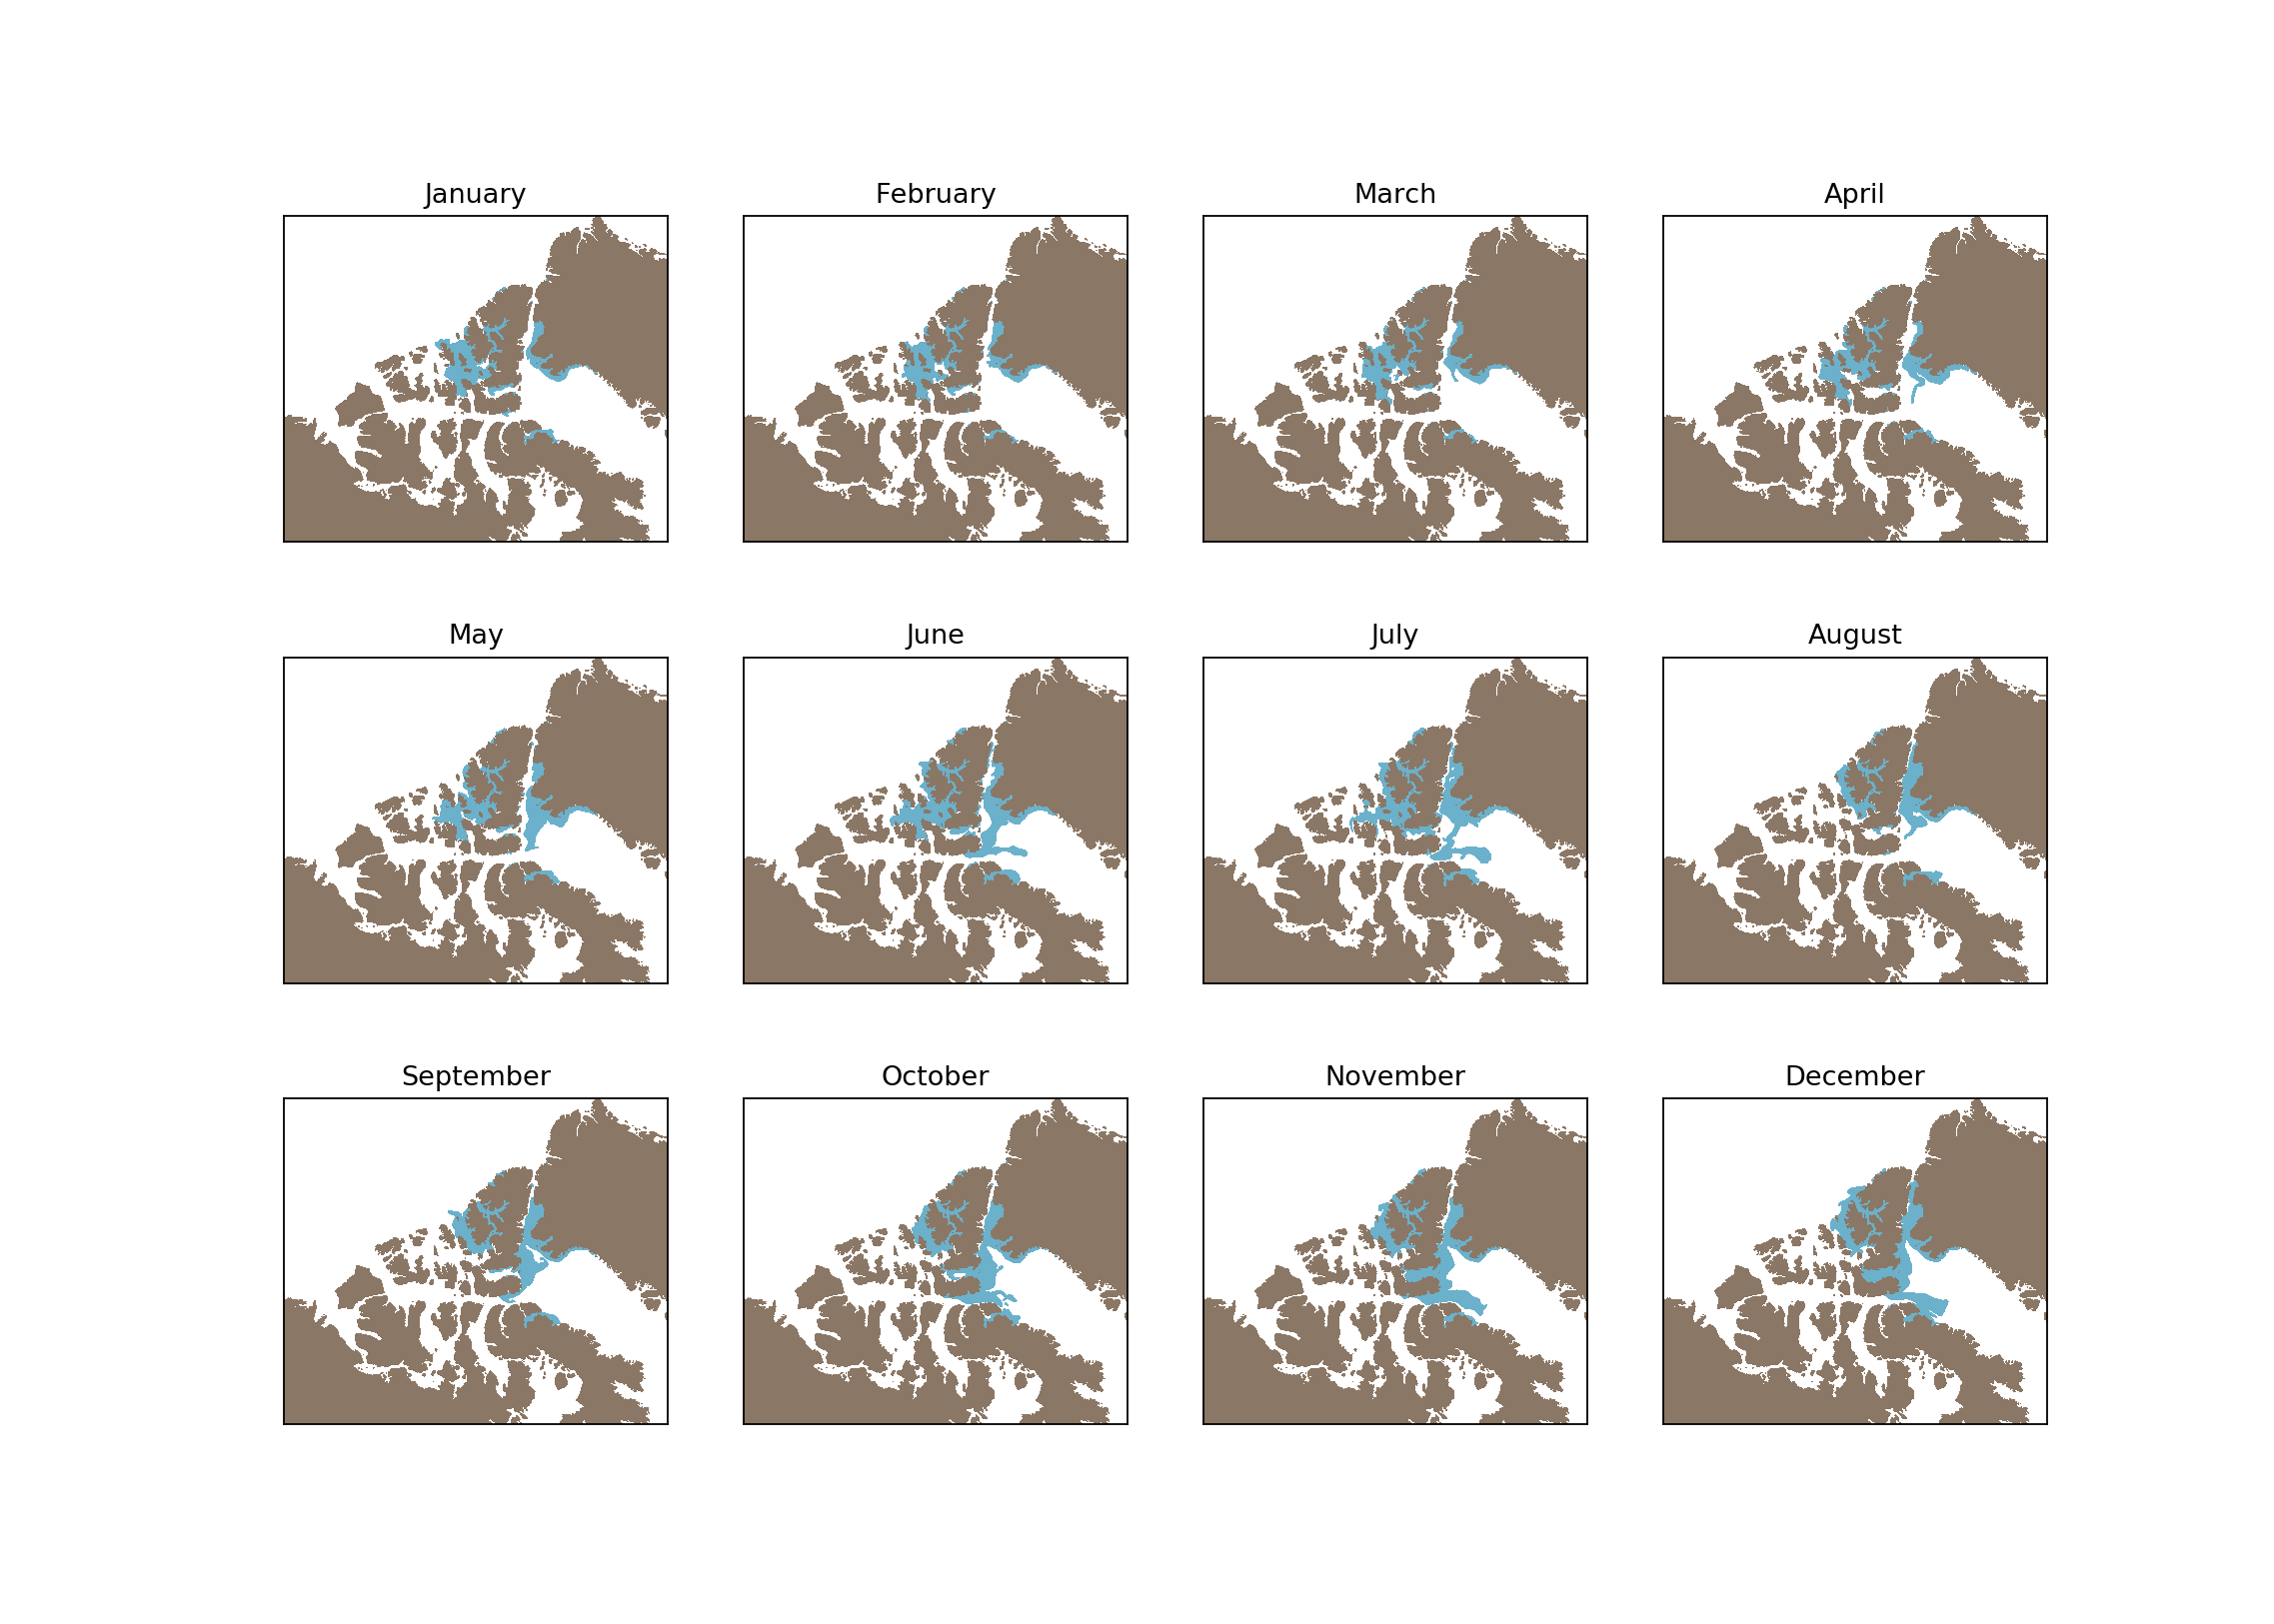

In [32]:
months_overview(RCD_glac_2017, [0.3, 1])

<IPython.core.display.Javascript object>


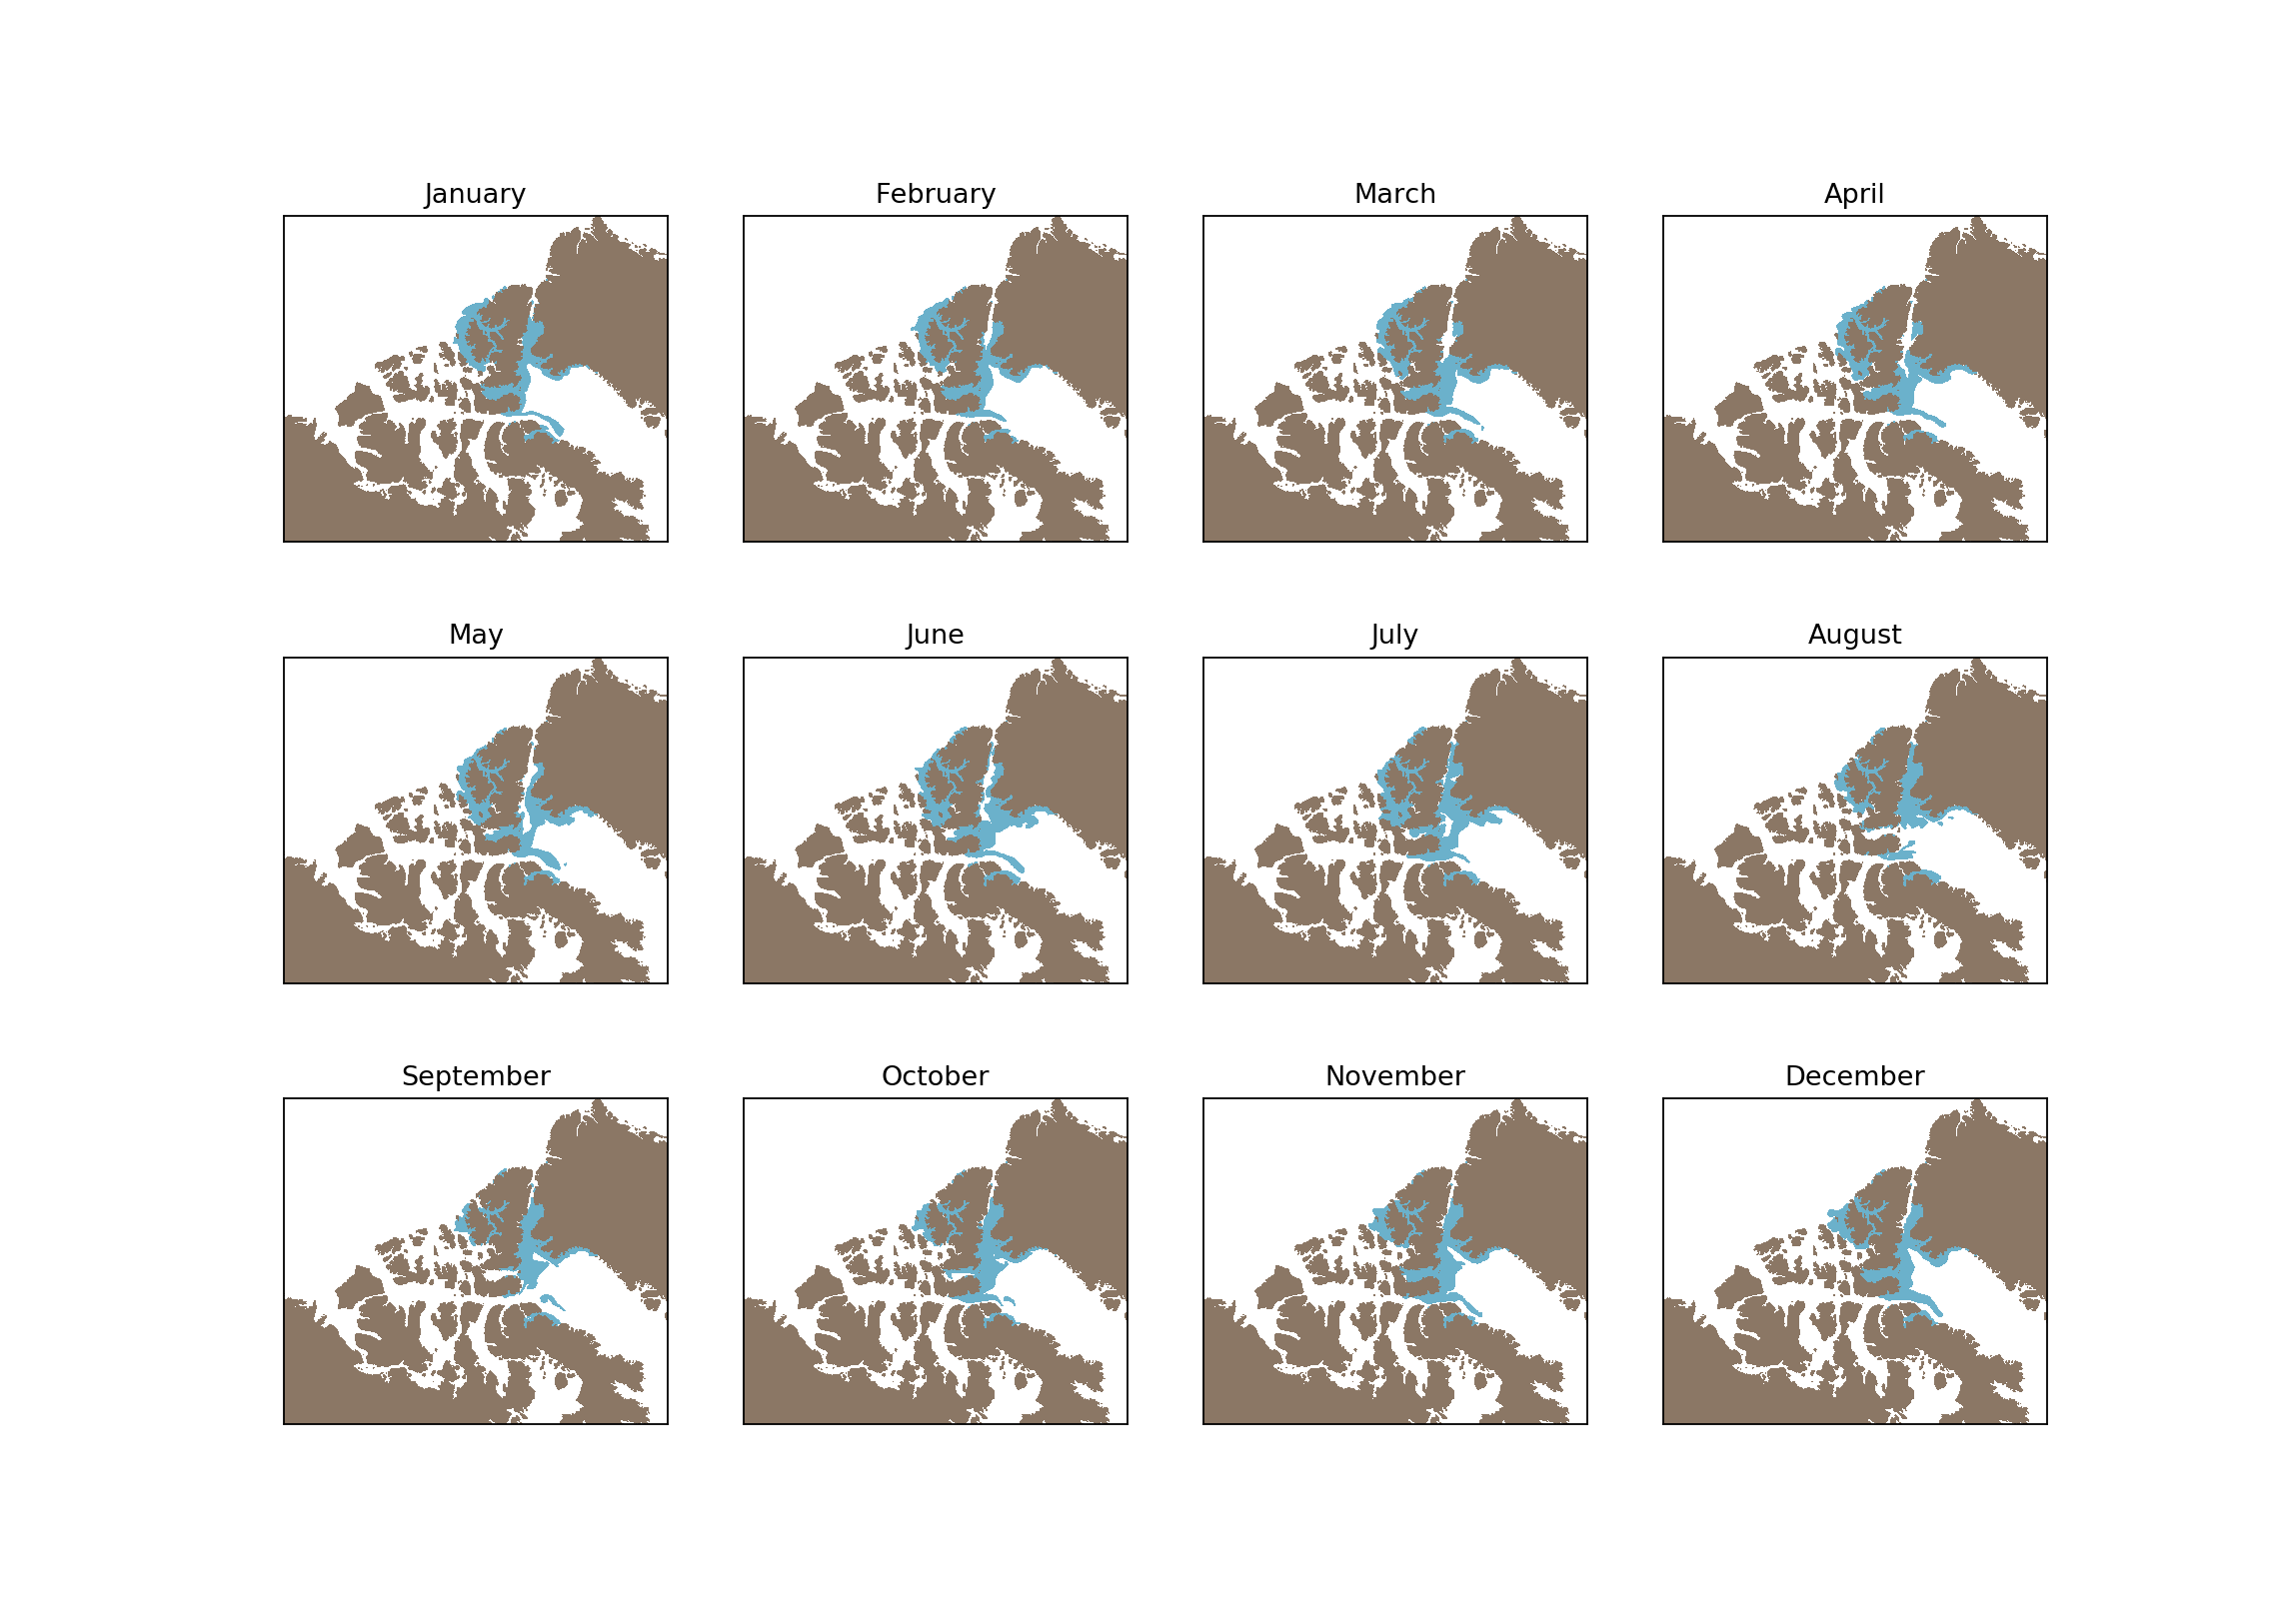

In [33]:
months_overview(RCD_glac_2018, [0.3, 1])

#### Continental rivers:

<IPython.core.display.Javascript object>


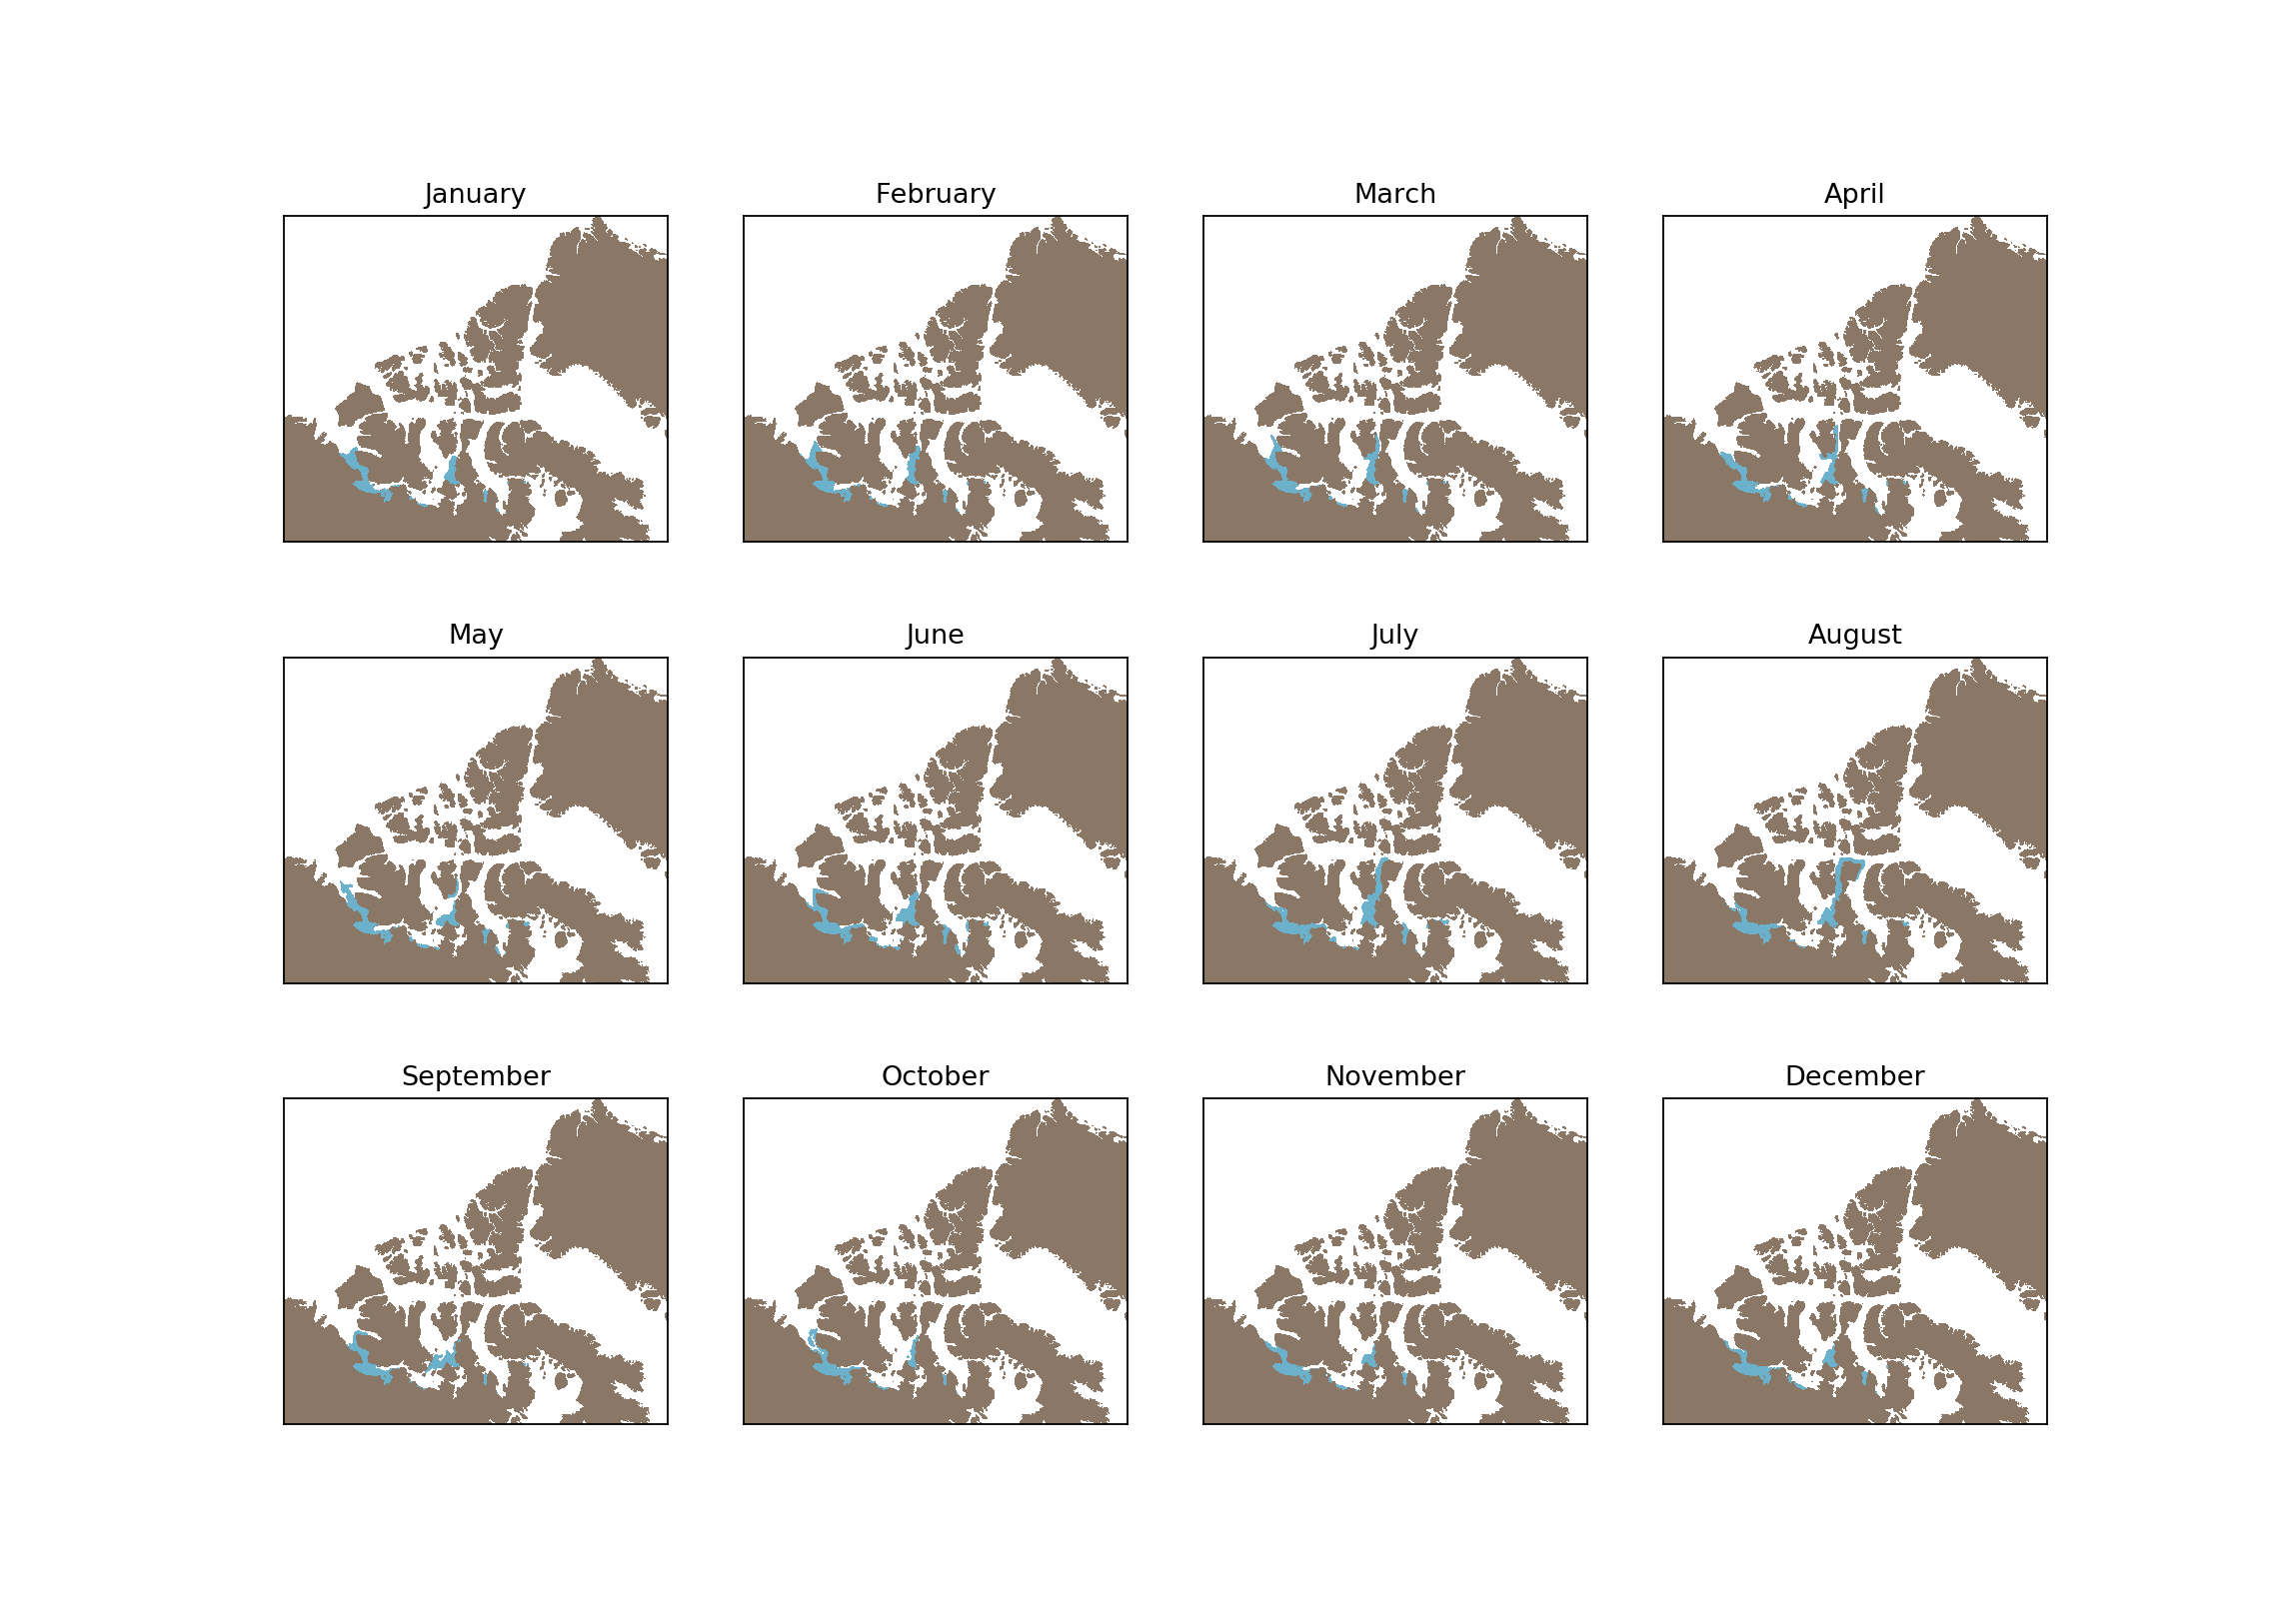

In [46]:
months_overview(RCD_cont_2015, [0.3, 1])

<IPython.core.display.Javascript object>


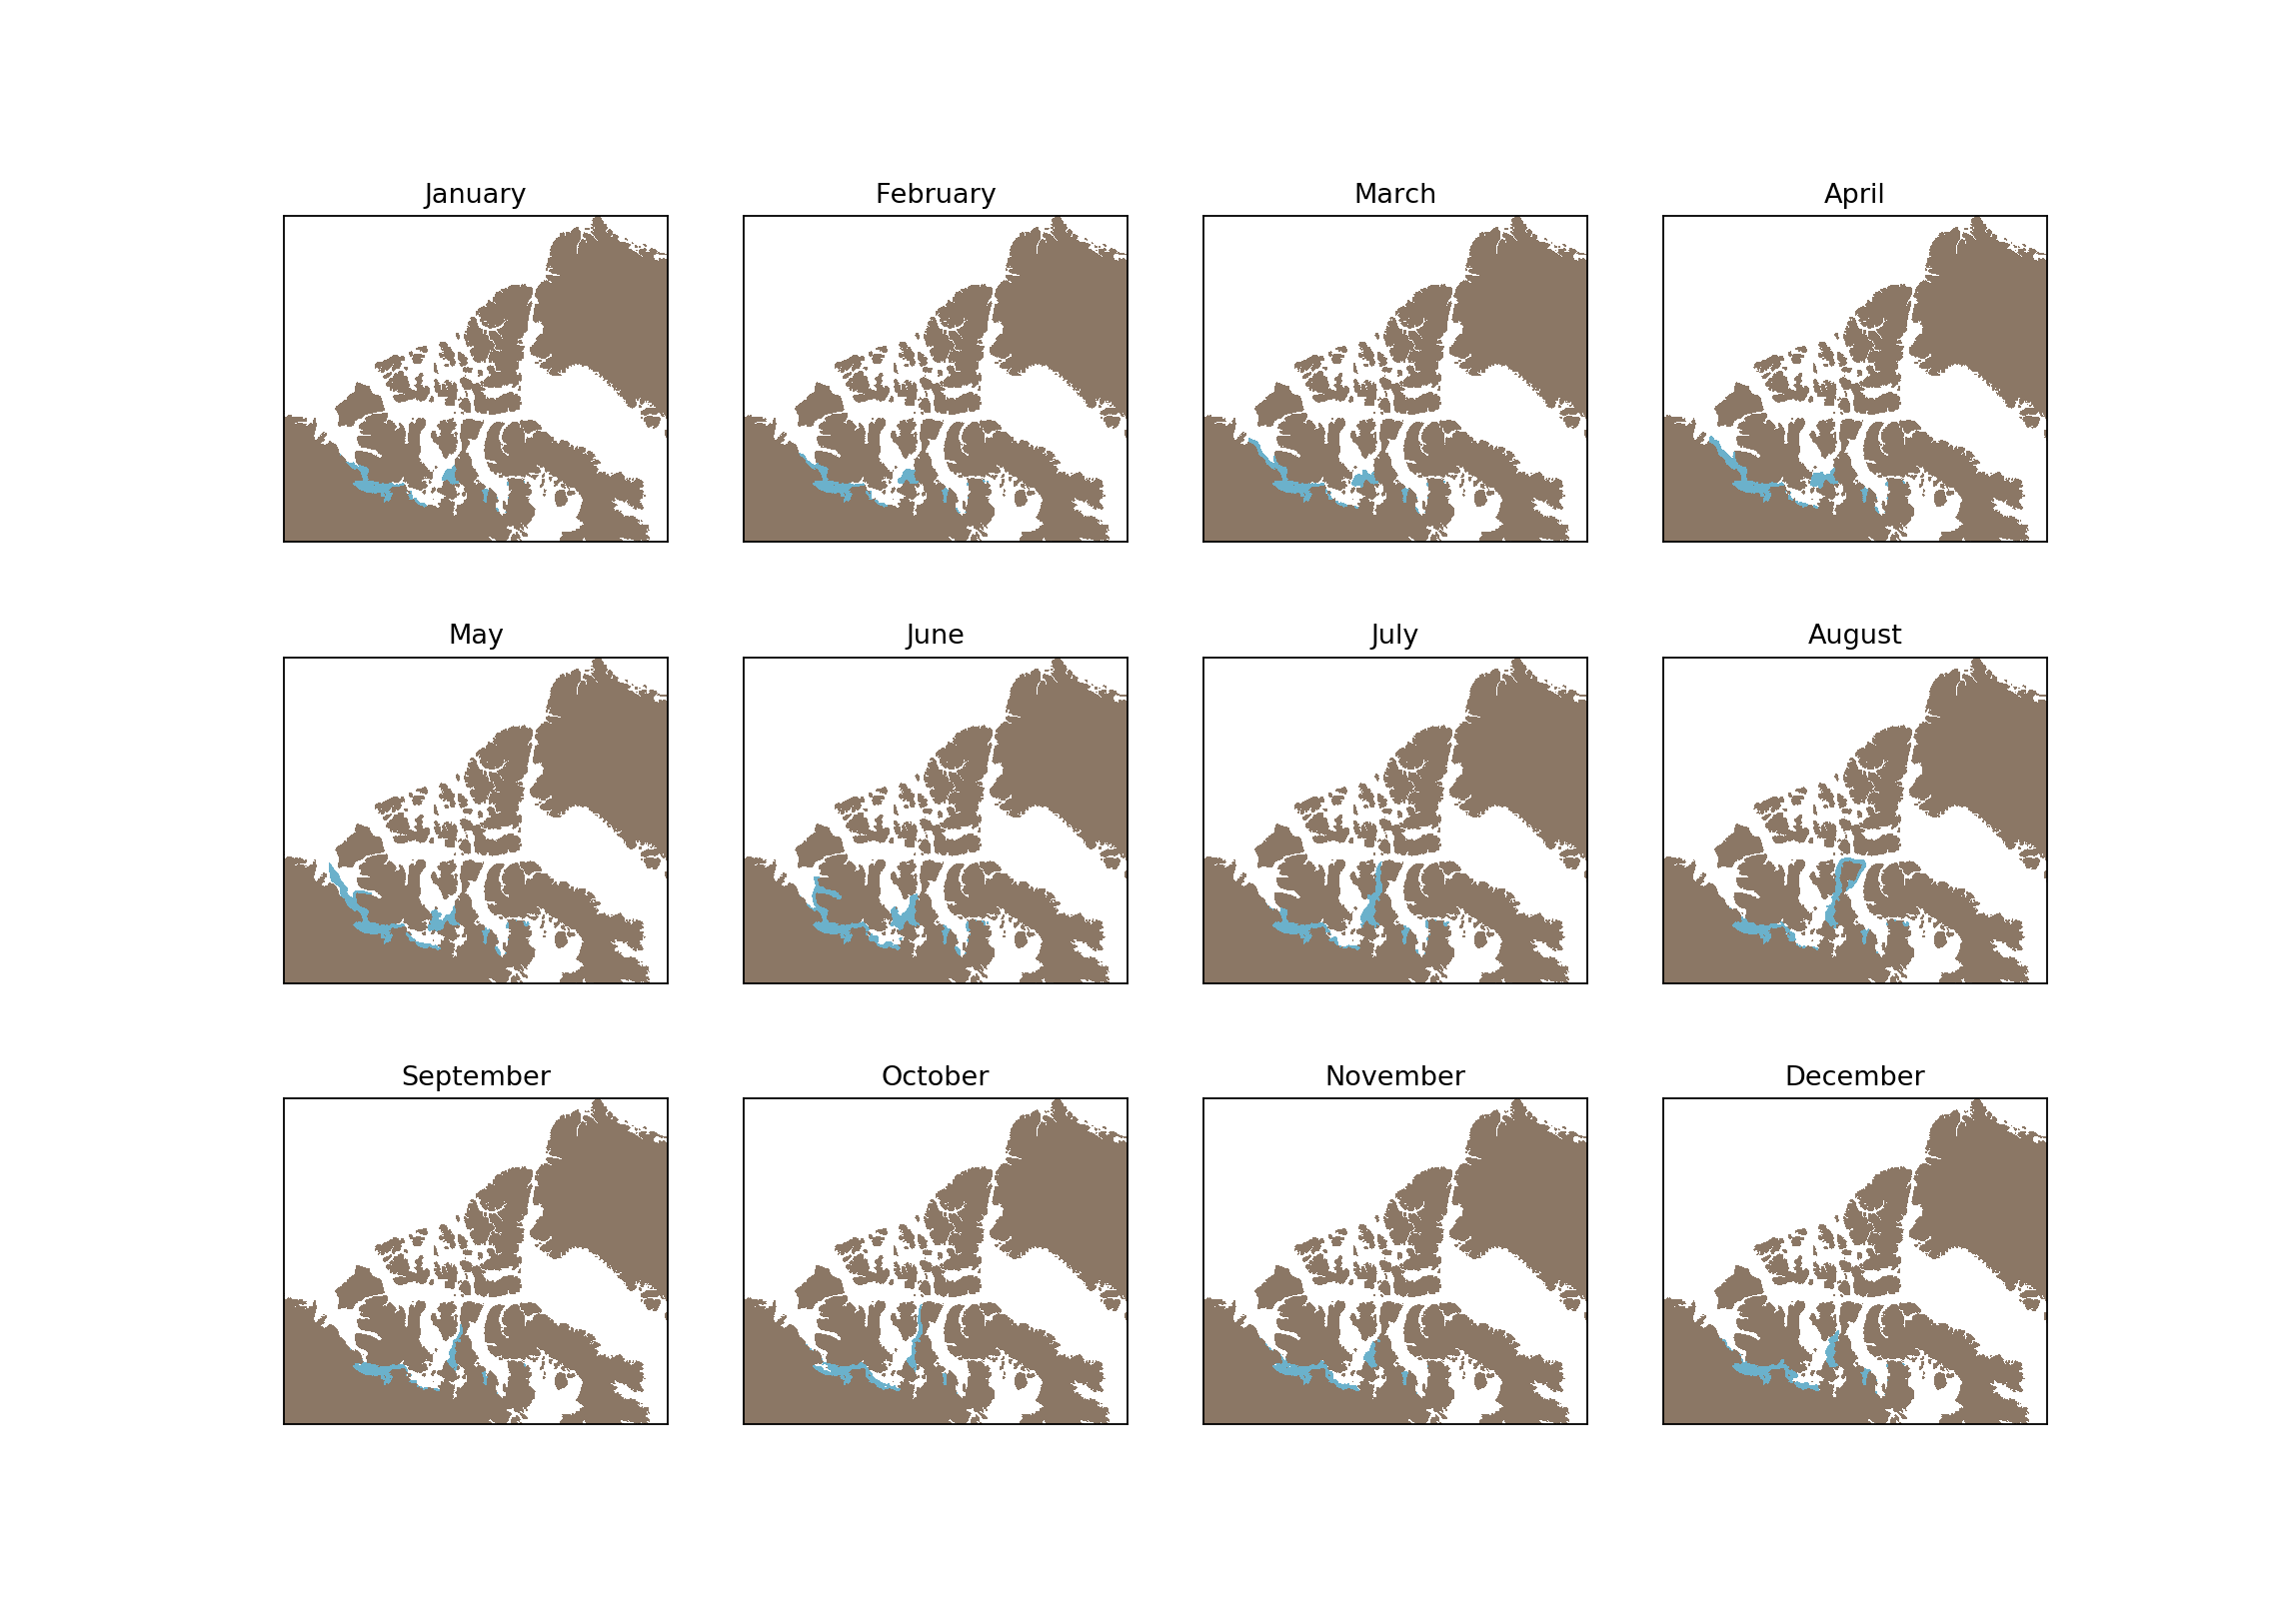

In [47]:
months_overview(RCD_cont_2016, [0.3, 1])

<IPython.core.display.Javascript object>


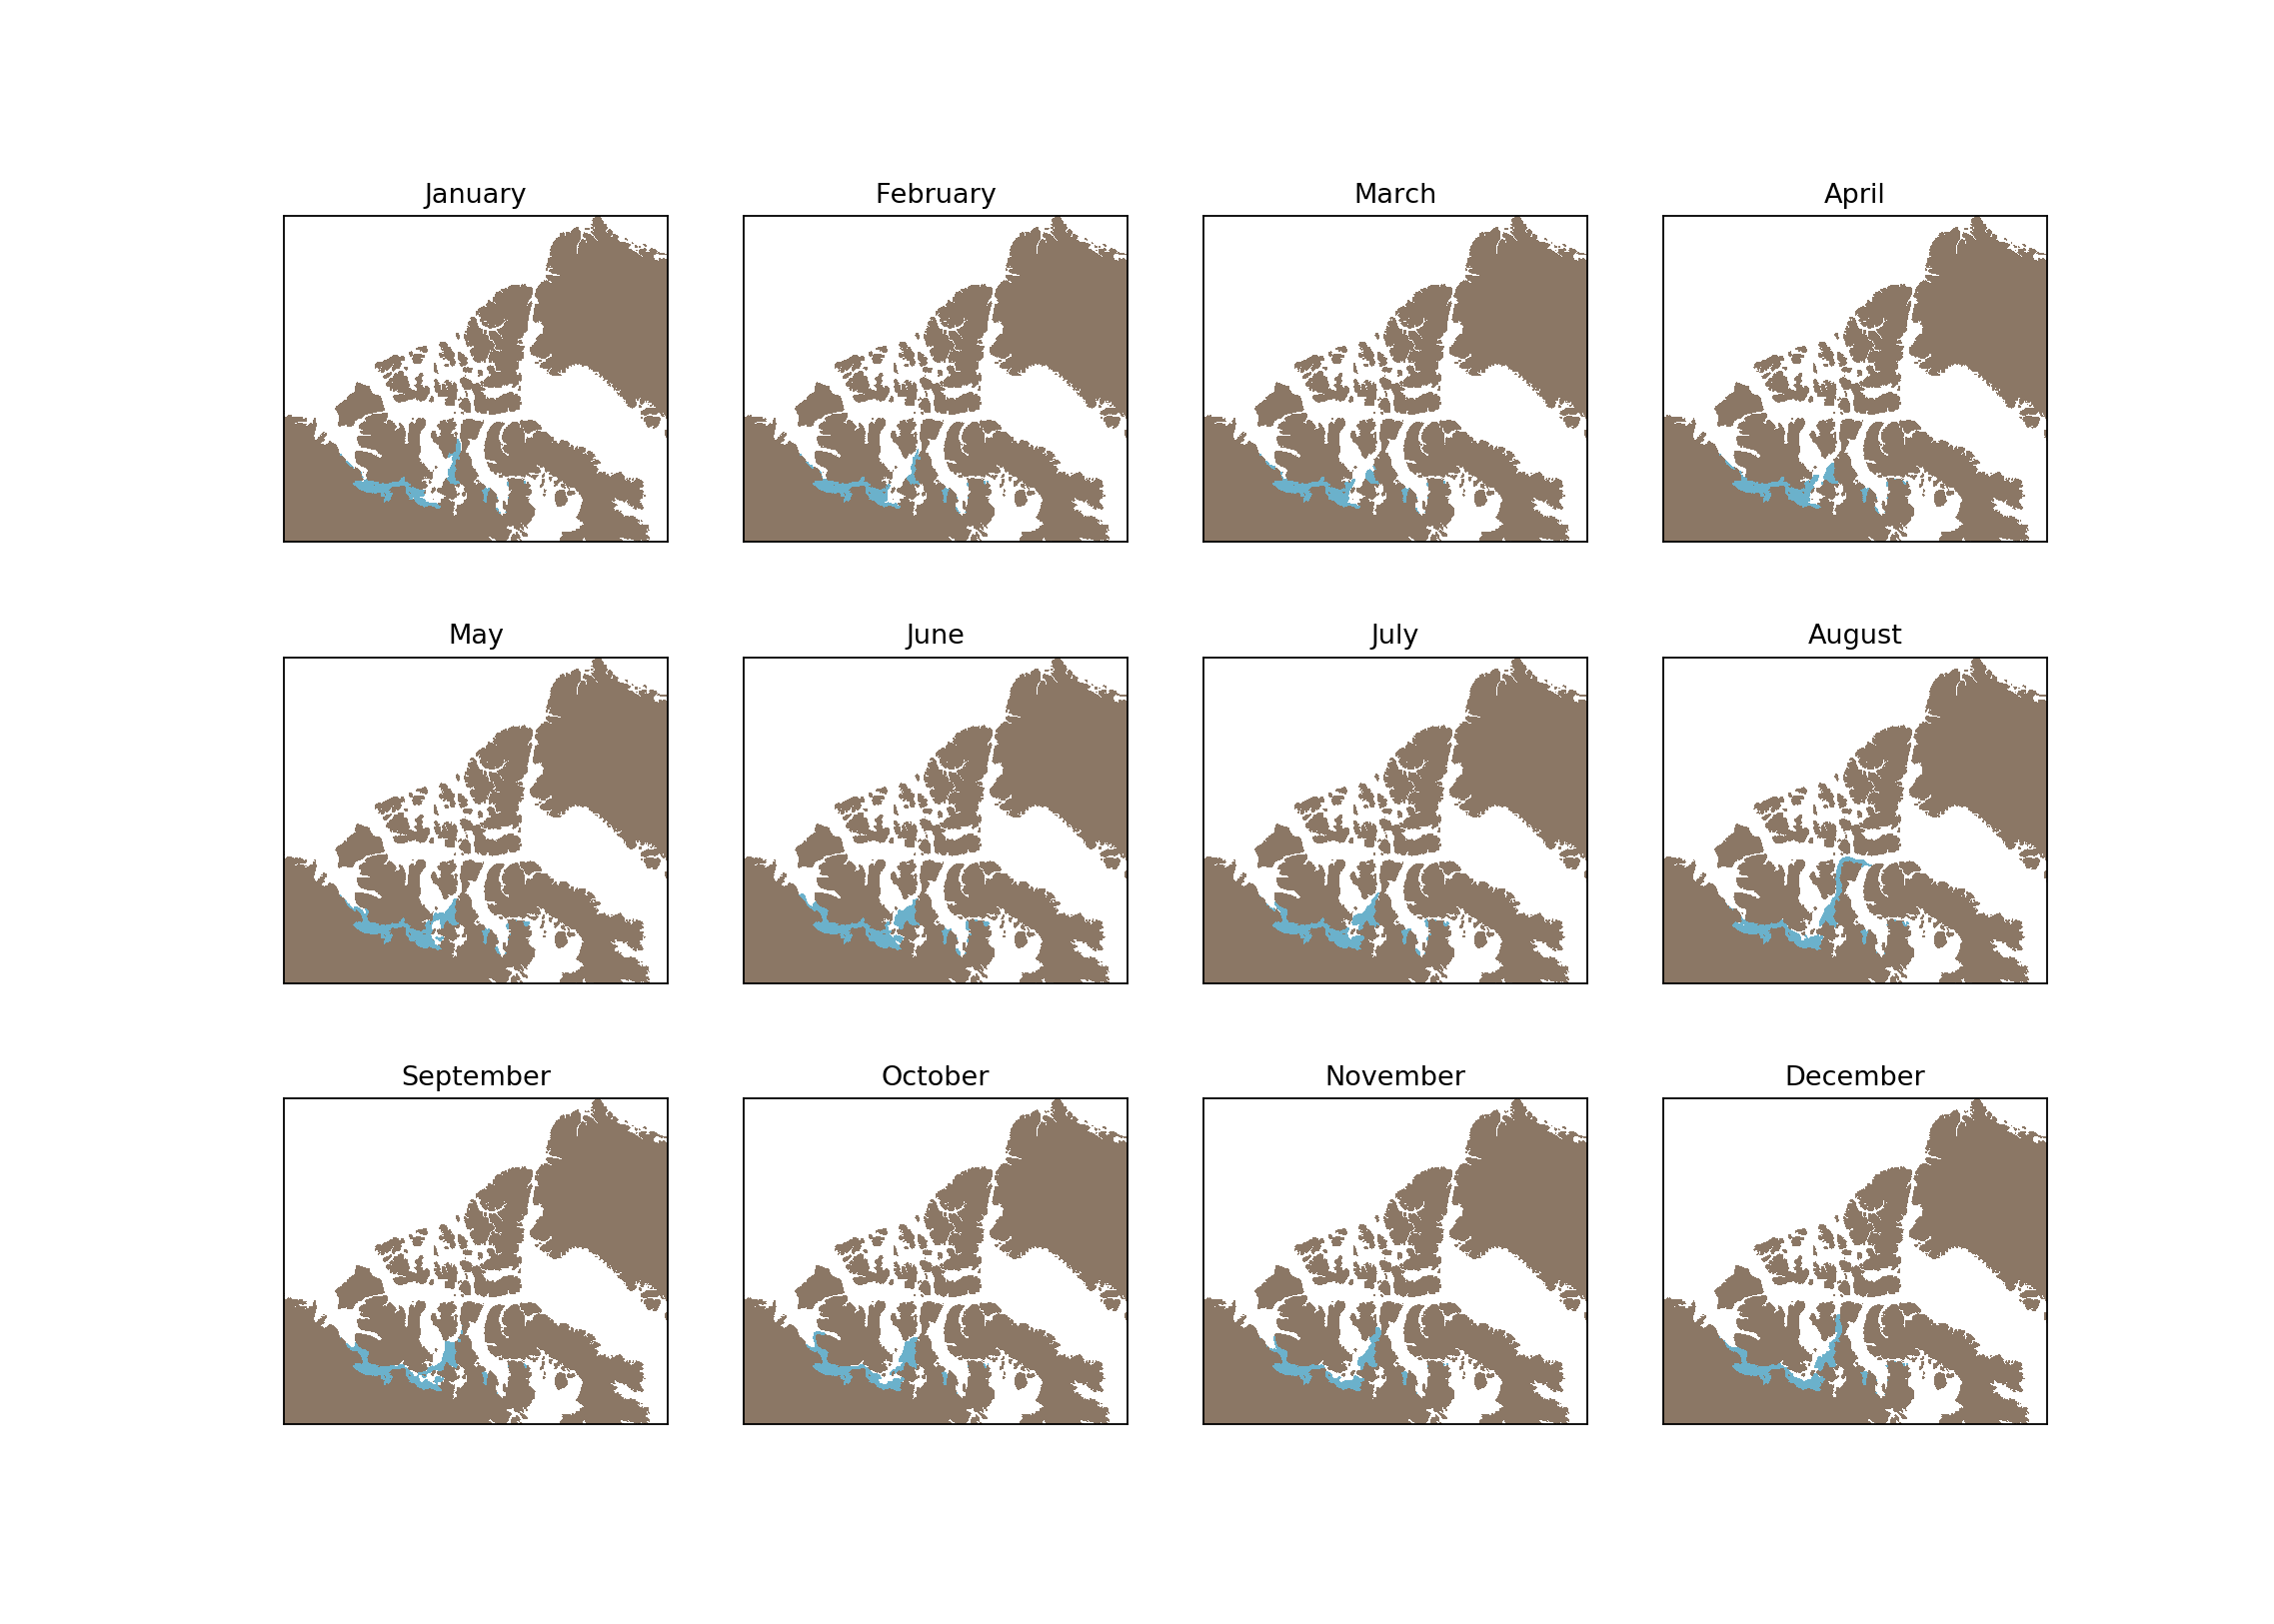

In [48]:
months_overview(RCD_cont_2017, [0.3, 1])

<IPython.core.display.Javascript object>


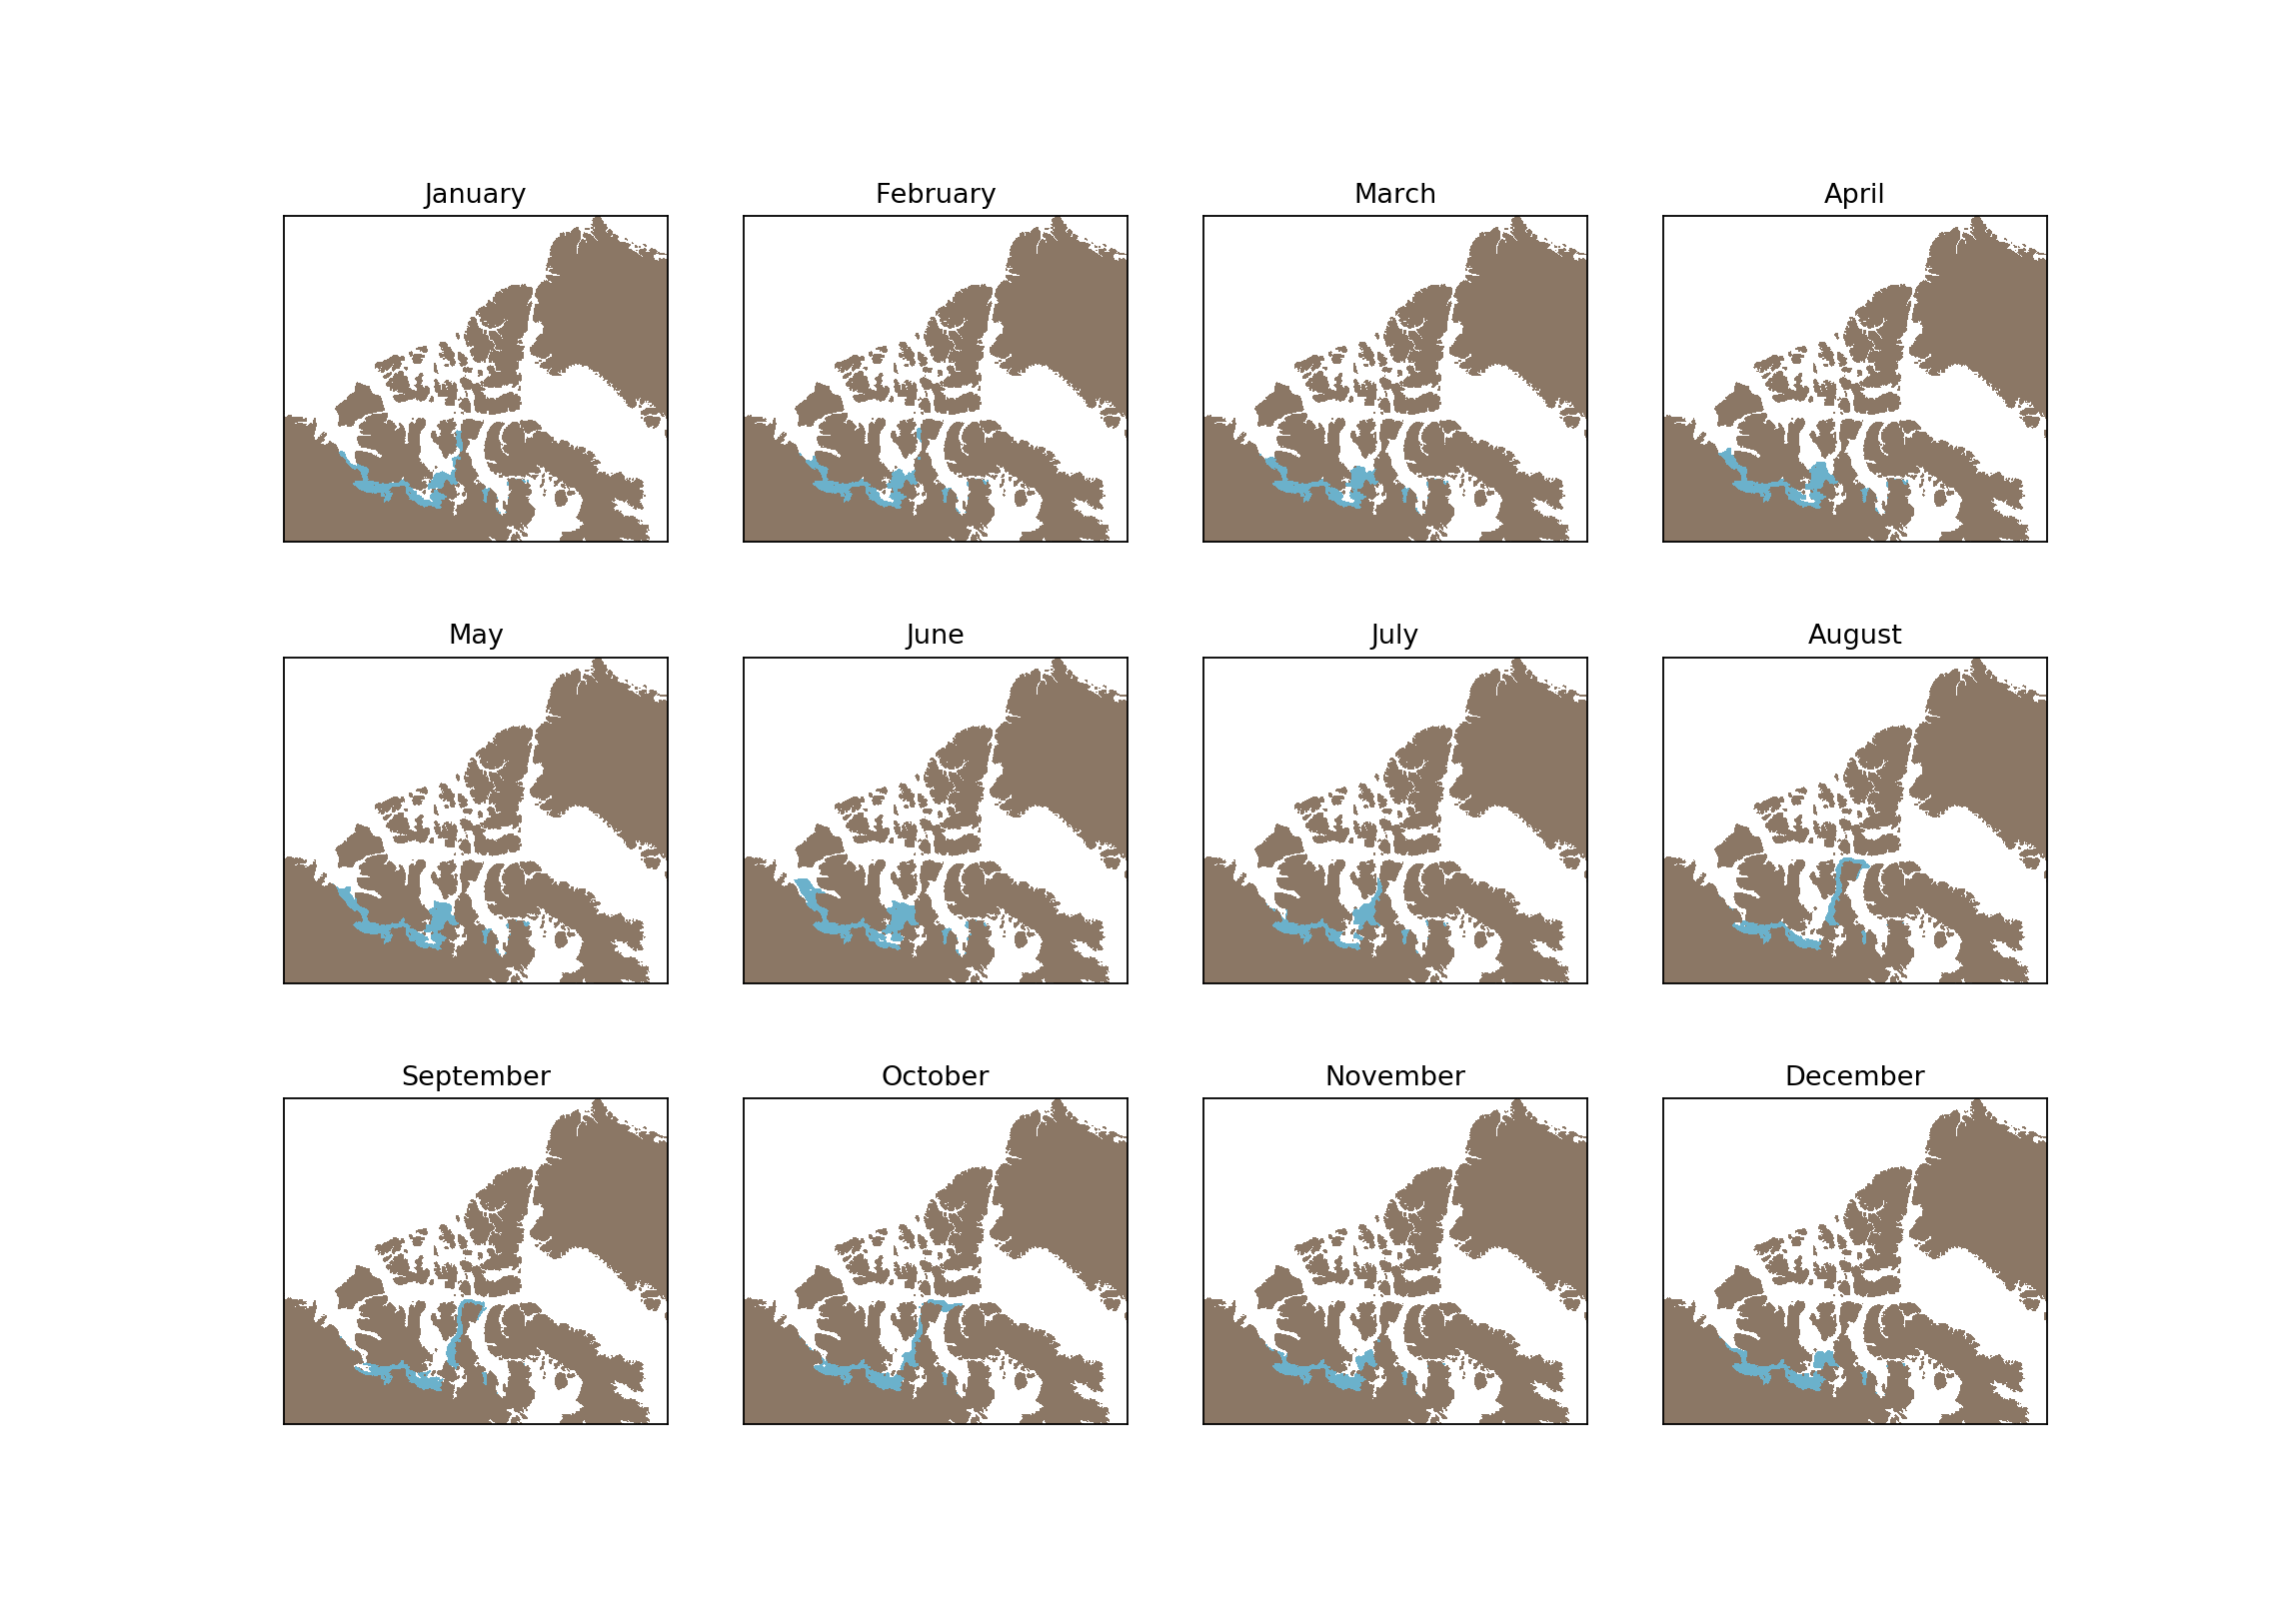

In [49]:
months_overview(RCD_cont_2018, [0.3, 1])

### Create an animation:

In [52]:
import matplotlib.animation as animation
from matplotlib import rc

In [60]:
rc('animation', html='html5')

In [44]:
RCD_glac = np.empty((15*12, 50, 570, 640))
RCD_glac[12*0:12*1,:,:,:] = RCD_glac_2002
RCD_glac[12*1:12*2,:,:,:] = RCD_glac_2003
RCD_glac[12*2:12*3,:,:,:] = RCD_glac_2004
RCD_glac[12*3:12*4,:,:,:] = RCD_glac_2005
RCD_glac[12*4:12*5,:,:,:] = RCD_glac_2006
RCD_glac[12*5:12*6,:,:,:] = RCD_glac_2007
RCD_glac[12*6:12*7,:,:,:] = RCD_glac_2008
RCD_glac[12*7:12*8,:,:,:] = RCD_glac_2009
RCD_glac[12*8:12*9,:,:,:] = RCD_glac_2010
RCD_glac[12*9:12*10,:,:,:] = RCD_glac_2011
RCD_glac[12*10:12*11,:,:,:] = RCD_glac_2012
RCD_glac[12*11:12*12,:,:,:] = RCD_glac_2013
RCD_glac[12*12:12*13,:,:,:] = RCD_glac_2014
RCD_glac[12*13:12*14,:,:,:] = RCD_glac_2015

In [49]:
RCD_glac = np.array([np.ma.masked_where((land_mask[:,1480:2050,160:800] > 0.1) , RCD_glac[i,:,:,:]) for i in range(0,12*15)])

In [70]:
def animate(frames):
    
#     ax.cla()
    x, y    = proj(lons, lats)
    colour  = cmocean.cm.ice_r
    proj.contourf(x, y, RCD_glac[frames,0,:,:], vmin=0.0, vmax=1.0, cmap=colour)
    
    ax.set_title('Year: ' + str(int(2002+np.floor(frames/12)))+' Month: ' + str(int(frames + 1 - 12*np.floor(frames/12))))
    return

<IPython.core.display.Javascript object>


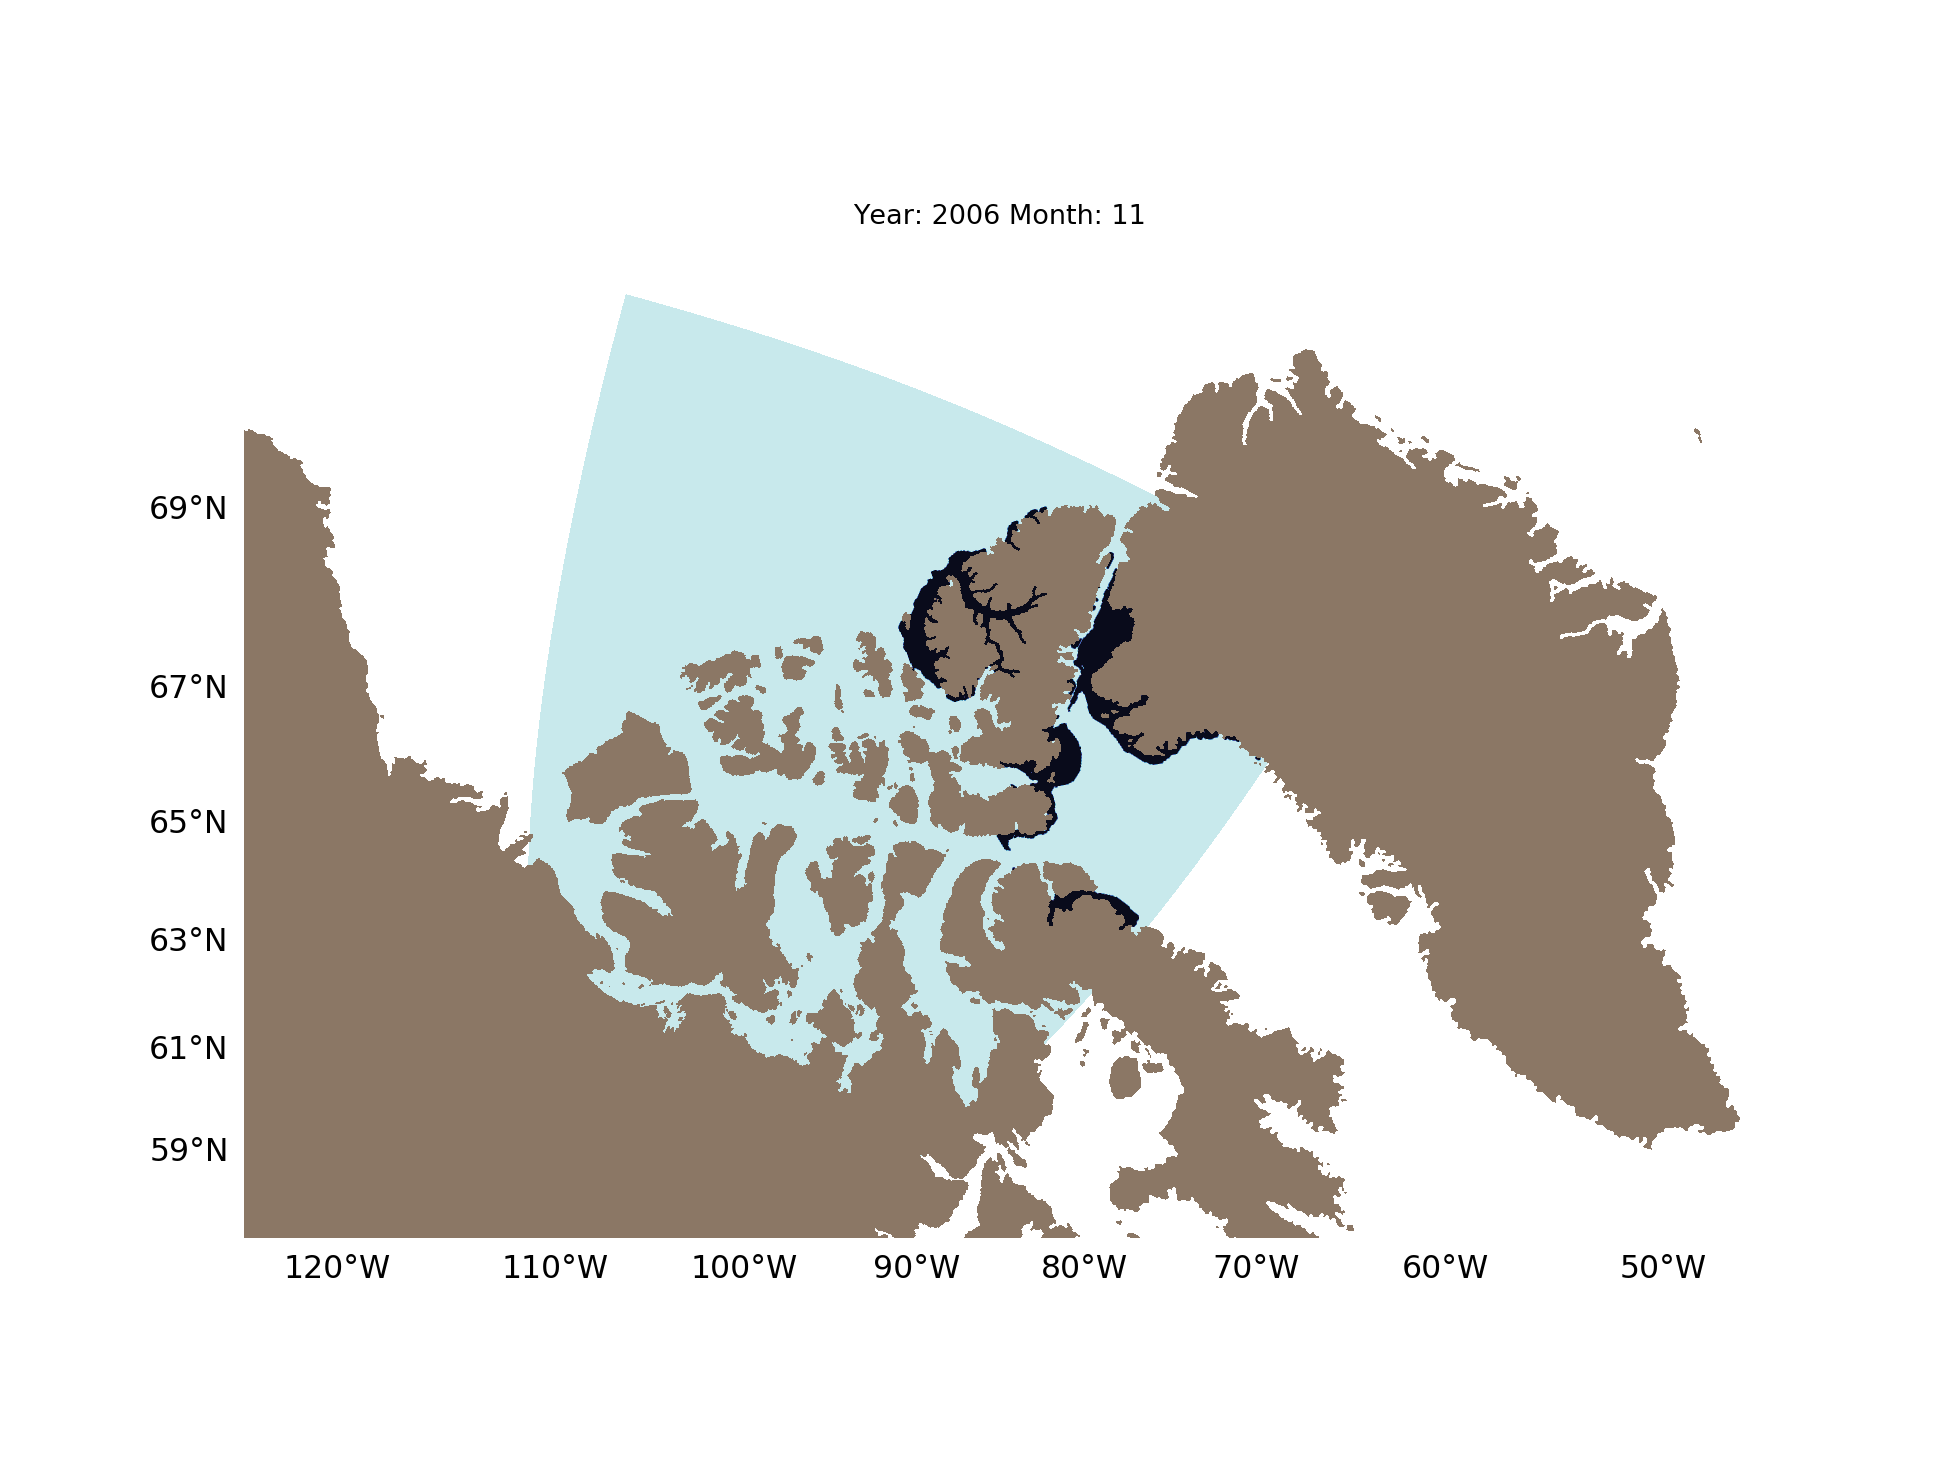

In [71]:
fig, ax, proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/mn-reference.pickle','rb'))

# Run animation:
ani = animation.FuncAnimation(fig, animate, frames=12*15)
ani

In [ ]:
ani.save('/ocean/brogalla/GEOTRACES/figures/dmn_glacial-2002-2015.mp4', dpi=300, fps=1.2)

# Spatial density maps

In [17]:
glacier_prop_2002.shape

(12, 50, 570, 640)

In [33]:
glacier_prop = np.sum((glacier_prop_2002+glacier_prop_2003+glacier_prop_2004+glacier_prop_2005+glacier_prop_2006 \
        +glacier_prop_2007+glacier_prop_2008+glacier_prop_2009+glacier_prop_2010+glacier_prop_2011 \
        +glacier_prop_2012+glacier_prop_2013+glacier_prop_2014+glacier_prop_2015), axis=0)

In [40]:
glacier_prop_summer = np.sum((glacier_prop_2002[5:9,:,:,:]+glacier_prop_2003[5:9,:,:,:]+\
                              glacier_prop_2004[5:9,:,:,:]+glacier_prop_2005[5:9,:,:,:]+\
                              glacier_prop_2006[5:9,:,:,:]+glacier_prop_2007[5:9,:,:,:]+\
                              glacier_prop_2008[5:9,:,:,:]+glacier_prop_2009[5:9,:,:,:]+\
                              glacier_prop_2010[5:9,:,:,:]+glacier_prop_2011[5:9,:,:,:]+\
                              glacier_prop_2012[5:9,:,:,:]+glacier_prop_2013[5:9,:,:,:]+\
                              glacier_prop_2014[5:9,:,:,:]+glacier_prop_2015[5:9,:,:,:]), axis=0)

In [44]:
glacier_prop_spring = np.sum((glacier_prop_2002[2:5,:,:,:]+glacier_prop_2003[2:5,:,:,:]+\
                              glacier_prop_2004[2:5,:,:,:]+glacier_prop_2005[2:5,:,:,:]+\
                              glacier_prop_2006[2:5,:,:,:]+glacier_prop_2007[2:5,:,:,:]+\
                              glacier_prop_2008[2:5,:,:,:]+glacier_prop_2009[2:5,:,:,:]+\
                              glacier_prop_2010[2:5,:,:,:]+glacier_prop_2011[2:5,:,:,:]+\
                              glacier_prop_2012[2:5,:,:,:]+glacier_prop_2013[2:5,:,:,:]+\
                              glacier_prop_2014[2:5,:,:,:]+glacier_prop_2015[2:5,:,:,:]), axis=0)

In [45]:
glacier_prop_fall   = np.sum((glacier_prop_2002[9:11,:,:,:]+glacier_prop_2003[9:11,:,:,:]+\
                              glacier_prop_2004[9:11,:,:,:]+glacier_prop_2005[9:11,:,:,:]+\
                              glacier_prop_2006[9:11,:,:,:]+glacier_prop_2007[9:11,:,:,:]+\
                              glacier_prop_2008[9:11,:,:,:]+glacier_prop_2009[9:11,:,:,:]+\
                              glacier_prop_2010[9:11,:,:,:]+glacier_prop_2011[9:11,:,:,:]+\
                              glacier_prop_2012[9:11,:,:,:]+glacier_prop_2013[9:11,:,:,:]+\
                              glacier_prop_2014[9:11,:,:,:]+glacier_prop_2015[9:11,:,:,:]), axis=0)

<IPython.core.display.Javascript object>


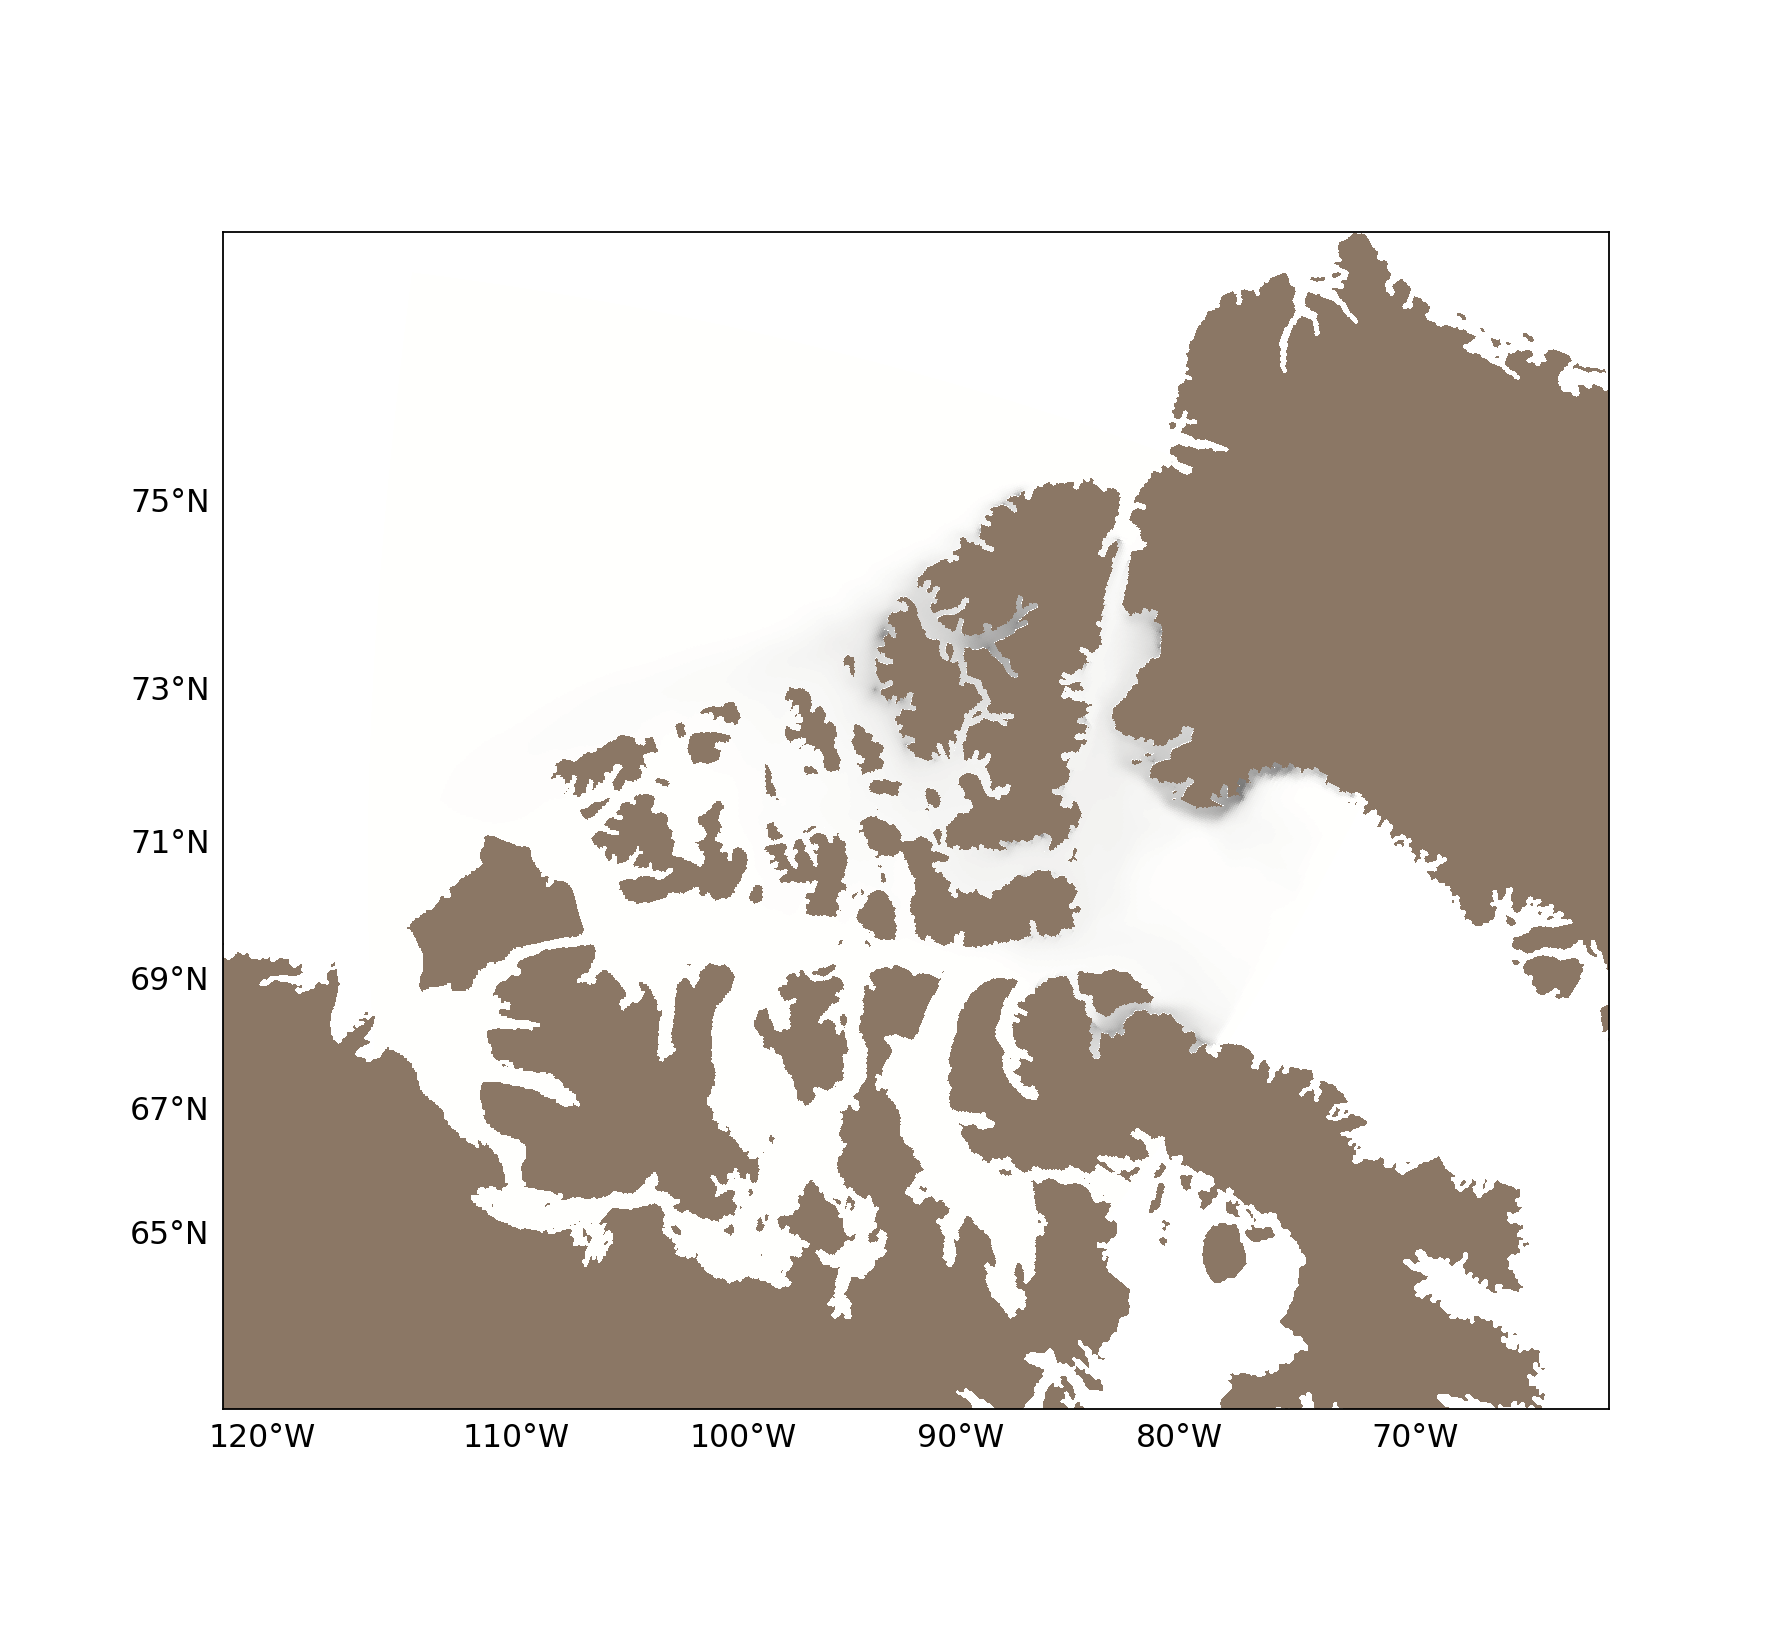

In [48]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y    = proj(lons, lats)
colour  = cmocean.cm.gray_r

proj.pcolor(x, y, glacier_prop[0,:,:], vmin=0, vmax=12*14, cmap=colour)

<IPython.core.display.Javascript object>


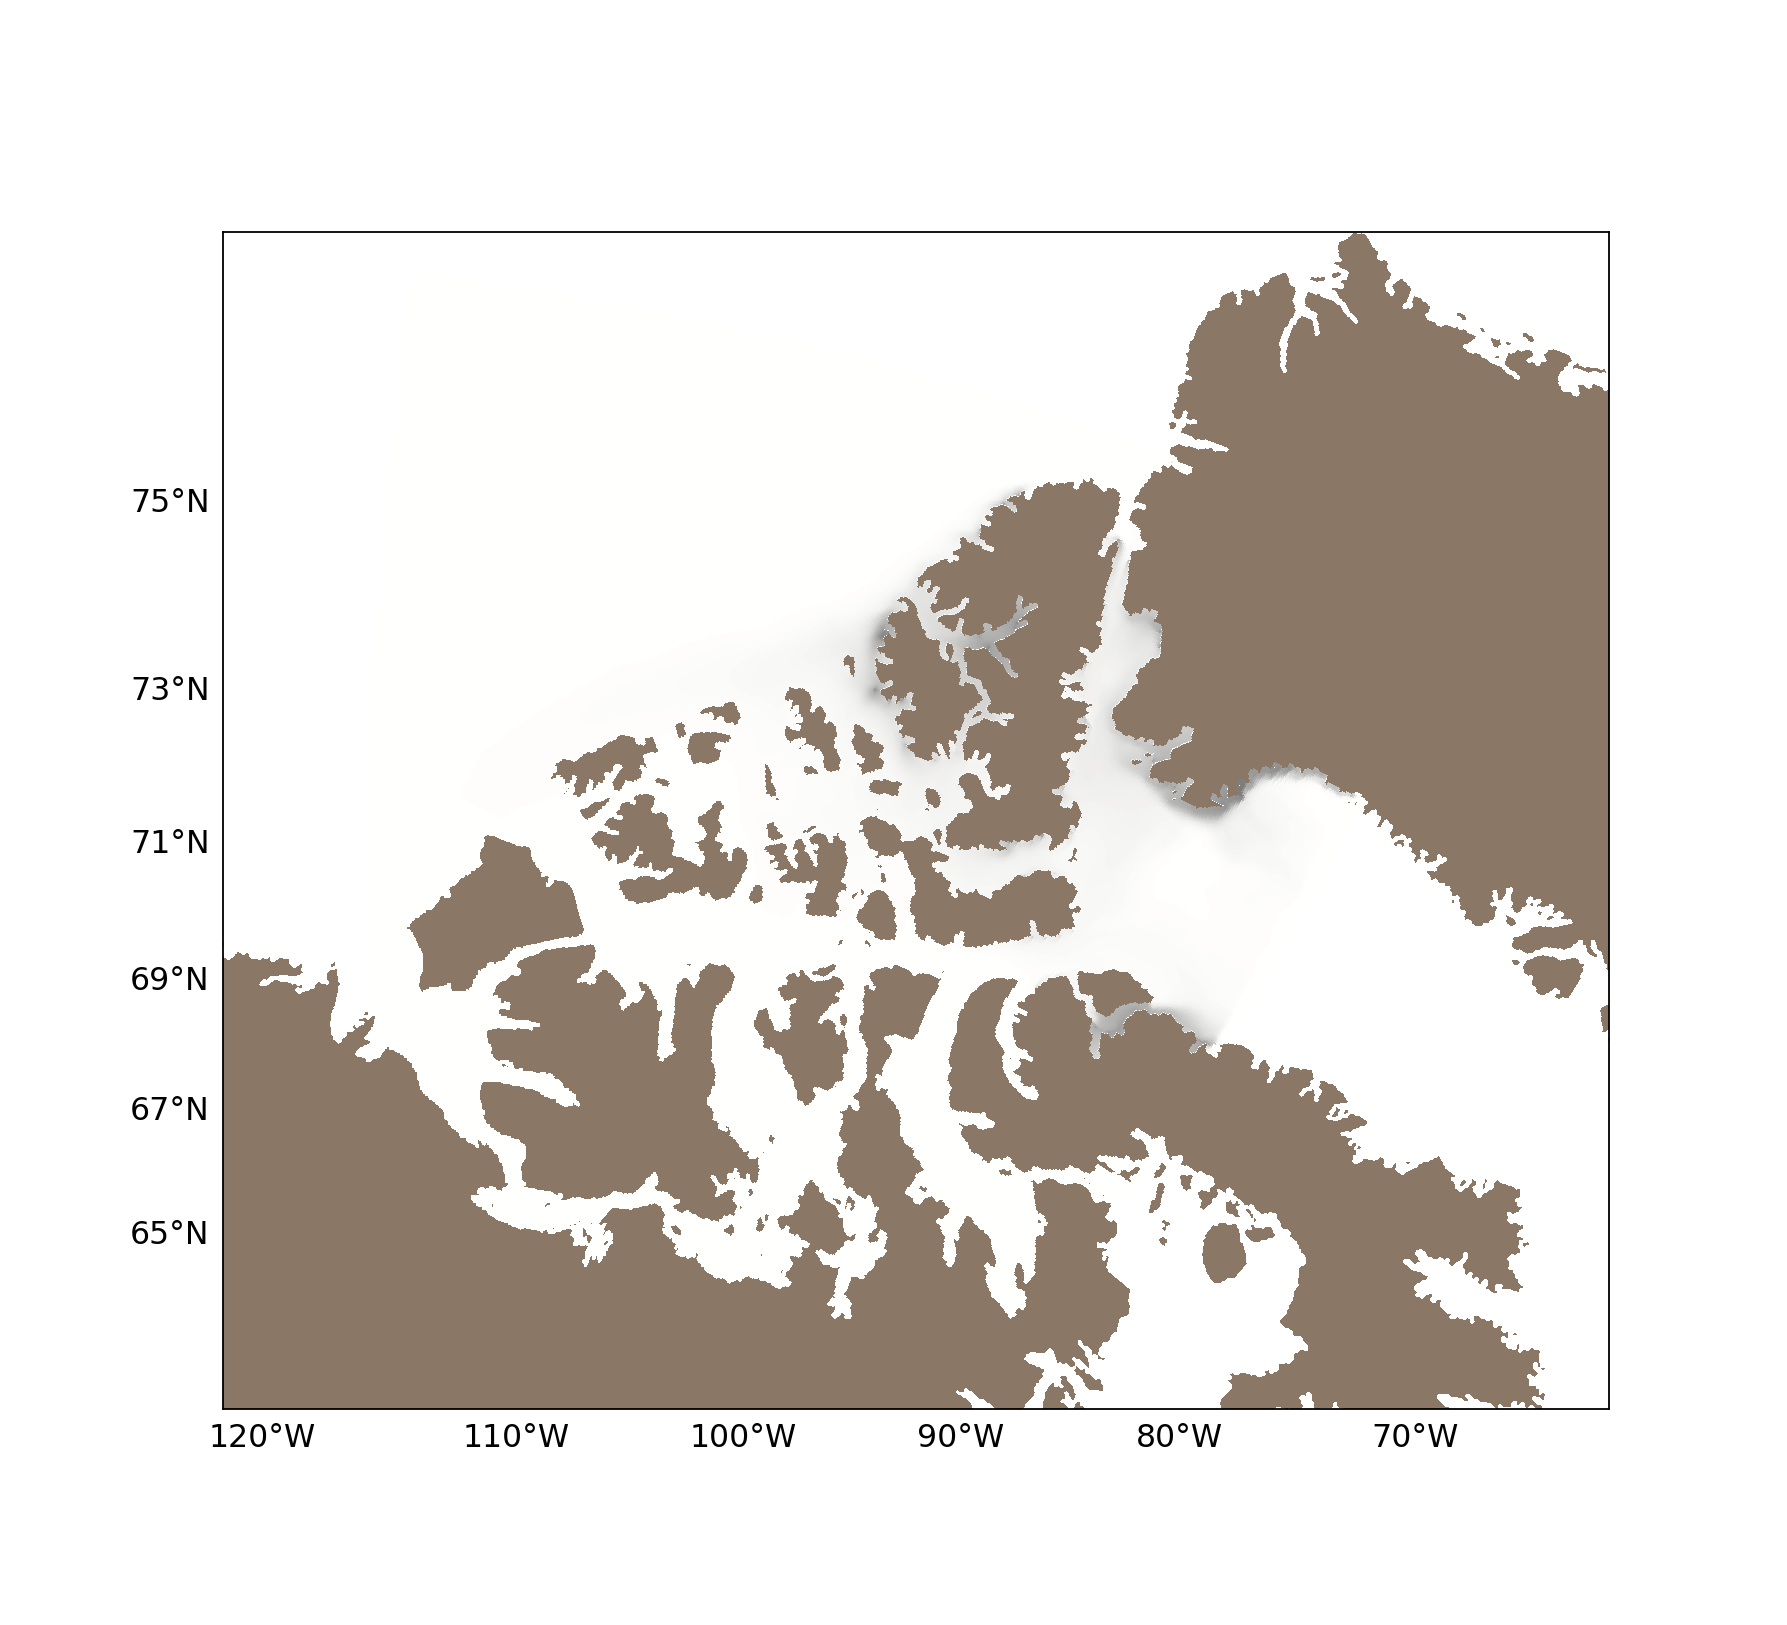

In [43]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y    = proj(lons, lats)
colour  = cmocean.cm.gray_r

proj.pcolor(x, y, glacier_prop_summer[0,:,:], vmin=0, vmax=4*14, cmap=colour)

<IPython.core.display.Javascript object>


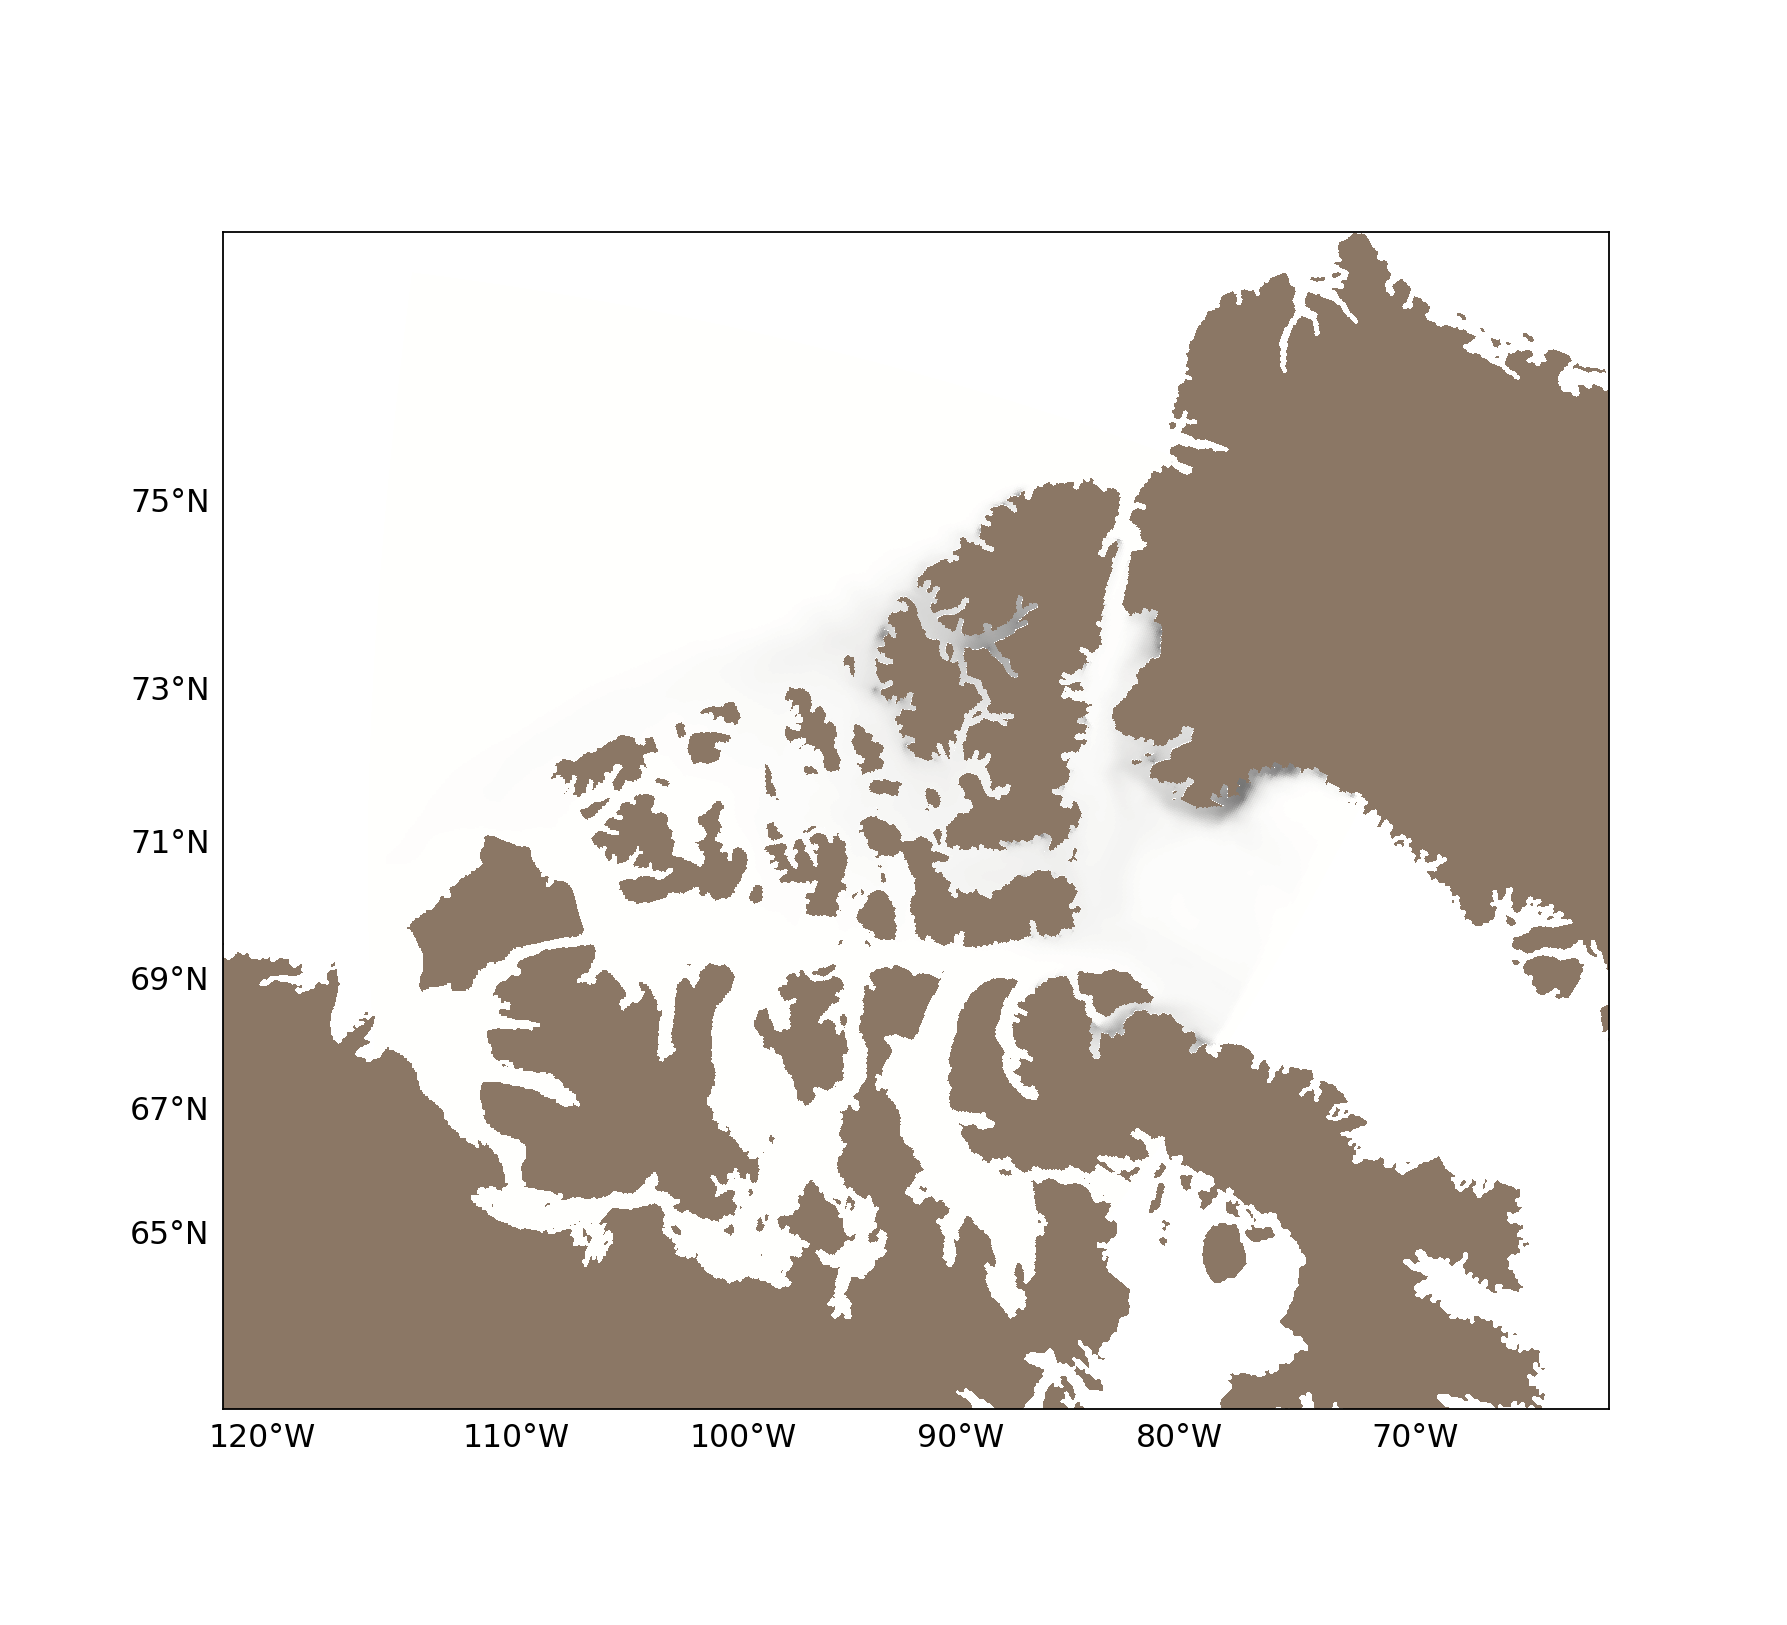

In [46]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y    = proj(lons, lats)
colour  = cmocean.cm.gray_r

proj.pcolor(x, y, glacier_prop_spring[0,:,:], vmin=0, vmax=3*14, cmap=colour)

<IPython.core.display.Javascript object>


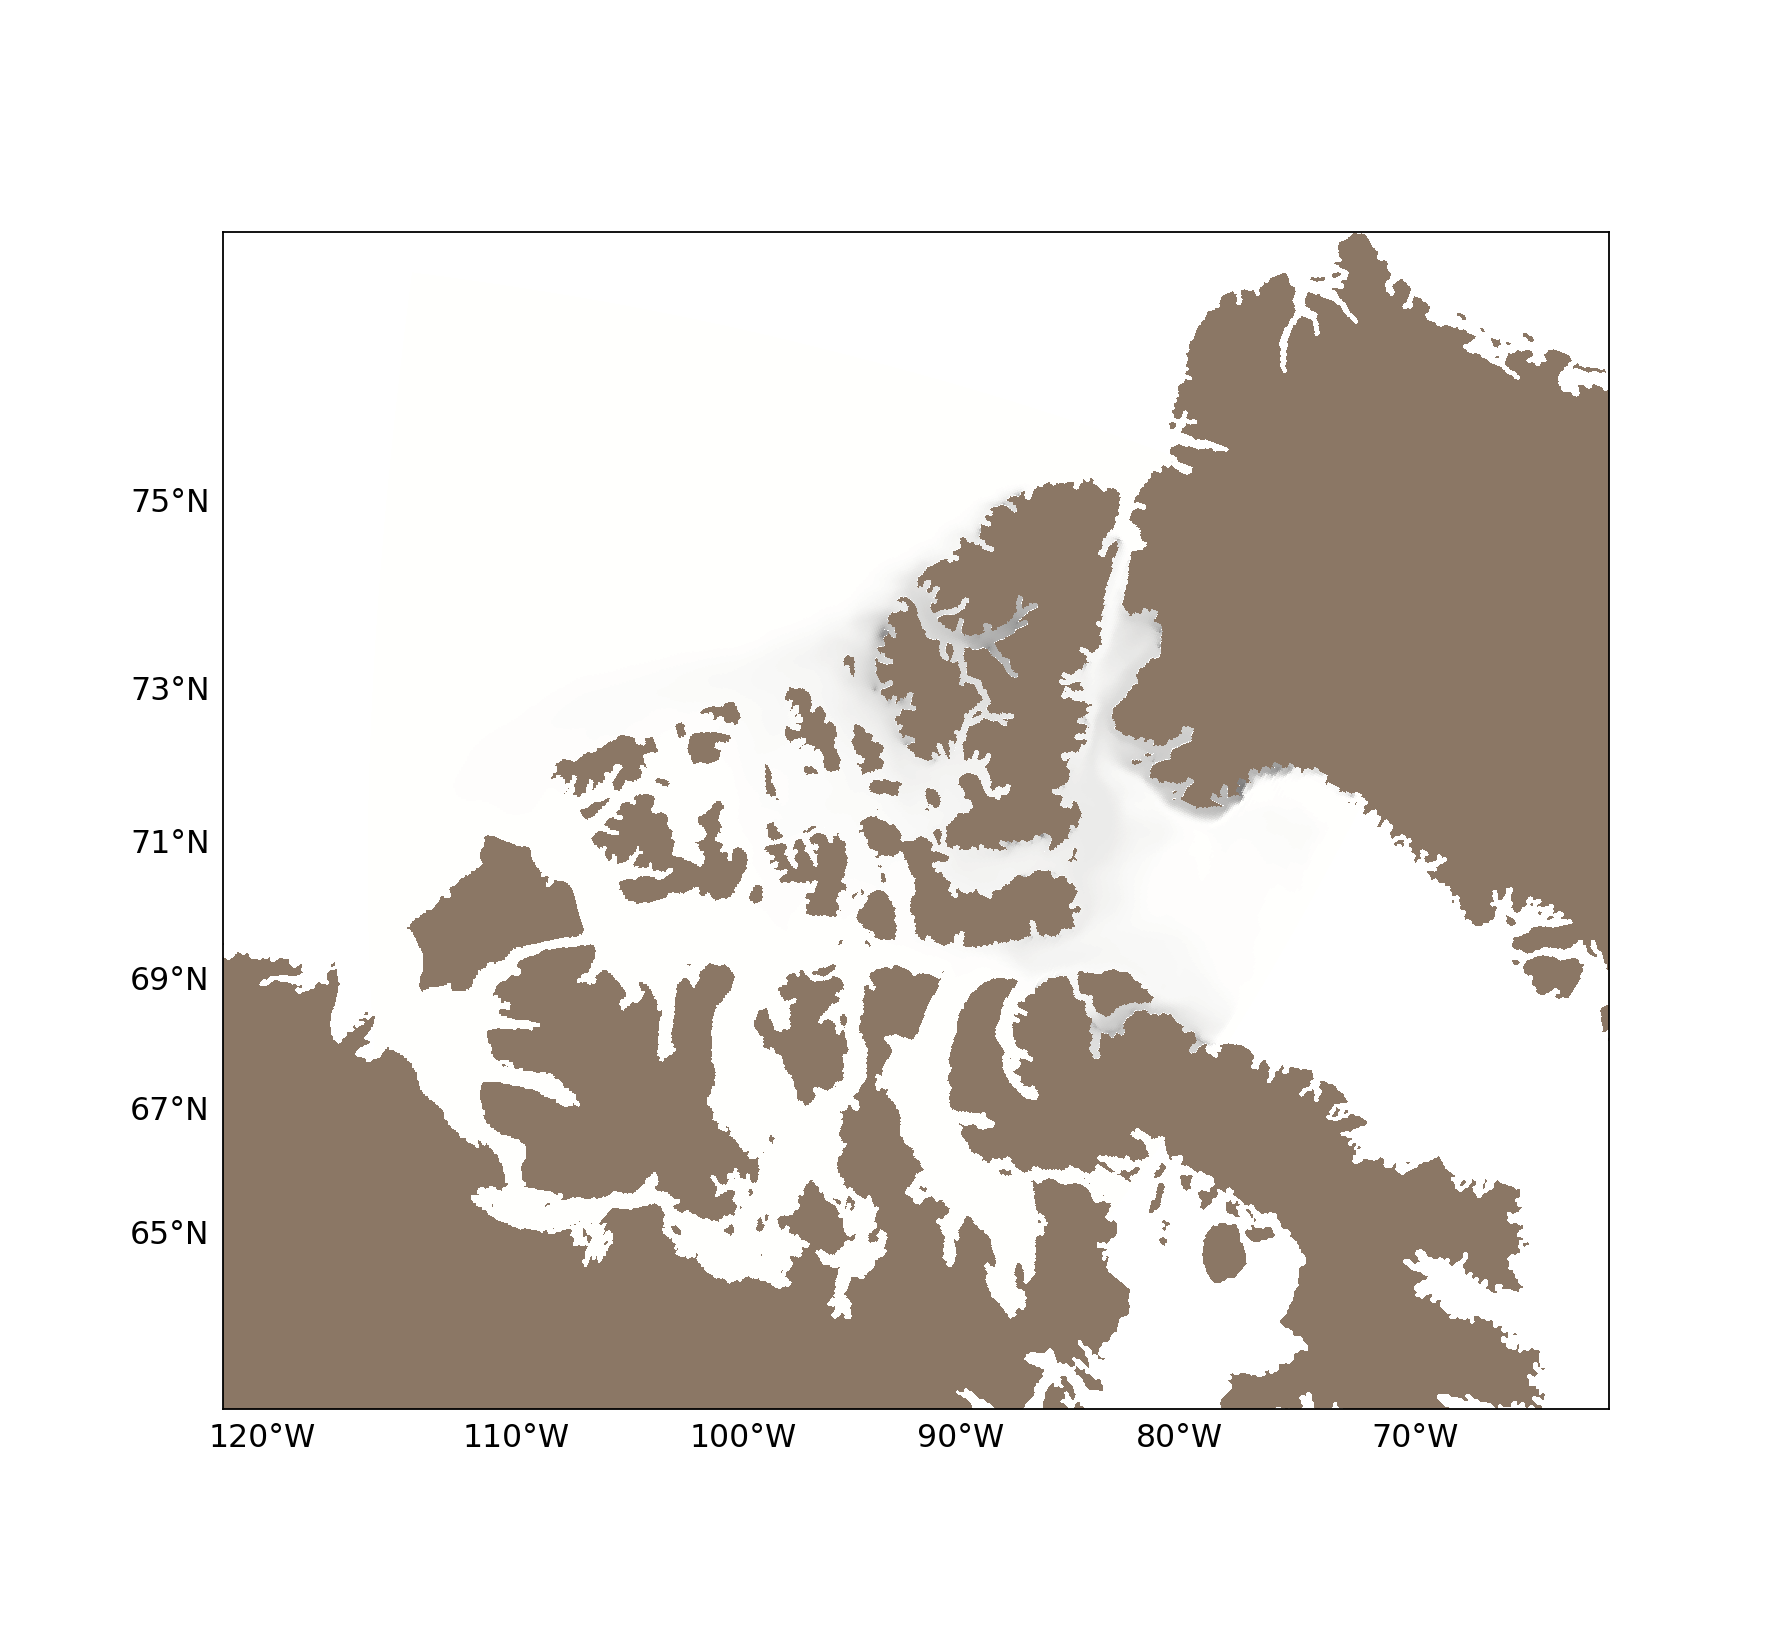

In [47]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y    = proj(lons, lats)
colour  = cmocean.cm.gray_r

proj.pcolor(x, y, glacier_prop_fall[0,:,:], vmin=0, vmax=2*14, cmap=colour)